# CREDIT EDA CASE STUDY

# Problem Statement

This study aims to find signs that show if someone might struggle to make loan payments. These signs could help decide whether to reject a loan application, offer a smaller loan amount, or give loans to risky applicants at higher interest rates. The goal is to make sure deserving borrowers aren't turned down while identifying those who might have trouble repaying their loans using Exploratory Data Analysis.

# Importing Libraries

In [1]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Extra
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)

# Data reading

In [2]:
#read the data set.
app_data= pd.read_csv("application_data.csv")

In [3]:
#Head of the data frame.
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

# Checking the structure of the data

In [4]:
#Checking number of rows and columns of dataframe by using .shape
app_data.shape

(307511, 122)

In [5]:
#calculating statistical data like percentile, mean and std of the numerical values of the DataFrame
app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [6]:
#Checking information of the dataframe to review the data type
app_data.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

# Important

After checking the columns description, application dataframe and data types, I found that all the columns data types looks fine so, we will move to the next steps.

# Missing Value Check

In [7]:
# Percentage of missing values in each column
app_data.isnull().sum()/len(app_data)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

# All the columns which has more than 40% of missing values so straight away dropping it.


In [8]:
null_percentages = (app_data.isnull().sum() / len(app_data)) * 100

In [9]:
#Getting all the columns which has more than 40% null values
columns_to_drop = null_percentages[null_percentages >= 40].index


In [10]:
#drooping the columns.
app_data = app_data.drop(columns=columns_to_drop)

In [11]:
#Checking the columns and rows again
app_data.shape

(307511, 73)

In [12]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [13]:
## Deleting all the Flag columns as these columns shows details about the documents they have submited and their phone and email 
## As per my understanding these columns will not affect our analysis and do not add any value
## Using for loop to delete the columns and then checking the shape of it.

non_required_col=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']

app_data.drop(columns=non_required_col, inplace=True)
app_data.shape

(307511, 47)

In [14]:
#Checking if we can remove more columns which are not required for the analysis
#EXT_SOURCE_2 AND EXT_SOURCE_3 (column detail===> Normalized score from external data source)
#Lets check if we have any corelation with the target column.

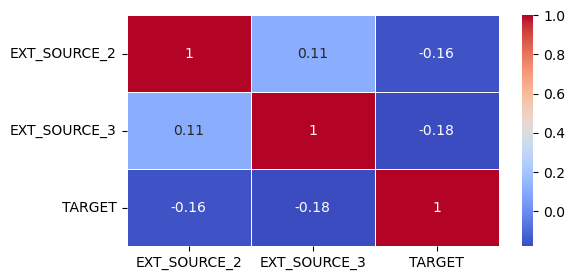

In [15]:
plt.figure(figsize=(6,3))
sns.heatmap(data= round(app_data[['EXT_SOURCE_2', 'EXT_SOURCE_3','TARGET']].corr(),2),cmap= 'coolwarm',annot= True,linewidths=0.5)
plt.show()

As we do not have a good corelation with target so, we will also drop these columns

In [16]:
app_data= app_data.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1)

In [17]:
#checking the shape of the data again.
app_data.shape

(307511, 45)

# Treating the Missing Values

In [18]:
#Checking the null values in the data frame again.
(app_data.isnull().sum() / len(app_data) * 100).sort_values()

SK_ID_CURR                      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REGION_RATING_CLIENT            0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
DAYS_ID_PUBLISH                 0.000000
DAYS_REGISTRATION               0.000000
DAYS_EMPLOYED                   0.000000
DAYS_BIRTH                      0.000000
REGION_POPULATION_RELATIVE      0.000000
NAME_HOUSING_TYPE               0.000000
NAME_FAMILY_STATUS              0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_INCOME_TYPE                0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
AMT_CREDIT                      0.000000
AMT_INCOME_TOTAL                0.000000
CNT_CHILDREN                    0.000000
FLAG_OWN_REALTY                 0.000000
FLAG_OWN_CAR                    0.000000
CODE_GENDER     

# Lets check the columns which has null values one by one and treat them if needed.

First we are working on Categorical columns

In [19]:
#Checking "DAYS_LAST_PHONE_CHANGE" column

#It rferes to how many days before applicantion client changed his phone.

#This column has 0.000325% of null values. So either we can remove it or impute it.

#In this case we are going to remove it as it will also not impact in our analysis


In [20]:
app_data= app_data[app_data['DAYS_LAST_PHONE_CHANGE'].notna()]

In [21]:
#Checking the null values again for this column to verify.
app_data['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

In [22]:
#Checking "CNT_FAM_MEMBERS" column.

#This shows how many family members client has.


#first we will check what are the values we have inside this column

In [23]:
app_data.groupby('CNT_FAM_MEMBERS').size()

CNT_FAM_MEMBERS
1.0      67847
2.0     158356
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
11.0         1
12.0         2
13.0         1
14.0         2
15.0         1
16.0         2
20.0         2
dtype: int64

In [24]:
#Lets check the mode of this.
app_data['CNT_FAM_MEMBERS'].mode()[0]

2.0

In [25]:
#Impute the mode for all the null values in 'CNT_FAM_MEMBERS' columns
app_data['CNT_FAM_MEMBERS']= app_data['CNT_FAM_MEMBERS'].fillna(app_data['CNT_FAM_MEMBERS'].mode()[0])

In [26]:
#Checking the null values again for this column to verify.
app_data['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

In [27]:
#Checking "OCCUPATION_TYPE" column

#lets check the values in "OCCUPATION_TYPE".

app_data.groupby(['OCCUPATION_TYPE']).size().sort_values(ascending= False)

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
dtype: int64

In [28]:
#Checking the null velues in data frame
app_data[app_data['OCCUPATION_TYPE'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
8           100011       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
23          100027       0         Cash loans           F            N   
28          100033       0         Cash loans           M            Y   
30          100035       0         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
307486      456230       0         Cash loans           F            Y   
307487      456231       0         Cash loans           M            N   
307500      456244       0         Cash loans           F            N   
307505      456249       0         Cash loans           F            N   
307507      456252       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
8                    Y             0        112500.000   1019610.0   
11                   Y             0         38419.155    148365.0   
23                   Y             0         83250.000    239850.0   
28                   Y             0        270000.000    790830.0   
30                   Y             0        292500.000    665892.0   
...                ...           ...               ...         ...   
307486               Y             1        292500.000    355536.0   
307487               Y             0        117000.000   1071909.0   
307500               Y             0        261000.000   1303812.0   
307505               Y             0        112500.000    225000.0   
307507               Y             0         72000.000    269550.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
8           33826.5         913500.0        Children             Pensioner   
11          10678.5         135000.0        Children             Pensioner   
23          23850.0         225000.0   Unaccompanied             Pensioner   
28          57676.5         675000.0   Unaccompanied         State servant   
30          24592.5         477000.0   Unaccompanied  Commercial associate   
...             ...              ...             ...                   ...   
307486      18283.5         270000.0   Unaccompanied  Commercial associate   
307487      31473.0         936000.0   Unaccompanied             Pensioner   
307500      35982.0        1138500.0   Unaccompanied               Working   
307505      22050.0         225000.0   Unaccompanied             Pensioner   
307507      12001.5         225000.0   Unaccompanied             Pensioner   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
8       Secondary / secondary special               Married   
11      Secondary / secondary special               Married   
23      Secondary / secondary special               Married   
28                   Higher education  Single / not married   
30      Secondary / secondary special        Civil marriage   
...                               ...                   ...   
307486               Higher education        Civil marriage   
307487  Secondary / secondary special               Married   
307500               Higher education               Married   
307505  Secondary / secondary special  Single / not married   
307507  Secondary / secondary special                 Widow   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
8       House / apartment                    0.018634      -20099   
11      House / apartment                    0.015221      -20417   
23      House / apartment                    0.006296      -24827   
28      House / apartment                    0.046220       -9994   
30      House / apartment                    0.025164      -15280   
...                   ...                         ...         ...   
307486  House / apartment                    0.072508      -16010   
307487  House / apartment       

In [29]:
#Checking more data with 'OCCUPATION_TYPE' and 'NAME_INCOME_TYPE' as both the columns has a relationship with each other

app_data[(app_data["OCCUPATION_TYPE"].isna()) & (app_data['NAME_INCOME_TYPE']=='Pensioner')].head(20)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
8        100011       0         Cash loans           F            N   
11       100015       0         Cash loans           F            N   
23       100027       0         Cash loans           F            N   
38       100045       0         Cash loans           F            N   
43       100050       0         Cash loans           F            N   
46       100053       0         Cash loans           F            N   
54       100062       0         Cash loans           M            Y   
56       100064       0         Cash loans           F            N   
62       100073       0         Cash loans           M            Y   
79       100094       0         Cash loans           F            N   
81       100096       1         Cash loans           F            N   
84       100099       0         Cash loans           F            N   
99       100118       0         Cash loans           F            N   
105      100124       0         Cash loans           M            N   
106      100125       0         Cash loans           F            N   
108      100127       0         Cash loans           M            N   
117      100137       0         Cash loans           F            Y   
118      100138       0         Cash loans           M            Y   
125      100146       0         Cash loans           M            Y   
140      100162       0         Cash loans           F            N   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
8                 Y             0        112500.000   1019610.0      33826.5   
11                Y             0         38419.155    148365.0      10678.5   
23                Y             0         83250.000    239850.0      23850.0   
38                Y             0         99000.000    247275.0      17338.5   
43                Y             0        108000.000    746280.0      42970.5   
46                Y             0        202500.000    305221.5      17649.0   
54                N             0         81000.000    675000.0      32472.0   
56                N             0         67500.000    298728.0      15381.0   
62                Y             0        324000.000   1130760.0      40189.5   
79                Y             0        108000.000    113760.0       5301.0   
81                Y             0         81000.000    252000.0      14593.5   
84                Y             0        360000.000    733315.5      41076.0   
99                Y             0         90000.000    675000.0      26541.0   
105               Y             0        225000.000    448272.0      28647.0   
106               N             0        126000.000    263686.5      26208.0   
108               Y             0        112500.000     52128.0       5341.5   
117               Y             0        225000.000    891072.0      45625.5   
118               N             0        135000.000    824823.0      29223.0   
125               Y             0        117000.000    327024.0      12456.0   
140               Y             0        112500.000    547344.0      18216.0   

     AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
8           913500.0        Children        Pensioner   
11          135000.0        Children        Pensioner   
23          225000.0   Unaccompanied        Pensioner   
38          225000.0   Unaccompanied        Pensioner   
43          675000.0   Unaccompanied        Pensioner   
46          252000.0          Family        Pensioner   
54          675000.0   Unaccompanied        Pensioner   
56          202500.0          Family        Pensioner   
62          810000.0   Unaccompanied        Pensioner   
79           90000.0   Unaccompanied        Pensioner   
81          252000.0   Unaccompanied        Pensioner   
84          679500.0   Unaccompanied        Pensioner   
99          675000.0   Unaccompanied        Pensioner   
105         396000.0   Unaccompani

In [30]:
#Looking at the above data its look like that 'Pensioner' have 'OCCUPATION_TYPE' is null because mostly persons who gets pension does not work

#As per the values above most of the occupation of the applicants are 'Laborers'. 

# Leaving the null values in 'OCCUPATION_TYPE' as it is however we can fill it with mode.

In [31]:
#Checking "NAME_TYPE_SUITE" column.


#Checking each value in this column.


app_data.groupby('NAME_TYPE_SUITE').size()


NAME_TYPE_SUITE
Children             3267
Family              40149
Group of people       271
Other_A               866
Other_B              1770
Spouse, partner     11370
Unaccompanied      248525
dtype: int64

In [32]:
#Checking the mode of 'NAME_TYPE_SUITE' column.
app_data['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

In [33]:
#Lets use the mode value and impute the null values
app_data['NAME_TYPE_SUITE']= app_data['NAME_TYPE_SUITE'].fillna(app_data['NAME_TYPE_SUITE'].mode()[0])

In [34]:
#Checking the null values again for this column to verify.
app_data['NAME_TYPE_SUITE'].isnull().sum()

0

In [35]:
#Checking "AMT_ANNUITY" column.


#As we checked initially the data type of this columns is 'float64' so lets check the statistical data for this column.


app_data["AMT_ANNUITY"].describe()

count    307498.000000
mean      27108.577804
std       14493.760721
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [36]:
#As we can see the max value is very high so we can impute this with median as this will not affect with Outliers.
app_data['AMT_ANNUITY']= app_data['AMT_ANNUITY'].fillna(app_data["AMT_ANNUITY"].median())

In [37]:
#Checking the null values again for this column to verify.
app_data['AMT_ANNUITY'].isnull().sum()

0

In [38]:
# Lets check the columns 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'


#As the data type for all the above cols are 'float64' and this comes under numberical variable so lets impute median in NAN values

app_data['OBS_30_CNT_SOCIAL_CIRCLE']= app_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(app_data["OBS_30_CNT_SOCIAL_CIRCLE"].median())
app_data['DEF_30_CNT_SOCIAL_CIRCLE']= app_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(app_data["DEF_30_CNT_SOCIAL_CIRCLE"].median())
app_data['OBS_60_CNT_SOCIAL_CIRCLE']= app_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(app_data["OBS_60_CNT_SOCIAL_CIRCLE"].median())
app_data['DEF_60_CNT_SOCIAL_CIRCLE']= app_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(app_data["DEF_60_CNT_SOCIAL_CIRCLE"].median())

In [39]:
#Checking one column to verify if the above code worked.
app_data['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [40]:
#lets check the remaining columns which starts with 'AMT_REQ'

#AMT_REQ_CREDIT_BUREAU_QRT
#AMT_REQ_CREDIT_BUREAU_HOUR
#AMT_REQ_CREDIT_BUREAU_DAY
#AMT_REQ_CREDIT_BUREAU_WEEK
#AMT_REQ_CREDIT_BUREAU_MON
#AMT_REQ_CREDIT_BUREAU_YEAR

#These columns refers to this financial company(Bank) which may have hit Bureau to check applicant's credit score.
# These can be an important column for the analsis.
# The datatype of these columns are float64 therefore the best is to impute these are with median value.



In [41]:
#First putting all these columns in a list and name it with some variable
#( we can also do it with for loop but as these are less so doing manually)

AMT_REQ_COL= ['AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR']

In [42]:
#Lets use for loop to fill the null values.

for i in AMT_REQ_COL:
    med=app_data[i].median()
    app_data[i]=app_data[i].fillna(med)
    

In [43]:
#Checking the null values to verify
app_data.isnull().sum().sort_values()

SK_ID_CURR                         0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
OBS_30_CNT_SOCIAL_CIRCLE           0
DEF_30_CNT_SOCIAL_CIRCLE           0
OBS_60_CNT_SOCIAL_CIRCLE           0
DEF_60_CNT_SOCIAL_CIRCLE           0
DAYS_LAST_PHONE_CHANGE             0
AMT_REQ_CREDIT_BUREAU_HOUR         0
AMT_REQ_CREDIT_BUREAU_DAY          0
AMT_REQ_CREDIT_BUREAU_WEEK         0
AMT_REQ_CREDIT_BUREAU_MON          0
REGION_RATING_CLIENT               0
AMT_REQ_CREDIT_BUREAU_QRT          0
CNT_FAM_MEMBERS                    0
DAYS_ID_PUBLISH                    0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
F

In [44]:
#Checking "AAMT_GOODS_PRICE" column.


#lets check the statistical data for this column.

app_data['AMT_GOODS_PRICE'].describe()


count    3.072320e+05
mean     5.383971e+05
std      3.694467e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [45]:
# Lets try to check the relation between 'AMT_GOODS_PRICE' and 'NAME_CONTRACT_TYPE' as it would not be good to fill the null values with median

In [46]:
app_data[(app_data["AMT_GOODS_PRICE"].isna()) & (app_data['NAME_CONTRACT_TYPE']=='Revolving loans')].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724       100837       0    Revolving loans           F            N   
5937      106955       0    Revolving loans           F            N   
6425      107494       0    Revolving loans           F            N   
6703      107822       0    Revolving loans           F            N   
7647      108913       0    Revolving loans           M            N   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
724                Y             2           45000.0    135000.0       6750.0   
5937               N             0          157500.0    450000.0      22500.0   
6425               N             0           67500.0    202500.0      10125.0   
6703               N             1          121500.0    180000.0       9000.0   
7647               Y             0          180000.0    450000.0      22500.0   

      AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
724               NaN   Unaccompanied  Commercial associate   
5937              NaN   Unaccompanied               Working   
6425              NaN   Unaccompanied               Working   
6703              NaN   Unaccompanied               Working   
7647              NaN   Unaccompanied               Working   

                NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
724   Secondary / secondary special               Married  House / apartment   
5937  Secondary / secondary special               Married  House / apartment   
6425               Higher education               Married  House / apartment   
6703  Secondary / secondary special        Civil marriage  House / apartment   
7647               Higher education  Single / not married  House / apartment   

      REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
724                     0.024610      -10072           -381   
5937                    0.010006      -11993          -2921   
6425                    0.008474       -9727          -2712   
6703                    0.011657      -11079           -899   
7647                    0.032561       -9986          -1847   

      DAYS_REGISTRATION  DAYS_ID_PUBLISH        OCCUPATION_TYPE  \
724              -519.0            -1834             Core staff   
5937            -1289.0            -1948  Private service staff   
6425            -4132.0             -800            Accountants   
6703            -3765.0             -572               Managers   
7647            -4762.0             -506         Security staff   

      CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
724               4.0                     2                            2   
5937              2.0                     2                            2   
6425              2.0                     2                            2   
6703              3.0                     1                            1   
7647              1.0                     1                            1   

     WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
724                   WEDNESDAY                       14   
5937                   SATURDAY                       13   
6425                  WEDNESDAY                       18   
6703                  WEDNESDAY                       11   
7647                   SATURDAY                       18   

      REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
724                            0                           0   
5937                           0                           0   
6425                           0                           0   
6703                           0                           0   
7647                           0                           0   

      LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
724                             0                       0   
5937                            0                       0   
6425                            0                       0 

Note- Every instance where the 'AMT_GOODS_PRICE' value is missing corresponds exclusively to contracts labeled as "Revolving Loans".

In [47]:
#'AMT_GOODS_PRICE' ==> For consumer loans it is the price of the goods for which the loan is given.

#'Revolving loan' ==> A form of credit issued by a financial institution that the borrower can draw from and pay back multiple times.


#Revolving loans typically do not involve the purchase of specific items. Therefore, it's common for the 'AMT_GOODS_PRICE' values to be NaN since no particular goods are being acquired.
#In this context, these NaN values can be equated to zero, signifying the absence of goods purchased.

#Will be imputing 0 for all the null values

In [48]:
app_data['AMT_GOODS_PRICE']= app_data['AMT_GOODS_PRICE'].fillna(0)

In [49]:
#Checking the null values for this column to verify
app_data['AMT_GOODS_PRICE'].isna().sum()

0

# Values Check

In [50]:
#As we can see in the data there are few columns starts with 'DAYS_' which has negative values.
#Lets check them and fix it as these values cannot be in negative (for ex- Birth in days cannot be in negative)

# First we have to make a list of these columns.

days_col= []

for i in app_data.columns:
    if i.startswith('DAYS_'):
        days_col.append(i)
        
days_col        



['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [51]:
#Fixing it with abs().

for i in days_col:
    app_data[i]= abs(app_data[i])

In [52]:
#Now we will convert the days to years as this will help us to analyse the data in a beter way.
#We will divide it by 365 to convert it in years.

for i in days_col:
    app_data[i]=app_data[i]/365

In [53]:
#As we changed the values in years so we also have to change the columns names so that we do not have any confusion.
app_data.rename(columns={'DAYS_BIRTH':'YEARS_BIRTH','DAYS_EMPLOYED':'YEARS_EMPLOYED','DAYS_REGISTRATION':'YEARS_REGISTRATION','DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE':'YEARS_LAST_PHONE_CHANGE'},inplace= True)

In [54]:
#checking the dataframe to verify if values has been changed.

app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  YEARS_BIRTH  YEARS_EMPLOYED  \
0                    0.018801    25.920548        1.745205   
1                    0.003541    45.931507        3.254795   
2                    0.010032    52.180822        0.616438   
3                    0.008019    52.068493        8.326027   
4                    0.028663    54.608219        8.323288   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            9.994521          5.808219        Laborers              1.0   
1            3.249315          0.797260      Core staff              2.0   
2           11.671233          6.934247        Laborers              1.0   
3           26.939726          6.676712        Laborers              2.0   
4           11.810959          9.473973      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                    

Now we will check the columns which we didn't check while working on null values

In [55]:
#checking the 'NAME_EDUCATION_TYPE' column.

app_data.NAME_EDUCATION_TYPE.value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10276
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

In [56]:
#checking the 'NAME_FAMILY_STATUS' column.

app_data.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married                 196431
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [57]:
#checking the 'CODE_GENDER' column.

app_data.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105058
XNA         4
Name: count, dtype: int64

In [58]:
#We have find some 'XNA' values in 'CODE_GENDER' column.

# Replacing 'XNA' with 'F' in the 'CODE_GENDER' column as we have more females in this.(Basically 'F' will be the mode if we will calculate)
app_data['CODE_GENDER'].replace('XNA','F',inplace= True)

In [59]:
#Checking the values again to verify.
app_data.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105058
Name: count, dtype: int64

In [60]:
#Checking the 'ORGANIZATION_TYPE' column.
app_data.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3491
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [61]:
#We also have 'XNA' values in 'ORGANIZATION_TYPE' column which we are not going to delete as it has very high quantity.
#We cannot take the risk to delete these as we may loose important data.

In [62]:
#The 'SK_ID_CURR' variable is currently stored as an integer data type, representing customer ID numbers.

#However, as it serves as an identifier and should not be subjected to mathematical operations, it's preferable to convert it to an object data type for non-numeric manipulation.


app_data['SK_ID_CURR']= app_data['SK_ID_CURR'].astype('object')

# Checking for Outliers

In [63]:
app_data.describe()

TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  307510.000000  307510.000000      3.075100e+05  3.075100e+05   
mean        0.080729       0.417053      1.687981e+05  5.990270e+05   
std         0.272419       0.722122      2.371235e+05  4.024910e+05   
min         0.000000       0.000000      2.565000e+04  4.500000e+04   
25%         0.000000       0.000000      1.125000e+05  2.700000e+05   
50%         0.000000       0.000000      1.471500e+05  5.135310e+05   
75%         0.000000       1.000000      2.025000e+05  8.086500e+05   
max         1.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  307510.000000     3.075100e+05               307510.000000   
mean    27108.491735     5.379104e+05                    0.020868   
std     14493.484471     3.696340e+05                    0.013831   
min      1615.500000     0.000000e+00                    0.000290   
25%     16524.000000     2.385000e+05                    0.010006   
50%     24903.000000     4.500000e+05                    0.018850   
75%     34596.000000     6.795000e+05                    0.028663   
max    258025.500000     4.050000e+06                    0.072508   

         YEARS_BIRTH  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
count  307510.000000   307510.000000       307510.000000     307510.000000   
mean       43.937039      185.547840           13.660605          8.203311   
std        11.956096      382.038152            9.651759          4.135476   
min        20.517808        0.000000            0.000000          0.000000   
25%        34.008219        2.556164            5.506849          4.712329   
50%        43.150685        6.079452           12.339726          8.915068   
75%        53.923288       15.635616           20.492466         11.778082   
max        69.120548     1000.665753           67.594521         19.717808   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307510.000000         307510.000000                307510.000000   
mean          2.152665              2.052463                     2.031521   
std           0.910680              0.509035                     0.502738   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307510.000000               307510.000000   
mean                 12.063416                    0.015144   
std                   3.265837                    0.122127   
min                   0.000000                    0.000000   
25%                  10.000000                    0.000000   
50%                  12.000000                    0.000000   
75%                  14.000000                    0.000000   
max                  23.000000                    1.000000   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count               307510.000000                307510.000000   
mean                     0.050769                     0.040659   
std                      0.219526                     0.197499   
min                      0.000000                     0.000000   
25%                      0.000000                     0.000000   
50%                      0.000000                     0.000000   
75%                      0.000000                     0.000000   
max                      1.000000                     1.000000   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
count           307510.000000           307510.000000   
mean                 0.078173                0.230454   
std                  0.268444 

In [64]:
#We will do the outliers check for all the numberical columns which looks important for analysis.
num_column= ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_BIRTH','YEARS_EMPLOYED','CNT_FAM_MEMBERS','CNT_CHILDREN']

In [65]:
#Checking for 'AMT_INCOME_TOTAL'

#It referes to what is the income of the clients who is applying for the loan.
app_data['AMT_INCOME_TOTAL'].describe()

count    3.075100e+05
mean     1.687981e+05
std      2.371235e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

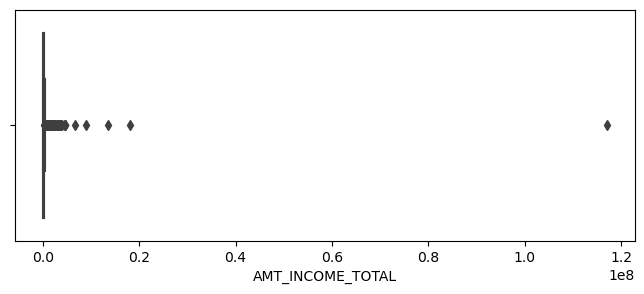

In [66]:
plt.figure(figsize= [8,3])
sns.boxplot(x= app_data['AMT_INCOME_TOTAL'])
plt.show()

In [67]:
#As we can see above with the help of describe and box plot there is one value which is very high from the rest of it.

In [68]:
#Checking for 'AMT_CREDIT'.

app_data['AMT_CREDIT'].describe()

count    3.075100e+05
mean     5.990270e+05
std      4.024910e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

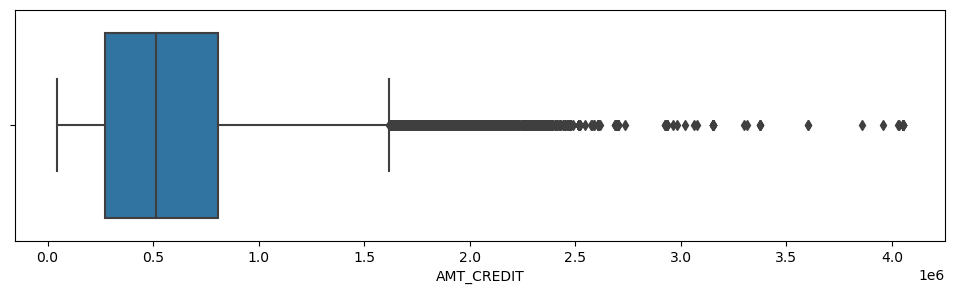

In [69]:
plt.figure(figsize= [12,3])
sns.boxplot(x= app_data['AMT_CREDIT'])
plt.show()

In [70]:
#As we can see with the help of above boxplot there are outliers in it. Lets check these values in the data frame.
app_data[app_data['AMT_CREDIT']>3.51e6]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
14643      117085       0         Cash loans           F            Y   
14852      117337       0         Cash loans           M            N   
17948      120926       0         Cash loans           M            Y   
53936      162494       0         Cash loans           M            Y   
95571      210956       0         Cash loans           M            N   
104577     221360       0         Cash loans           M            Y   
110459     228135       0         Cash loans           M            N   
119380     238431       0         Cash loans           F            Y   
119681     238782       0         Cash loans           M            Y   
120757     240007       0         Cash loans           M            N   
133766     255139       0         Cash loans           F            Y   
186230     315893       1         Cash loans           F            N   
287732     433294       0         Cash loans           F            Y   
288455     434170       0         Cash loans           F            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
14643                N             2          749331.0   3956274.0   
14852                Y             1          760846.5   4050000.0   
17948                N             2          783000.0   4050000.0   
53936                N             0          900450.0   3600000.0   
95571                Y             0          430650.0   4031032.5   
104577               N             0          468000.0   3600000.0   
110459               N             2          864900.0   4050000.0   
119380               N             0          292050.0   3860019.0   
119681               Y             1          931365.0   4050000.0   
120757               N             0          587250.0   4050000.0   
133766               N             1         1307587.5   4050000.0   
186230               N             0          458550.0   4027680.0   
287732               N             1          405000.0   4050000.0   
288455               N             1          450000.0   4050000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
14643      197230.5        3825000.0   Unaccompanied  Commercial associate   
14852      146002.5        4050000.0   Unaccompanied  Commercial associate   
17948      258025.5        4050000.0   Unaccompanied  Commercial associate   
53936       91008.0        3600000.0   Unaccompanied  Commercial associate   
95571      102033.0        3712500.0   Unaccompanied               Working   
104577      91138.5        3600000.0   Unaccompanied         State servant   
110459     102384.0        4050000.0   Unaccompanied  Commercial associate   
119380      97578.0        3555000.0   Unaccompanied  Commercial associate   
119681     102514.5        4050000.0   Unaccompanied  Commercial associate   
120757     106969.5        4050000.0   Unaccompanied  Commercial associate   
133766     100197.0        4050000.0   Unaccompanied  Commercial associate   
186230     106380.0        3600000.0   Unaccompanied  Commercial associate   
287732     102514.5        4050000.0   Unaccompanied  Commercial associate   
288455     106839.0        4050000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
14643                Higher education               Married   
14852                Higher education               Married   
17948                Higher education               Married   
53936                Higher education  Single / not married   
95571                Higher education  Single / not married   
104577               Higher education               Married   
110459               Higher education               Married   
119380               Higher education               Married   
119681               Higher education               Married   
120757               Higher education               Married

In [71]:
#The majority of customers have loan credit amounts concentrated in the third quartile, indicating a higher distribution towards larger credit amounts.
#Additionally, there is a notable presence of outliers in the AMT_CREDIT variable, suggesting instances of unusually high or low credit amounts compared to the majority of the data.

#Also if we see the above data set 'AMT_INCOME_TOTAL' is less than 'AMT_CREDIT'

In [72]:
#Checking 'AMT_ANNUITY'
# It is a constant fixed amount is repaid to the lender. It is also depend on the loan amount one received.
app_data['AMT_ANNUITY'].describe()

#With this we can see that max values is very high. Lets plot a boxplot to confirm.

count    307510.000000
mean      27108.491735
std       14493.484471
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

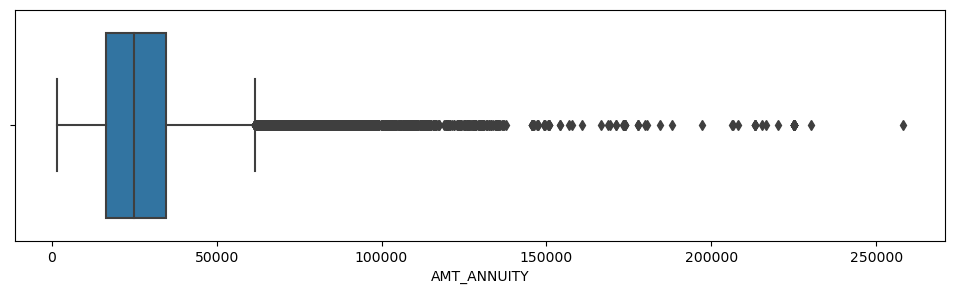

In [73]:
plt.figure(figsize= [12,3])
sns.boxplot(x= app_data['AMT_ANNUITY'])
plt.show()

In [74]:
#As seen in the box plot there are many values which are away from the normal range. Hence, we have outliers in it.

In [75]:
#Checking for 'AMT_GOODS_PRICE'

# NOTE=====>'AMT_GOODS_PRICE' is the price of the goods for which the loan is given.


#Lets check the statistical values for this column.
app_data['AMT_GOODS_PRICE'].describe()

count    3.075100e+05
mean     5.379104e+05
std      3.696340e+05
min      0.000000e+00
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

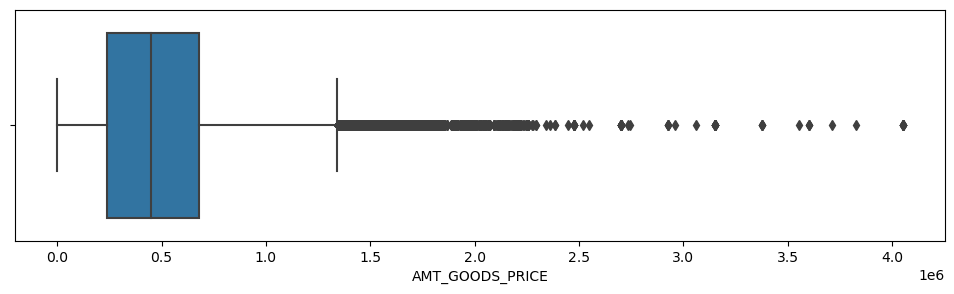

In [76]:
#Making the boxplot to check.
plt.figure(figsize= [12,3])
sns.boxplot(x= app_data['AMT_GOODS_PRICE'])
plt.show()


In [77]:
#Lets also check the data frame of the amount which is greator than 3.01e6
app_data[app_data['AMT_GOODS_PRICE']>3.01e6].head()


#We have checked the data without .head() and we found that mostly the 'AMT_GOODS_PRICE' is equal to or less than 'AMT_CREDIT'.

# IMPORTANT=======> So, we have found the outliers in this column as'AMT_GOODS_PRICE' is directly related to 'AMT_CREDIT'


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
14643     117085       0         Cash loans           F            Y   
14852     117337       0         Cash loans           M            N   
17948     120926       0         Cash loans           M            Y   
32099     137220       0         Cash loans           M            Y   
53936     162494       0         Cash loans           M            Y   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
14643               N             2          749331.0   3956274.0   
14852               Y             1          760846.5   4050000.0   
17948               N             2          783000.0   4050000.0   
32099               N             1          337500.0   3150000.0   
53936               N             0          900450.0   3600000.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
14643     197230.5        3825000.0   Unaccompanied  Commercial associate   
14852     146002.5        4050000.0   Unaccompanied  Commercial associate   
17948     258025.5        4050000.0   Unaccompanied  Commercial associate   
32099      79632.0        3150000.0   Unaccompanied  Commercial associate   
53936      91008.0        3600000.0   Unaccompanied  Commercial associate   

      NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
14643    Higher education               Married  House / apartment   
14852    Higher education               Married   Office apartment   
17948    Higher education               Married  House / apartment   
32099    Higher education               Married  House / apartment   
53936    Higher education  Single / not married  House / apartment   

       REGION_POPULATION_RELATIVE  YEARS_BIRTH  YEARS_EMPLOYED  \
14643                    0.030755    52.495890        2.709589   
14852                    0.072508    35.057534        3.758904   
17948                    0.009549    41.578082        0.550685   
32099                    0.019101    43.402740        0.942466   
53936                    0.032561    37.210959        3.424658   

       YEARS_REGISTRATION  YEARS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
14643            2.301370          7.342466        Managers              4.0   
14852            9.742466         12.728767        Managers              3.0   
17948            4.189041         12.936986        Managers              4.0   
32099           20.701370         11.775342        Managers              3.0   
53936           16.232877         12.221918        Managers              1.0   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
14643                     2                            2   
14852                     1                            1   
17948                     2                            2   
32099                     2                            2   
53936                     1                            1   

      WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
14643                     MONDAY                       15   
14852                  WEDNESDAY                       14   
17948                   THURSDAY                       14   
32099                     FRIDAY                       14   
53936                  WEDNESDAY                       18   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
14643                           0                           0   
14852                           0                           0   
17948                           1                           1   
32099                           0                           0   
53936                           0                           0   

       LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
14643                            0                       0   
14852                            0                       0   
17948                            0                       1   
32099                        

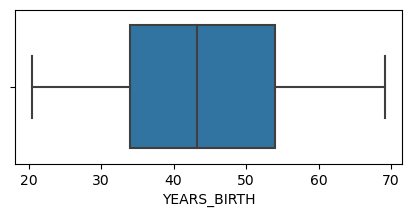

In [78]:
#Checking "YEARS_BIRTH"

#Lets make the boxplot for this column directly.
plt.figure(figsize= [5,2])
sns.boxplot(x= app_data['YEARS_BIRTH'])
plt.show()

In [79]:
#As per the above barplot we can say that there are no outliers in 'YEARS_BIRTH' column.

In [80]:
#Checking for 'YEARS_EMPLOYED'.

#Lets check the statistical values for this.

app_data['YEARS_EMPLOYED'].describe()

count    307510.000000
mean        185.547840
std         382.038152
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: YEARS_EMPLOYED, dtype: float64

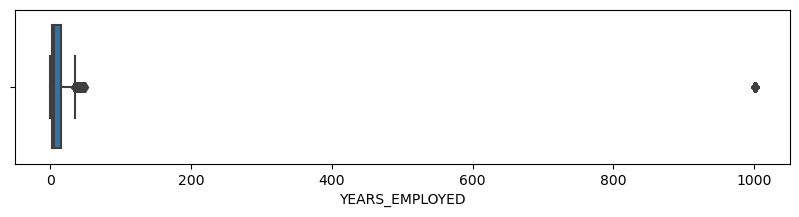

In [81]:
#We can clearly see as per the above data that 'YEARS_EMPLOYED' has outliers.

#Lets make a boxplot for this.
plt.figure(figsize= [10,2])
sns.boxplot(x= app_data['YEARS_EMPLOYED'])
plt.show()

In [82]:
#We can clearly see that 'YEARS_EMPLOYED' has outliers as it is not possible that someone is employed from 1000+ years

In [83]:
#Checking for 'CNT_FAM_MEMBERS'.

#Checking the statistical values for this.
app_data['CNT_FAM_MEMBERS'].describe()

count    307510.000000
mean          2.152665
std           0.910680
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

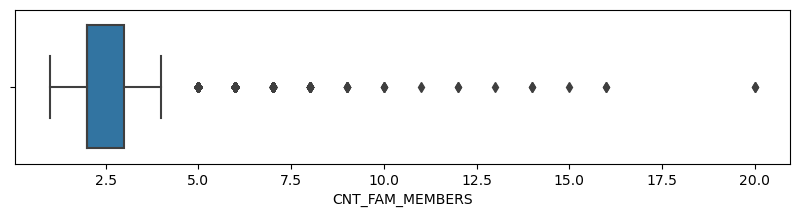

In [84]:
#Lets plot boxplot.
plt.figure(figsize= [10,2])
sns.boxplot(x= app_data['CNT_FAM_MEMBERS'])
plt.show()

In [85]:
#As we can clearly see that 75% applicants has 3 family members however the maximum is 20. Therefore, there are outliers present in this.
# It can be possible that these applicants has Joint family.

In [86]:
#Checking for 'CNT_CHILDREN'.

app_data['CNT_CHILDREN'].describe()

#With this we can see that the maximum value is 19 which is very high from the rest.

count    307510.000000
mean          0.417053
std           0.722122
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

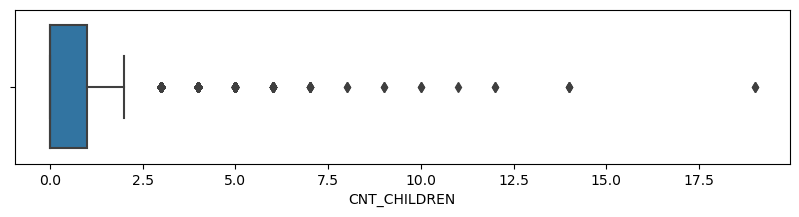

In [87]:
plt.figure(figsize= [10,2])
sns.boxplot(x= app_data['CNT_CHILDREN'])
plt.show()

<Axes: xlabel='CNT_CHILDREN', ylabel='Count'>

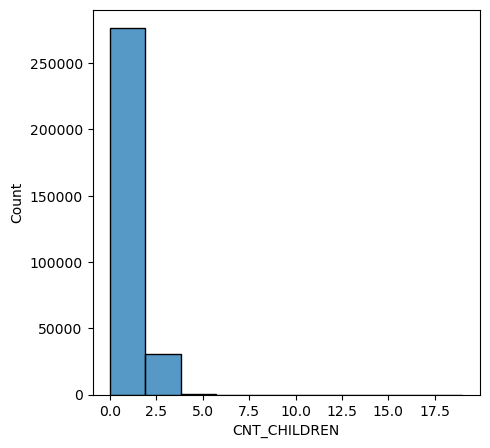

In [88]:
plt.figure(figsize=(5, 5))
sns.histplot(app_data['CNT_CHILDREN'], bins=10, kde=False)

In [89]:
#As we can see most of the applicants have children 0 to 4. Looking at the boxplot we can see that there are few outliers in this.''

# We can fill these outliers with the help of 'Flooring' & 'Capping' however not doing it as it is not necessary for this assignment. We will check later and binn some of the columns

# Checking for data Imbalance

In [90]:
#We will check the data imbalance with the help of 'TARGET' variable.

# 0===> No payment difficulty
# 1====> Payment difficulty

100*app_data['TARGET'].value_counts(normalize= True)

TARGET
0    91.927092
1     8.072908
Name: proportion, dtype: float64

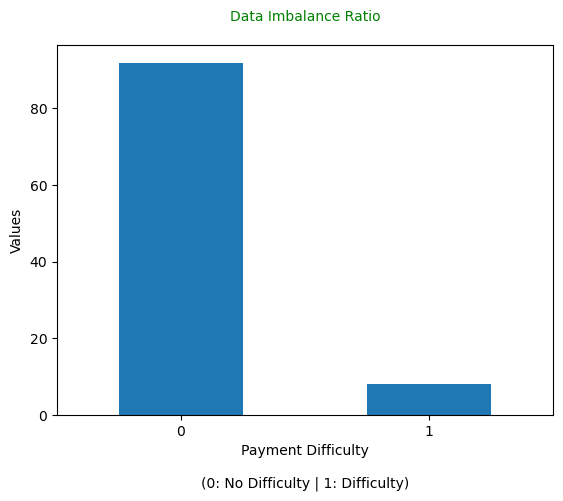

In [91]:

plt.xlabel("Payment Difficulty\n(0: No Difficulty | 1: Difficulty)")
(100*app_data['TARGET'].value_counts(normalize= True)).plot.bar()
plt.xlabel("Payment Difficulty\n\n(0: No Difficulty | 1: Difficulty)")
plt.ylabel("Values")
plt.title("Data Imbalance Ratio\n", fontsize=10, color='green')
plt.xticks(rotation =0)
plt.show()



Note ======> There is a data imbalance as more than 91.9 % has no payment difficulty however,  8.1% has payment difficulty



# Binning

We will binn few variables as this will help us to understand the analysis easily.

In [92]:
#Checking'YEARS_BIRTH'

#Fiest check what is the min,median, and max of this column.
app_data['YEARS_BIRTH'].agg(['min','median','max'])

min       20.517808
median    43.150685
max       69.120548
Name: YEARS_BIRTH, dtype: float64

In [93]:
#Lets binn this.

bins = [0,20,30,40,50,60,100]

label = ['20Y','20Y-30Y','30Y-40Y','40Y-50Y','50Y-60Y','Above 60Y']

app_data['AGE_GROUP'] = pd.cut(app_data['YEARS_BIRTH'],bins=bins,labels=label)

In [94]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0     100002       1         Cash loans           M            N   
1     100003       0         Cash loans           F            N   
2     100004       0    Revolving loans           M            Y   
3     100006       0         Cash loans           F            N   
4     100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  YEARS_BIRTH  YEARS_EMPLOYED  \
0                    0.018801    25.920548        1.745205   
1                    0.003541    45.931507        3.254795   
2                    0.010032    52.180822        0.616438   
3                    0.008019    52.068493        8.326027   
4                    0.028663    54.608219        8.323288   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            9.994521          5.808219        Laborers              1.0   
1            3.249315          0.797260      Core staff              2.0   
2           11.671233          6.934247        Laborers              1.0   
3           26.939726          6.676712        Laborers              2.0   
4           11.810959          9.473973      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0 

In [95]:
### Lets work on 'YEARS_EMPLOYED'

#Checking the min,median and max values.

app_data['YEARS_EMPLOYED'].agg(['min','median','max'])

min          0.000000
median       6.079452
max       1000.665753
Name: YEARS_EMPLOYED, dtype: float64

In [96]:
#For better understanding of the values we have to check the quantiles.
app_data['YEARS_EMPLOYED'].quantile([0,0.2,0.4,0.6,0.8,0.81,0.83,0.85,0.9,0.95,0.99])


0.00       0.000000
0.20       2.052055
0.40       4.375342
0.60       8.306849
0.80      25.173151
0.81      29.899425
0.83    1000.665753
0.85    1000.665753
0.90    1000.665753
0.95    1000.665753
0.99    1000.665753
Name: YEARS_EMPLOYED, dtype: float64

In [97]:
#Lets binn this.

bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,10001]

label = ['0-5Y','5Y-10Y','10Y-15Y','15Y-20Y','20Y-25Y','25Y-30Y','30Y-35Y','35Y-40Y','40Y-45Y','45Y-50Y','50Y-55Y','55Y-60Y','Above 65Y']

app_data['EMPLOYED_TENURE'] = pd.cut(app_data['YEARS_EMPLOYED'],bins=bins,labels=label)

In [98]:
#Lets check 'AMT_INCOME_TOTAL'


#Checking the quantiles.
app_data['AMT_INCOME_TOTAL'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99,1.0])

0.00        25650.0
0.10        81000.0
0.20        99000.0
0.30       112500.0
0.40       135000.0
0.50       147150.0
0.60       162000.0
0.70       180000.0
0.80       225000.0
0.90       270000.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [99]:
#Lets binn it.

bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 120000000]
label= labels = ['0-100K', '100K-200K', '200K-300K', '300K-400K', '400K-500K', '500K-600K', '600K-700K', '700K-800K', '800K-900K', '900K-1M', 'Above 1M']

app_data['INCOME_RANGE'] = pd.cut(app_data['AMT_INCOME_TOTAL'],bins=bins,labels=label)


In [100]:
#Checking 'AMT_CREDIT'


#Looking the quantiles for this column to check the distribution.

app_data['AMT_CREDIT'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99,1])




0.00      45000.0
0.10     180000.0
0.20     254700.0
0.30     306306.0
0.40     432000.0
0.50     513531.0
0.60     604152.0
0.70     755190.0
0.80     900000.0
0.90    1133748.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

In [101]:
bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 2000000, 5000000]
label = ['0-100K', '100K-200K', '200K-300K', '300K-400K', '400K-500K', '500K-600K', '600K-700K', '700K-800K', '800K-900K', '900K-1M', '1M-2M', 'Above 2M']

app_data['CREDIT_RANGE'] = pd.cut(app_data['AMT_CREDIT'],bins=bins,labels=label)

In [102]:
#Checking for 'AMT_ANNUITY'.

#Looking the quantiles for this column to check the distribution of values.

app_data['AMT_ANNUITY'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99,1.0])

0.00      1615.5
0.10     11074.5
0.20     14701.5
0.30     18189.0
0.40     21870.0
0.50     24903.0
0.60     28062.0
0.70     32004.0
0.80     37516.5
0.90     45954.0
0.99     70006.5
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

In [103]:
#Making the bins for 'AMT_ANNUITY'.

bins = [0,10000,20000,30000,40000,50000,60000,70000,80000,260000]
label = ['0-10K','10K-20K','20K-30K','30K-40K','40K-50K','50K-60K','60K-70K','70K-80K','Above 80K']
app_data['ANNUITY_RANGE']= pd.cut(app_data['AMT_ANNUITY'],bins= bins,labels=label)

In [104]:
#Checking for 'AMT_GOODS_PRICE'

#Looking the quantiles for this column to check the distribution of values.

app_data['AMT_GOODS_PRICE'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99,1.0])

0.00          0.0
0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     373500.0
0.50     450000.0
0.60     522000.0
0.70     675000.0
0.80     814500.0
0.90    1093500.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [105]:
#Making the bins for 'AMT_GOODS_PRICE'.

bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
label = ['0-100K','100K-200K','200K-300K','300K-400K','400K-500K','500K-600K','600K-700K','700K-800K','800K-900K','Above 900K']
app_data['GOODS_PRICE_RANGE']= pd.cut(app_data['AMT_GOODS_PRICE'],bins= bins,labels= label )


In [106]:
#Checking the dataframe to confirm if we have new columns which we created while binning.
app_data.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0     100002       1         Cash loans           M            N   
1     100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  YEARS_BIRTH  YEARS_EMPLOYED  \
0                    0.018801    25.920548        1.745205   
1                    0.003541    45.931507        3.254795   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            9.994521          5.808219        Laborers              1.0   
1            3.249315          0.797260      Core staff              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   

   YEARS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                 3.106849                         0.0   
1                 2.268493                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR AGE_GROUP EMPLOYED_TENURE INCOME_RANGE  \
0                         1.0   20Y-30Y            0-5Y    200K-300K   
1                         0.0   40Y-50Y            0-5Y    200K-300K   

  CREDIT_RANGE ANNUITY_RANGE GOODS_PRICE_RANGE  
0    400K-500K       20K-30K         300K-400K  
1        1M-2M       30K-40K        Above 900K

# Checking for duplicated rows in the dataframe.

In [107]:
#We did not found any duplicate rows in the datframe.
app_data[app_data.duplicated()]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, YEARS_BIRTH, YEARS_EMPLOYED, YEARS_REGISTRATION, YEARS_ID_PUBLISH, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, YEARS_LAST_PHONE_CHANGE, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR, AGE_GROUP, EMPLOYED_TENURE, INCOME_RANGE, CREDIT_RANGE, ANNUITY_RANGE, GOODS_PRICE_RANGE]
Index: []

In [108]:
app_data.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0     100002       1         Cash loans           M            N   
1     100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  YEARS_BIRTH  YEARS_EMPLOYED  \
0                    0.018801    25.920548        1.745205   
1                    0.003541    45.931507        3.254795   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            9.994521          5.808219        Laborers              1.0   
1            3.249315          0.797260      Core staff              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   

   YEARS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                 3.106849                         0.0   
1                 2.268493                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR AGE_GROUP EMPLOYED_TENURE INCOME_RANGE  \
0                         1.0   20Y-30Y            0-5Y    200K-300K   
1                         0.0   40Y-50Y            0-5Y    200K-300K   

  CREDIT_RANGE ANNUITY_RANGE GOODS_PRICE_RANGE  
0    400K-500K       20K-30K         300K-400K  
1        1M-2M       30K-40K        Above 900K

In [109]:
app_data.dtypes

SK_ID_CURR                       object
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
YEARS_BIRTH                     float64
YEARS_EMPLOYED                  float64
YEARS_REGISTRATION              float64
YEARS_ID_PUBLISH                float64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64


# Univariate Analysis

Now we will be doing Univaraite analysis to understand the distribution

In [110]:
#Doing the univariate analysis on the 'object columns'.

Object_col= ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']

In [111]:
#Defining a function to make the countplot for all the columns in 'object_col'

def count_plot_object(app_data,Object_col):
    for i in Object_col:
        plt.style.use('ggplot')
        plt.figure(figsize=(8,3))
        sns.countplot(data= app_data,x= i)
        plt.title(f'Distribution of {i}')
        plt.xticks(rotation=45, ha="right")
        plt.show()
        

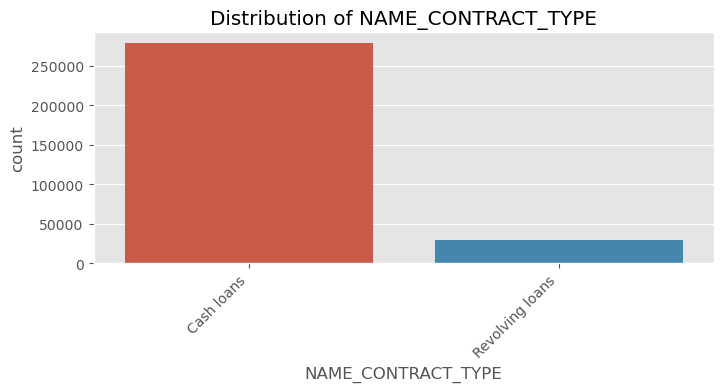

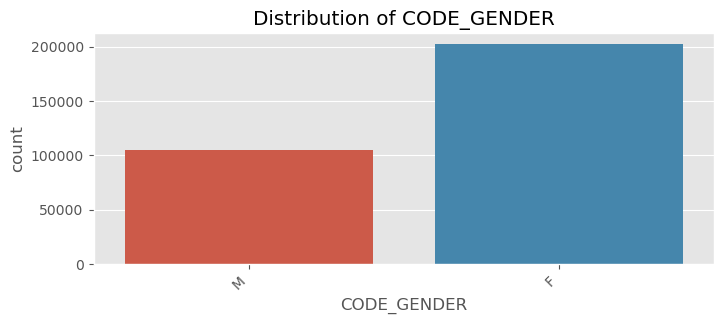

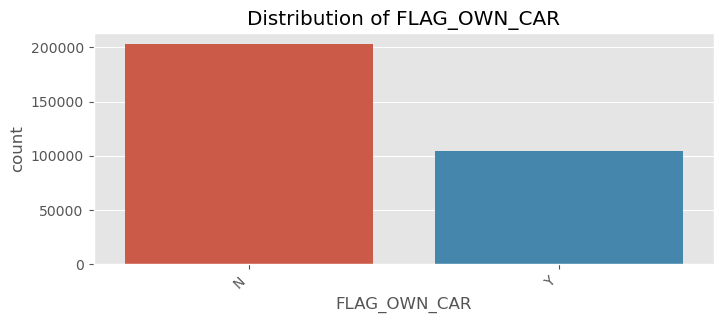

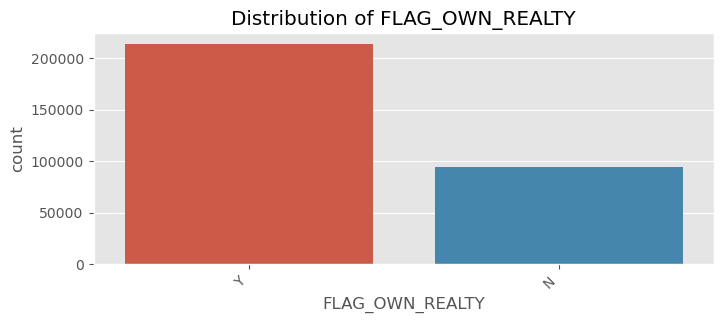

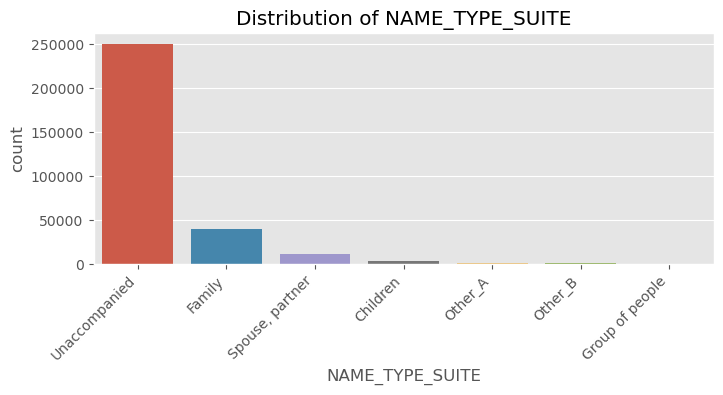

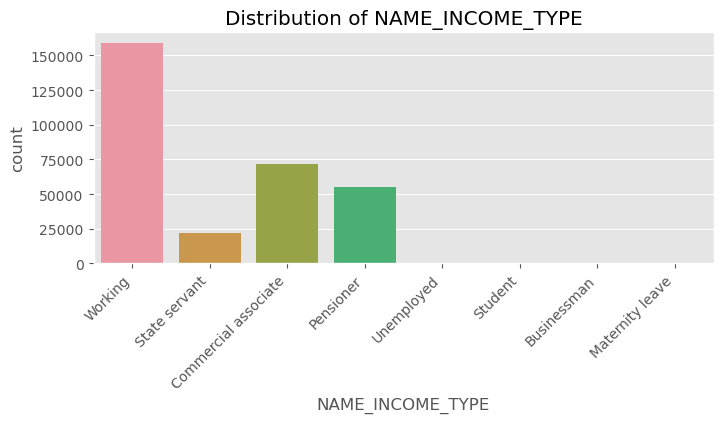

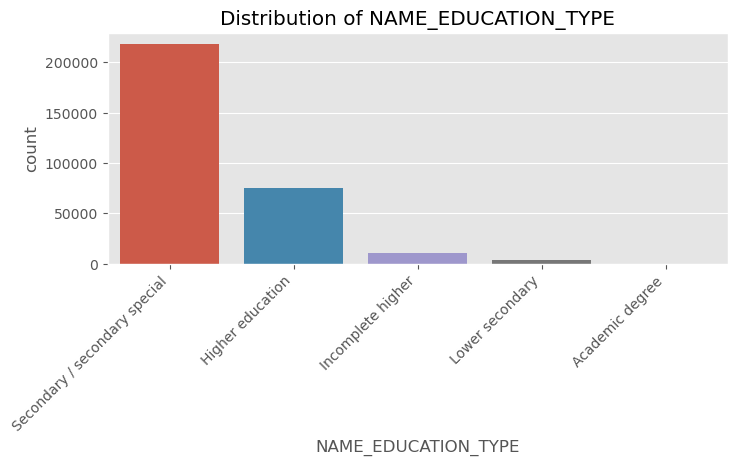

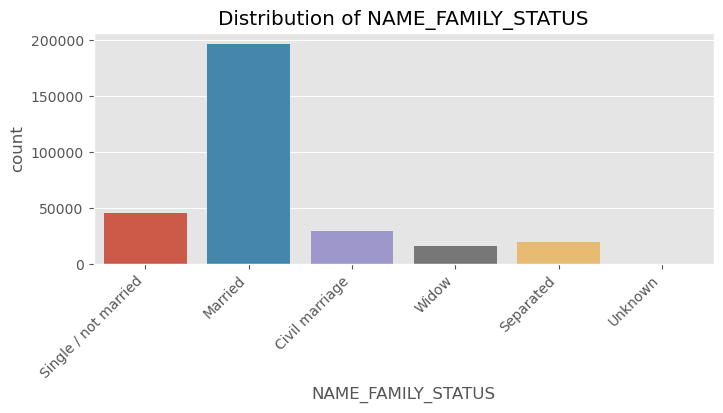

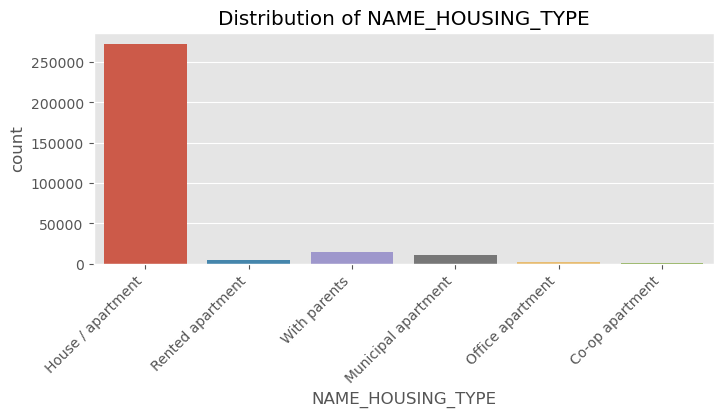

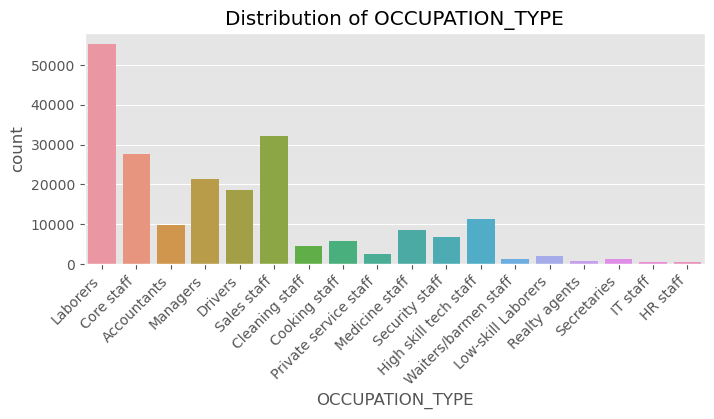

In [112]:
#Plotting the graphs.
count_plot_object(app_data,Object_col)

# Notes

1. Contract Type - Customers have applied for cash loans in comparision to revolving loans

2. Gender - More females Customers have applied for the loans

3. Own Car - Most of the Customers does not own car

4. Own Realty - Most of the Customers own Realty

5. Name Type Suite - The highest amount of Customers who applied for loan were unaccompanied

6. Income Type - The highest percentage of the loans applied are from the working class followed by commercial associate and pensioner.

7. Education Type - Customers with Secondary/Secondary special education and higher education have applied most of the loans.

8. Family Status - Customers who are Married have applied most of the loan followed by Single/not married.

9. Housing Type - Customers who are living in House/Apartment have applied most of the loans

10. Occupation Type - Labourers has applied most of the loans, followed by Sales staff,core staff, Managers and Drivers.

In [113]:
#Making a list of the columns on which I have to do Univarite Analysis.


Numerical_columns= ['CNT_CHILDREN','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT','AMT_REQ_CREDIT_BUREAU_YEAR']

In [114]:
#Defining a function to plot the graphs one by one.

def count_plot_Numer(app_data,Numerical_columns):
    for i in Numerical_columns:
        plt.style.use('ggplot')
        plt.figure(figsize=(7,3))
        sns.countplot(data= app_data,x= i)
        plt.title(f'Distribution of {i}')
        plt.xticks(rotation=45, ha="right")
        plt.show()

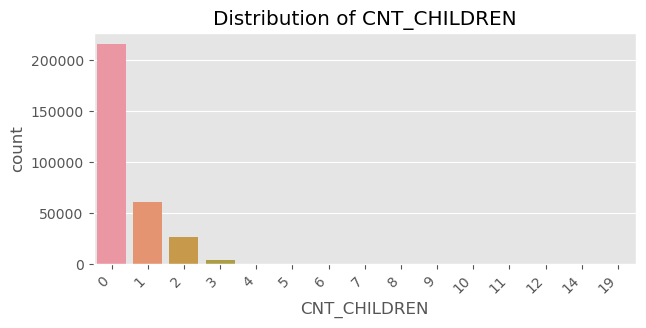

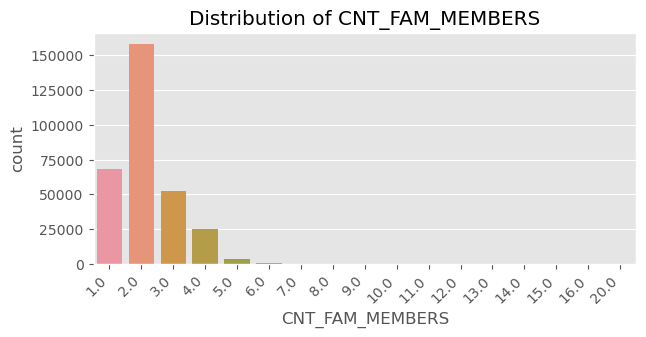

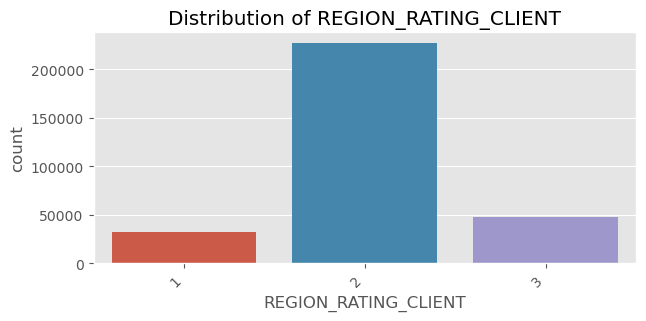

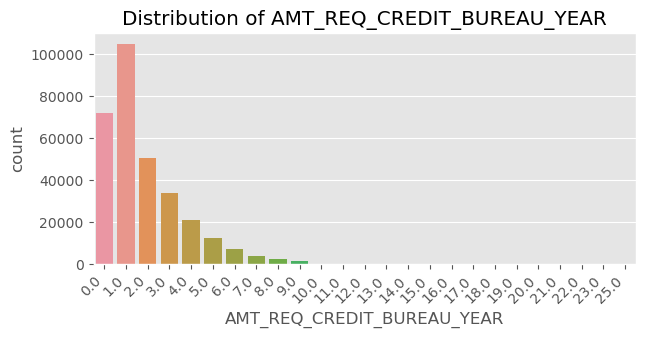

In [115]:
#Plotting the graphs.

count_plot_Numer(app_data,Numerical_columns)

# Notes

1. CNT_CHILDREN- Most of the clients who applied for loan have childrens zero followed by one children.

2. CNT_FAM_MEMBERS- Most of the clients who applied for loan has two family members followed byone and three.

3. REGION_RATING_CLIENT- More than 90% of the clients who applied for loans has rating 2.

4. AMT_REQ_CREDIT_BUREAU_YEAR- For most of the clients bank has enquired to Credit Bureau about the client one time.

In [116]:
#Checking the columns on which we did binning('Category column').

app_data.columns[app_data.dtypes=="category"].tolist()

['AGE_GROUP',
 'EMPLOYED_TENURE',
 'INCOME_RANGE',
 'CREDIT_RANGE',
 'ANNUITY_RANGE',
 'GOODS_PRICE_RANGE']

In [117]:
#Making a list of all the columns and giving it a name 'Binned_columns'.

Binned_columns= ['AGE_GROUP','EMPLOYED_TENURE','INCOME_RANGE','CREDIT_RANGE','ANNUITY_RANGE','GOODS_PRICE_RANGE']

In [118]:
#Making a function to plot the graphs one by one.

def count_plot_binned(app_data,Binned_columns):
    
    for i in Binned_columns:
        plt.style.use('ggplot')
        plt.figure(figsize=(7,3))
        
        ax = sns.countplot(data=app_data, x=i)
        sns.countplot(data= app_data,x= i)
        plt.title(f'Distribution of {i}')
        plt.xticks(rotation=45, ha="right")
        
#Also adding the annotation for these graphs.  

        total = float(len(app_data[i]))
        
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2.,height + 0.75,'{:.1f}%'.format((height / total) * 100),ha="center")
        
        plt.show()

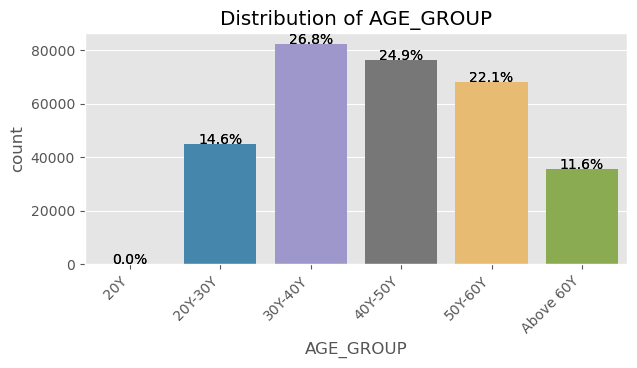

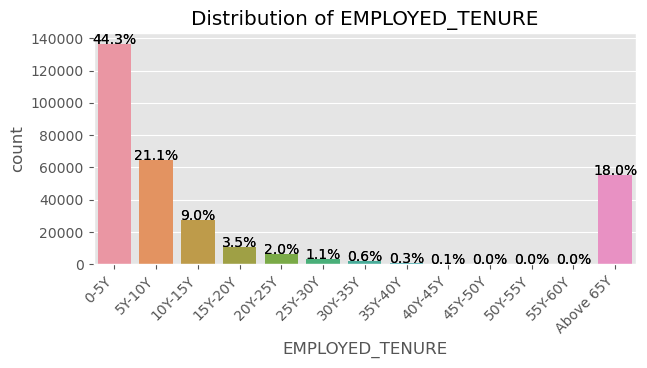

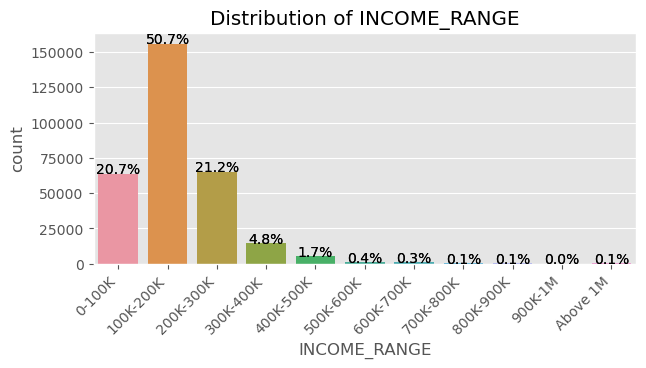

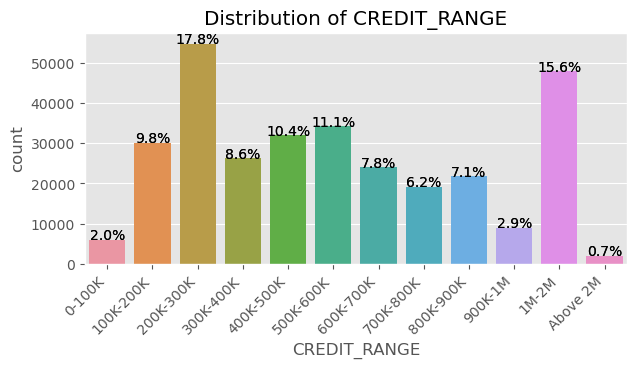

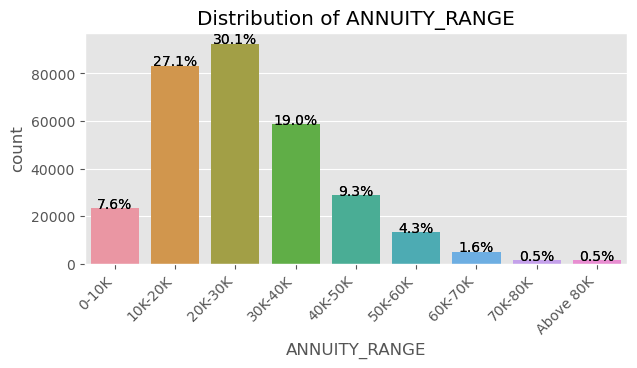

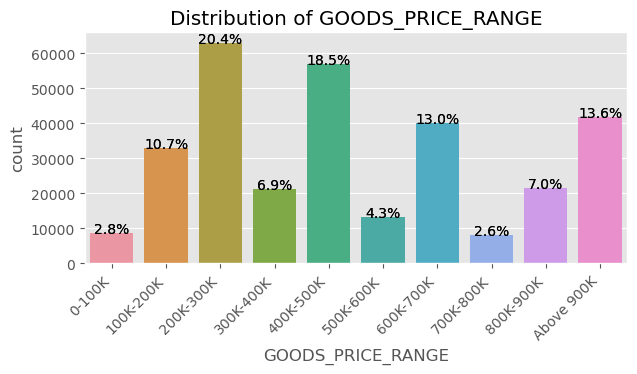

In [119]:
count_plot_binned(app_data,Binned_columns)

# Notes


1. GROUP- Customers age between 30-40 years has applied most of the loans followed by 40-50 years and 50-60 years.

2. EMPLOYED_TENURE - 44.3% loans are applied by customer who has age between 0-5 Years,21.1% with age between 5-10 Years.

3. INCOME_RANGE- 50.7% Customers whose income range is between 100k to 200k has applied for the loan.

4. followed by 21.2% customer having salary between 200k to 300k and 20.7% customers having between 0 to 100k.

5. CREDIT_RANGE - 17.8% customers applied for the credit of 200k to 300k which is the highest followed by 15.6% customers with the credit of 1M -2M.

6. ANNUITY_RANGE- 30.1% customers having annuity amount between 20k-30k which is the highest followed by 27.1% having the annuity between 10k-20k.

7. GOODS_PRICE_RANGE- 20.4% of the customer having goods price between 200k -300k, followed by 400k-500k with 18.5% customers and 13.6% having above 900k price.


# Univariate Analysis with respect to Target Variable (Segmented)

# We will make it for the columns which has object datatypes.

Making the graph in this way because it is easy to analyse and bring the insights.

In [120]:
#Getting the columns which has data type object.

app_data.select_dtypes(include=['object']).columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [121]:
#Selecting the important columns and making a list.

object_columns= ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

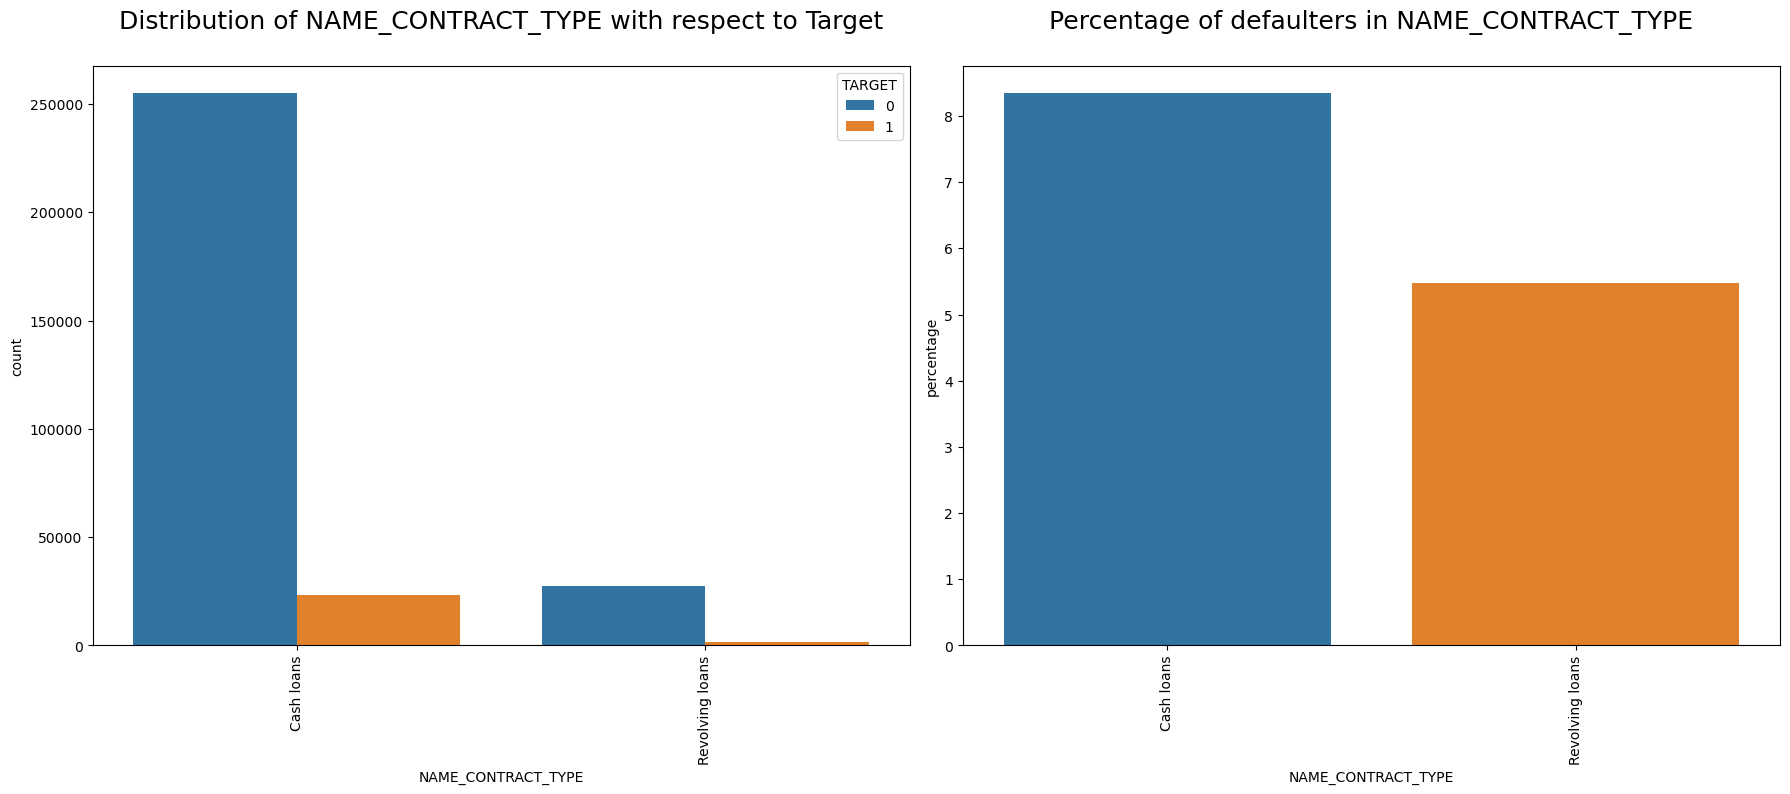

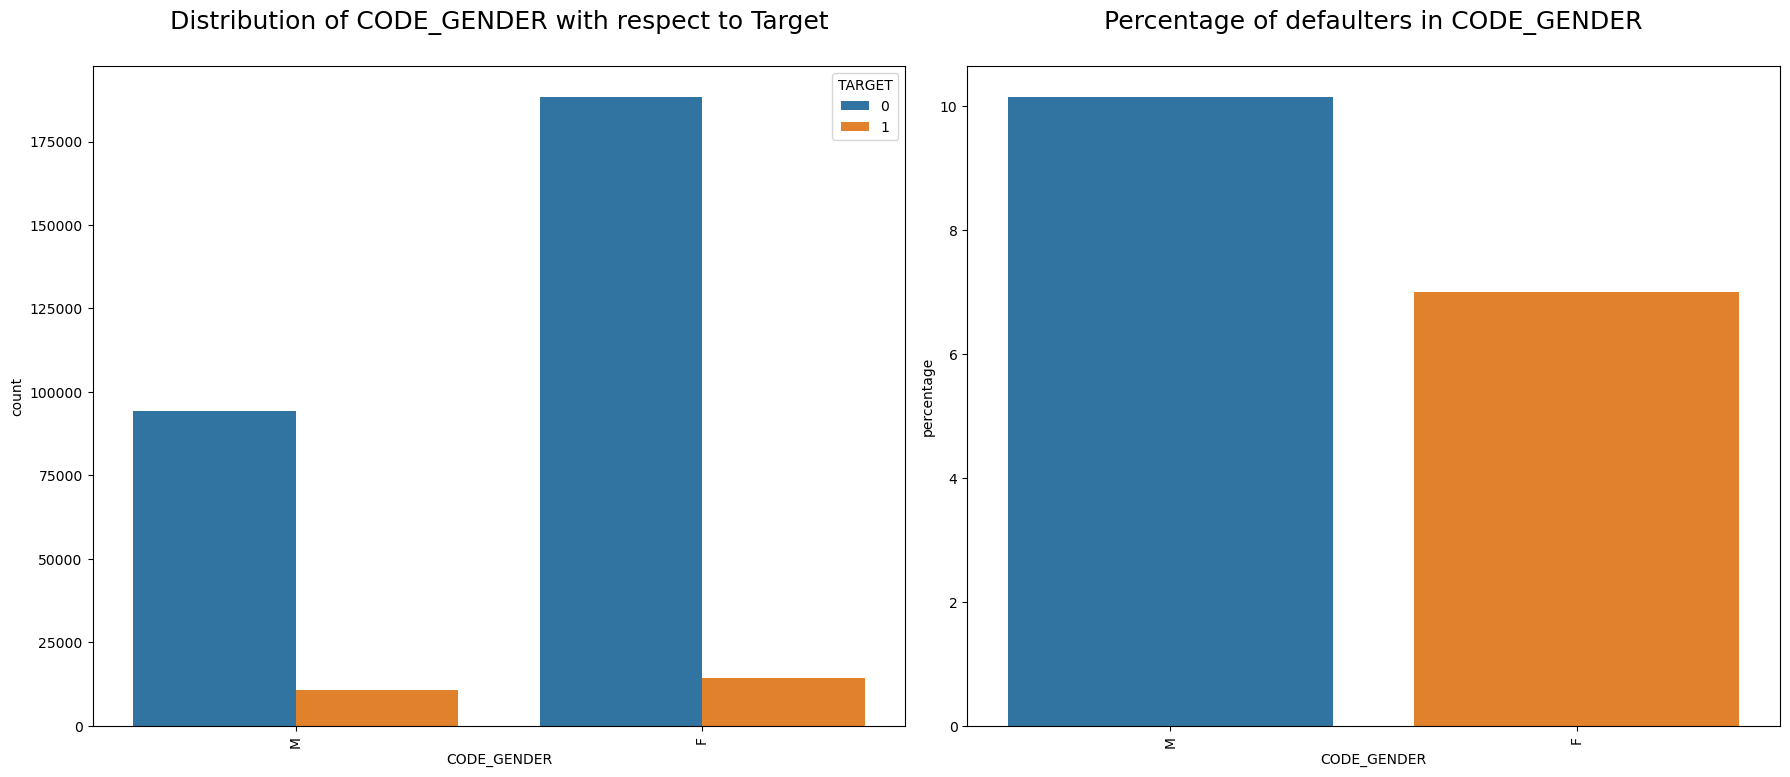

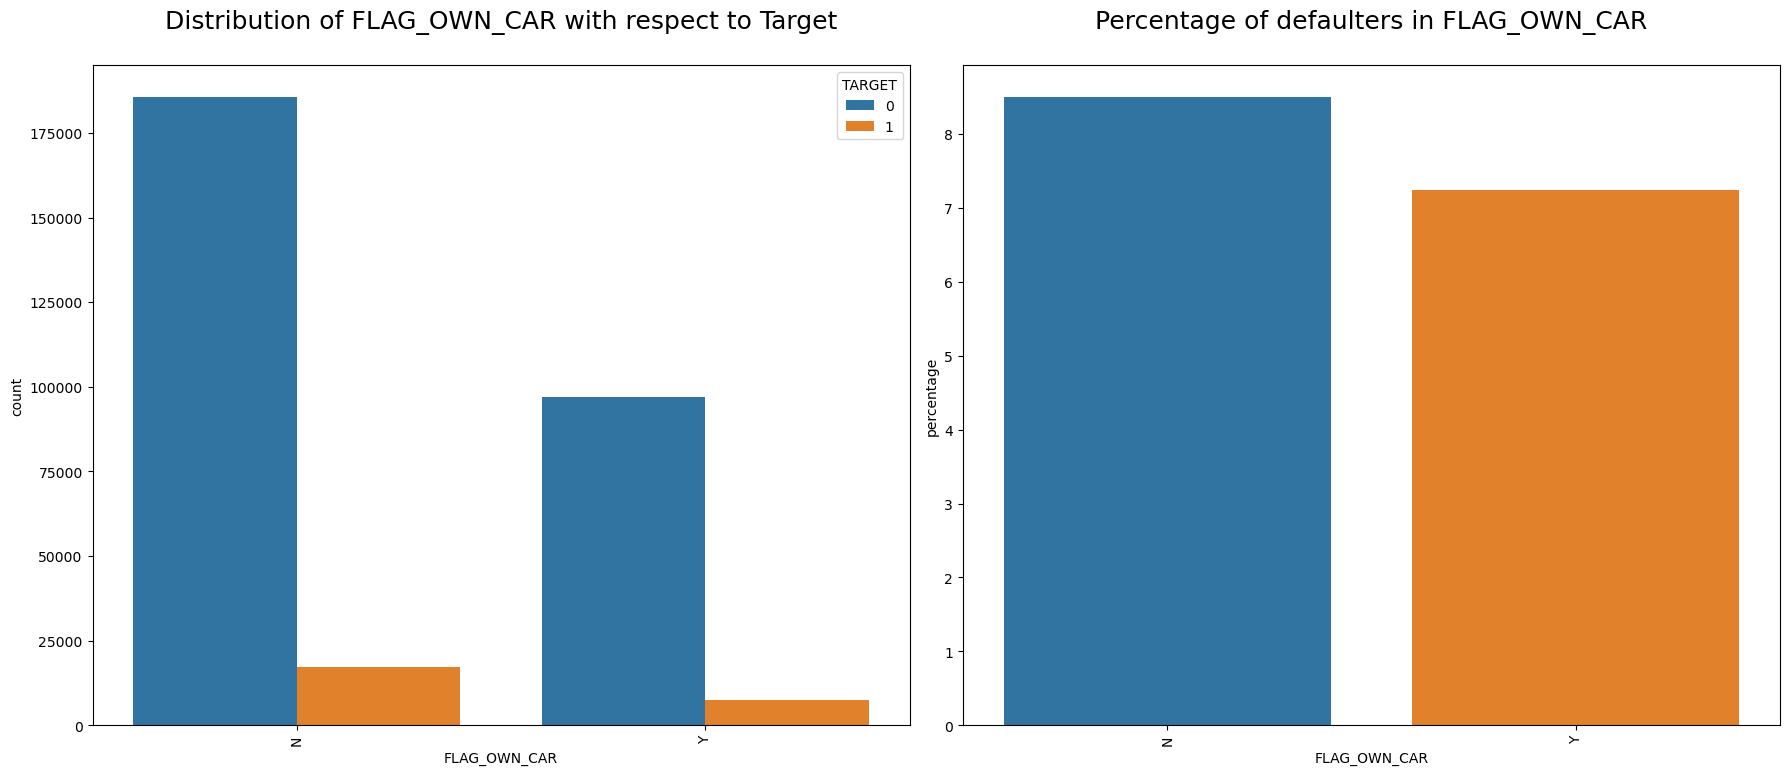

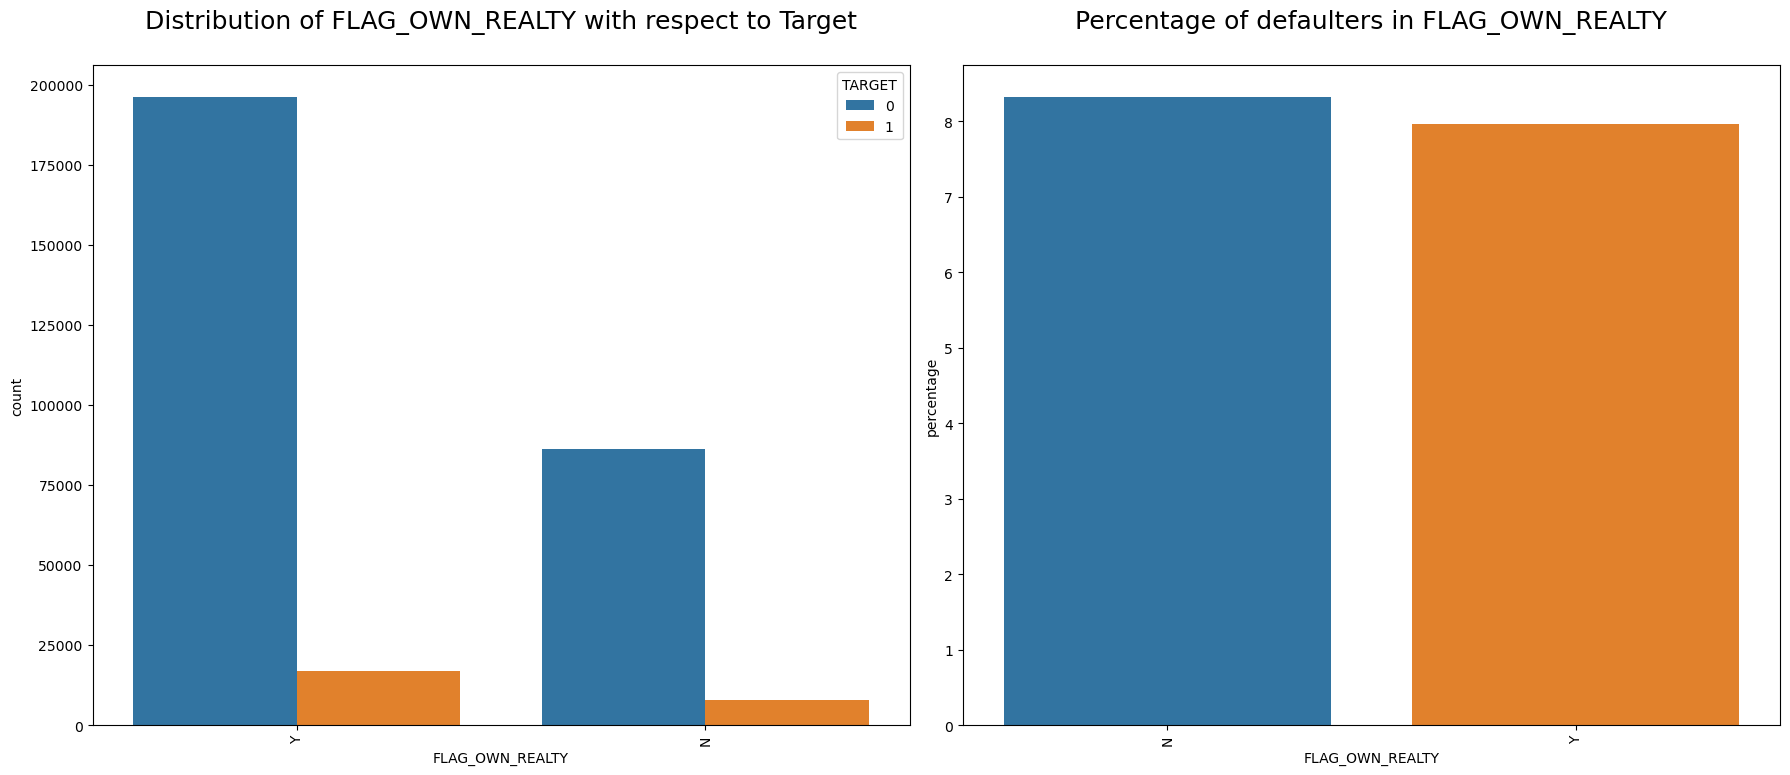

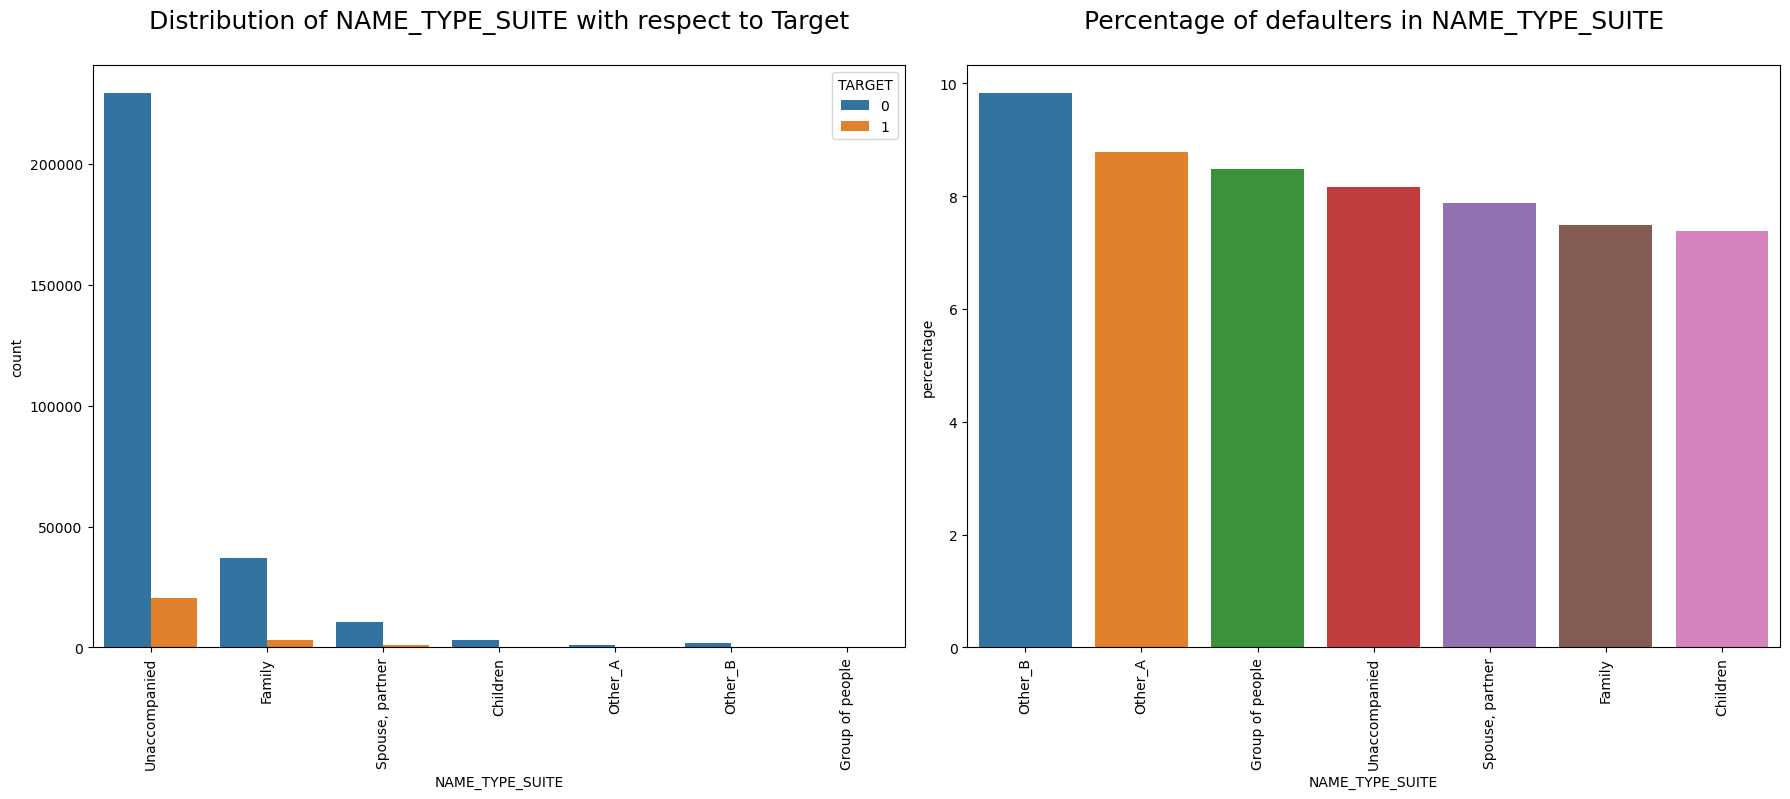

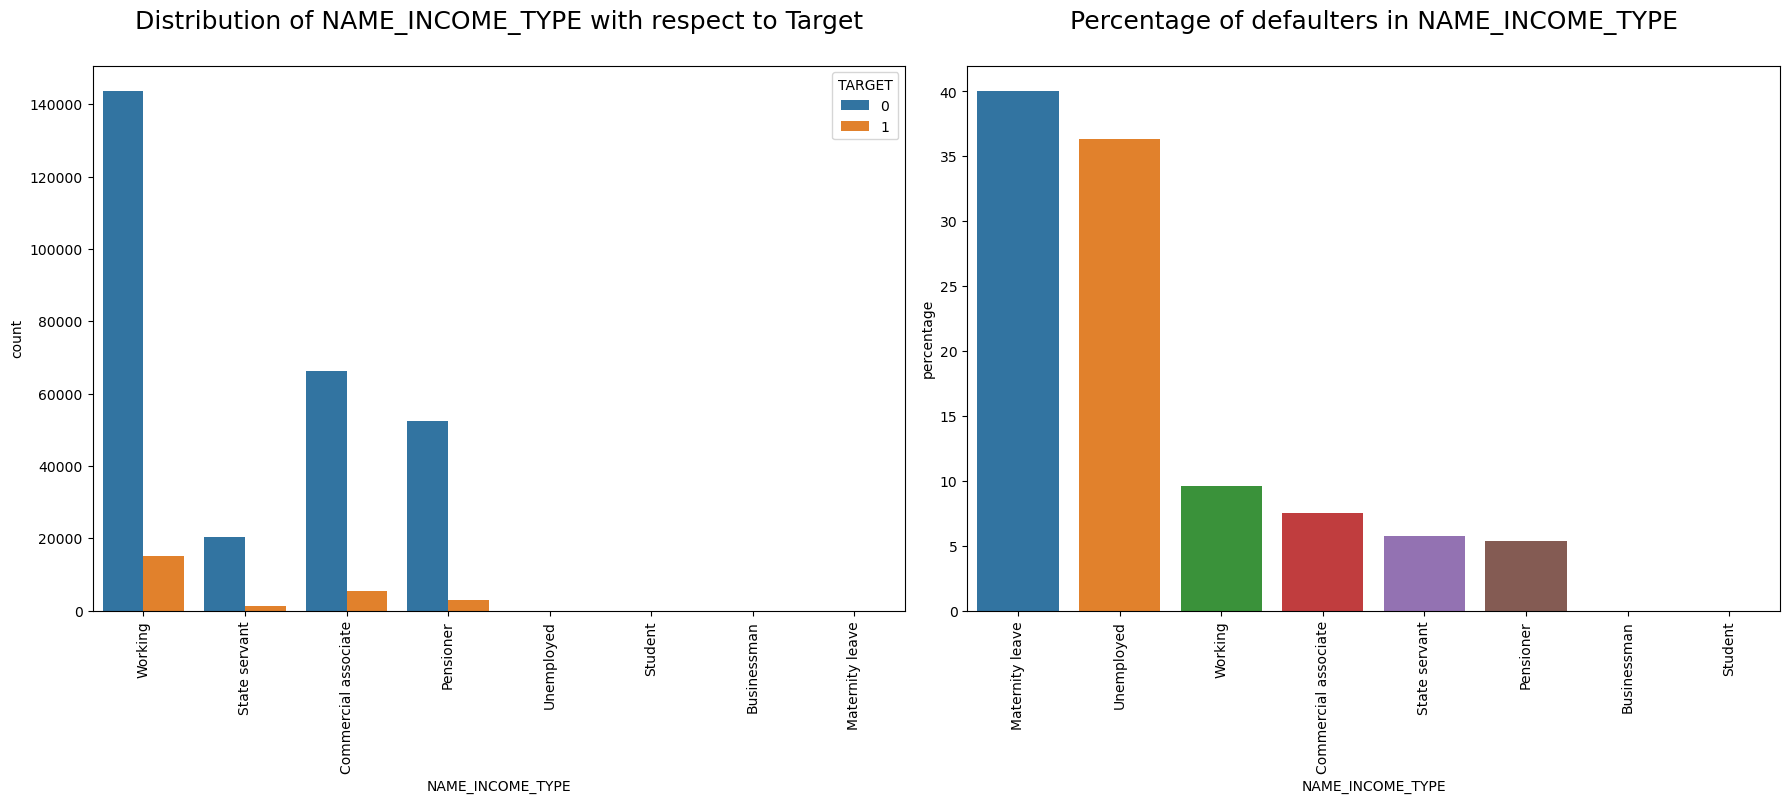

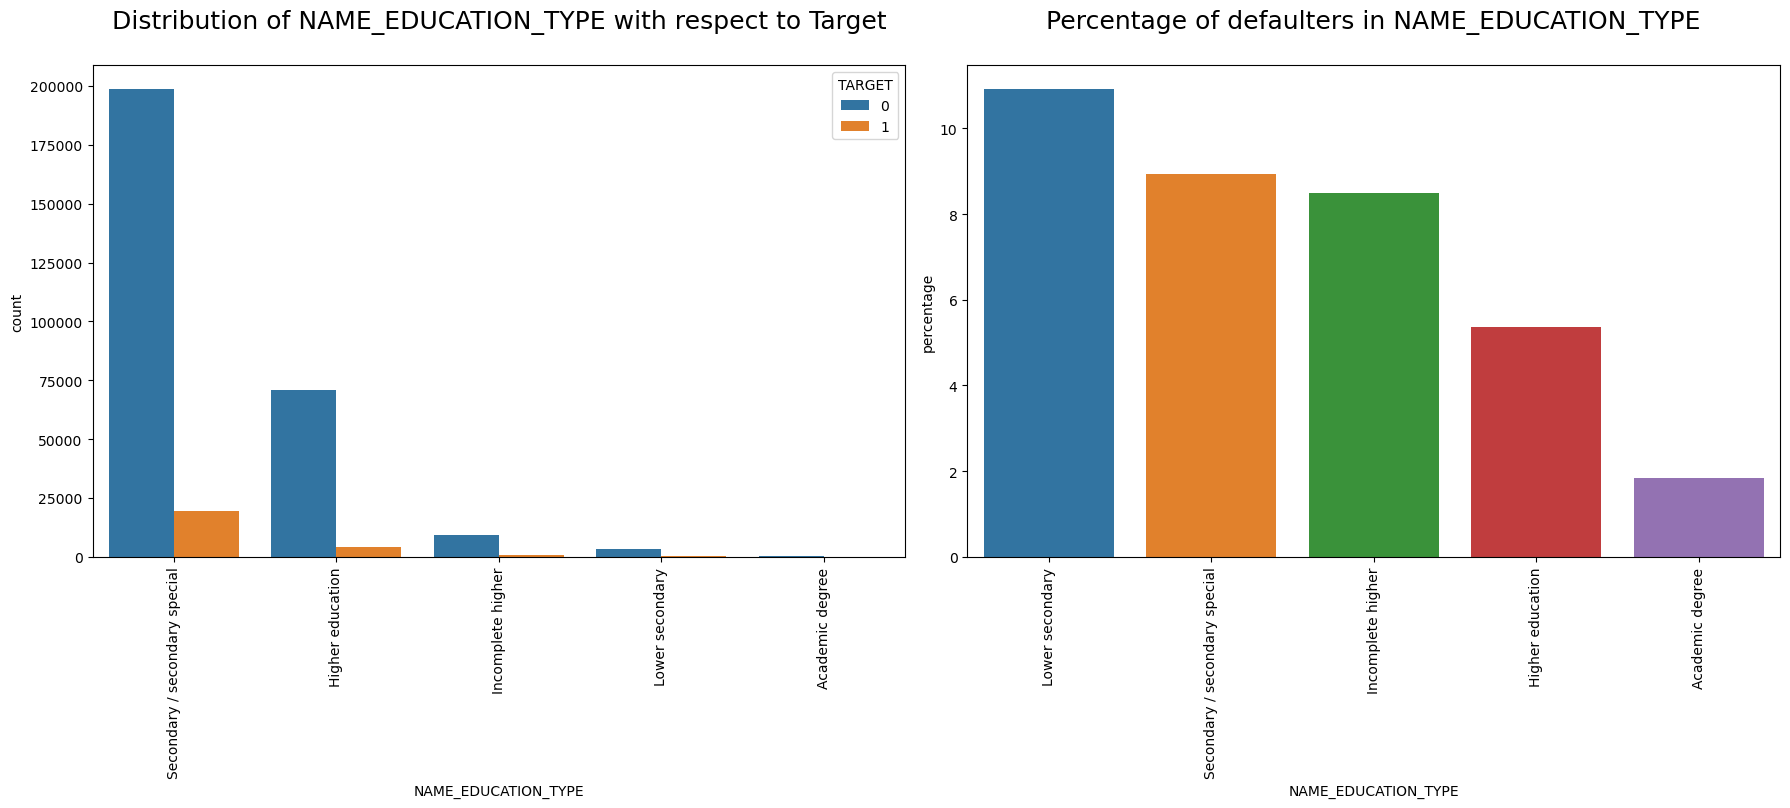

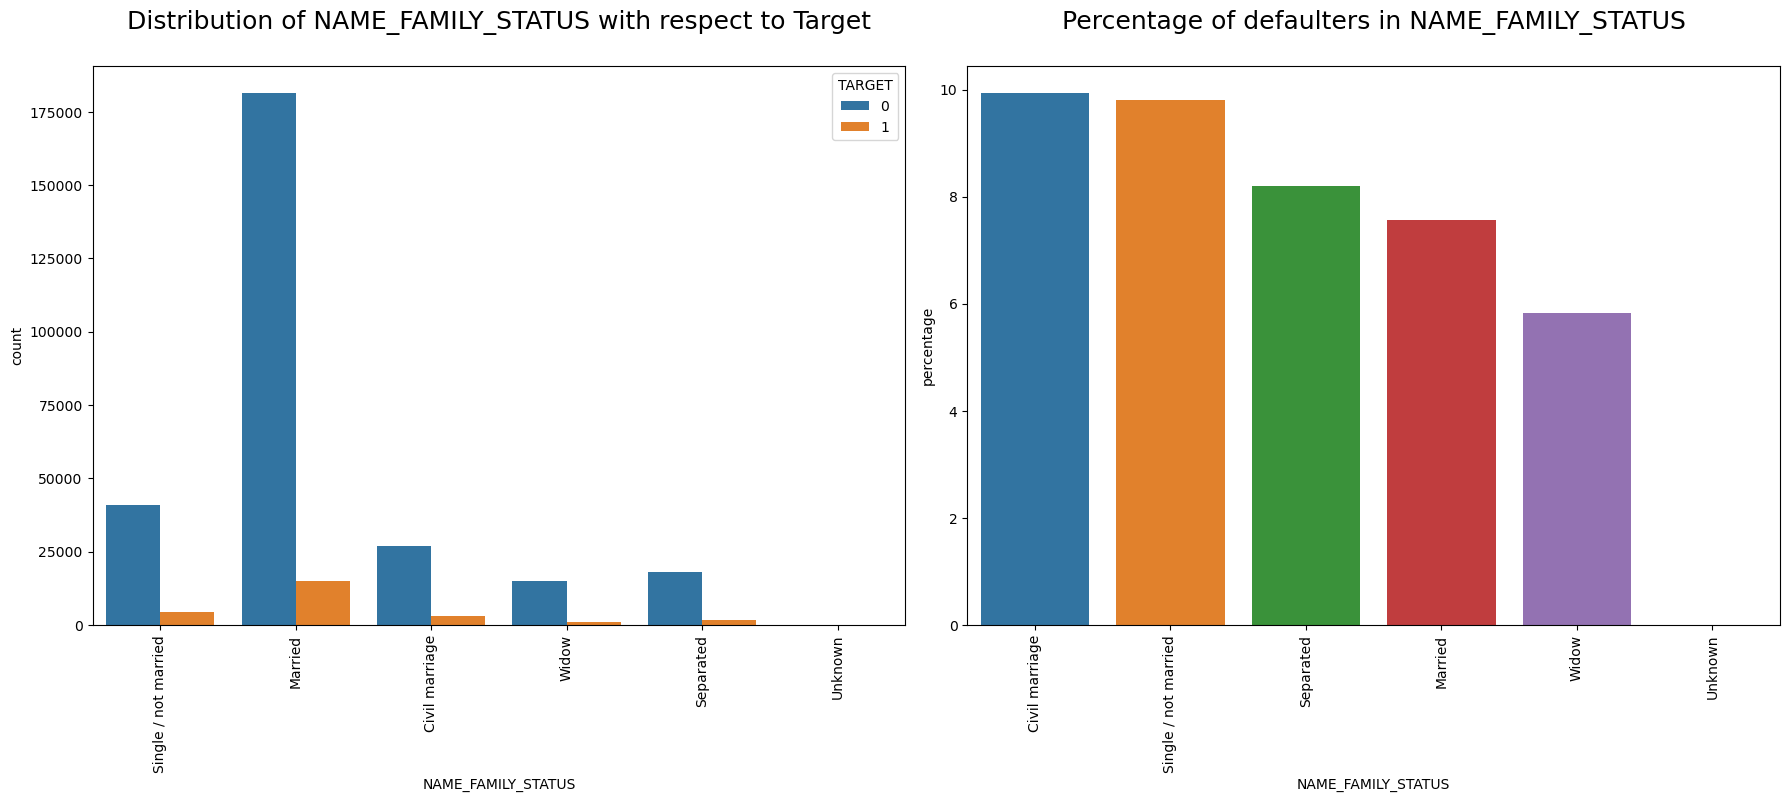

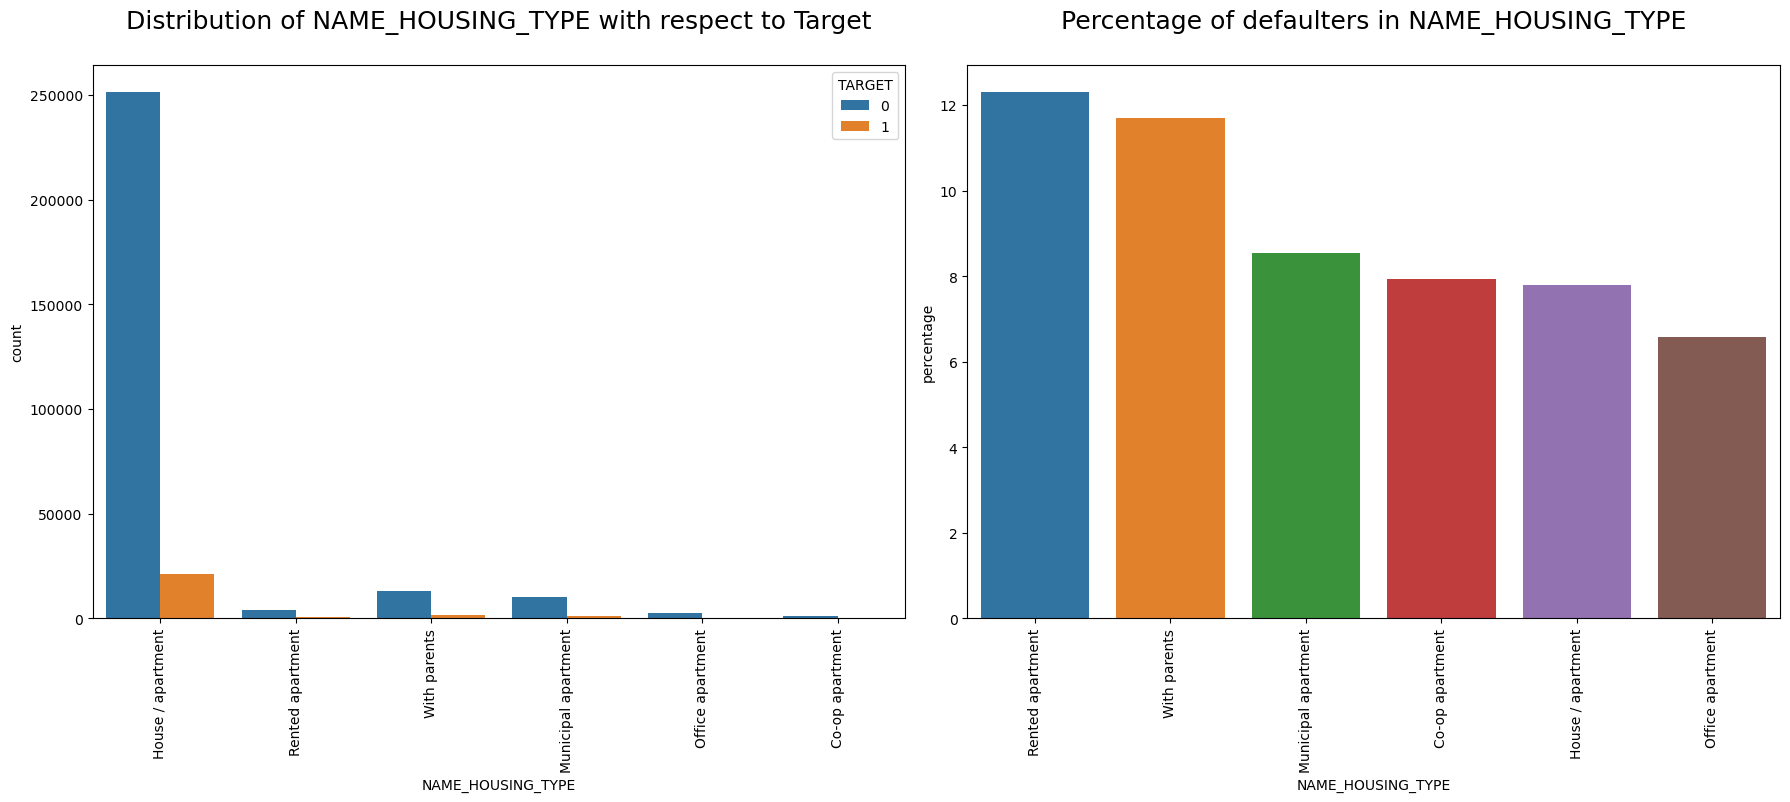

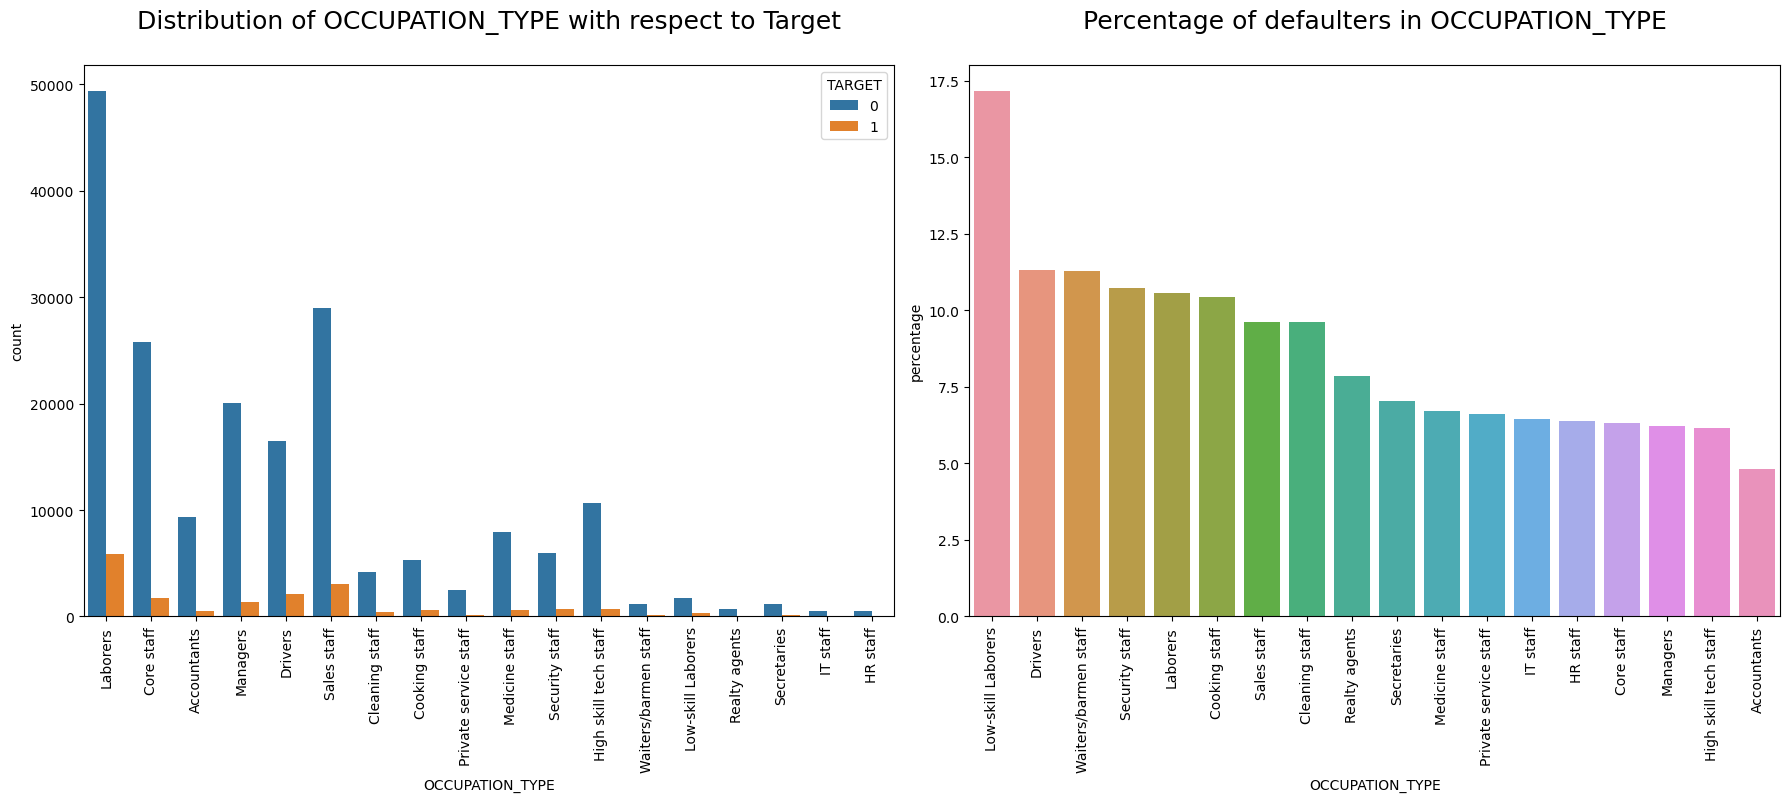

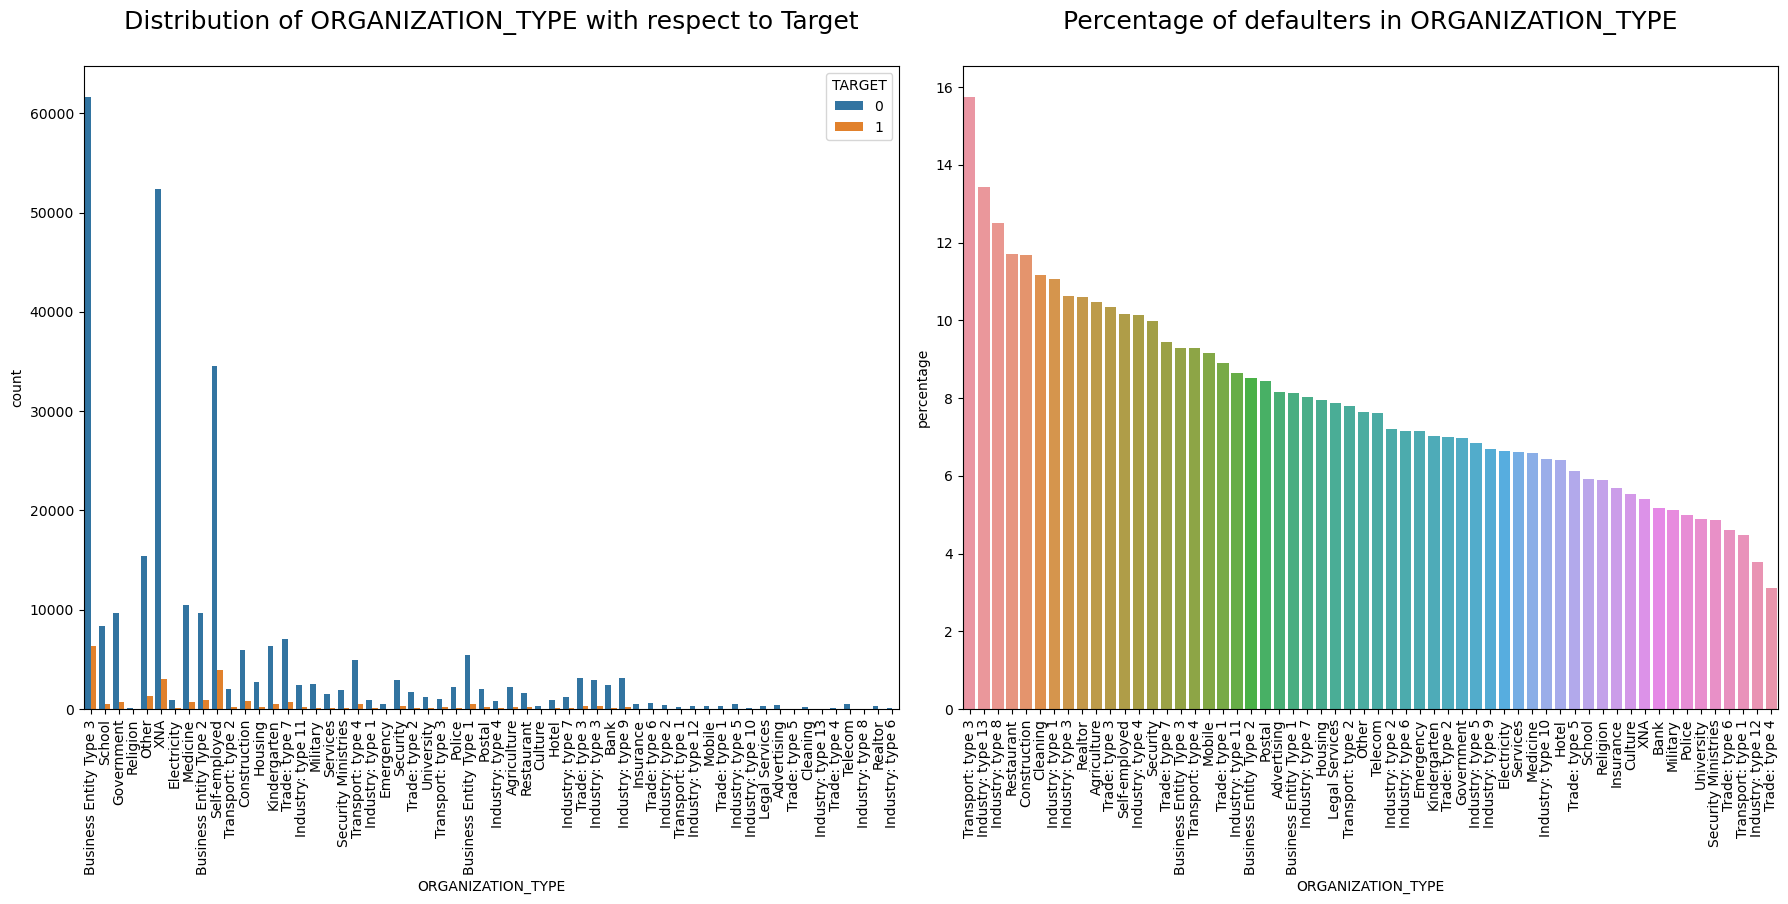

In [122]:
#This code will help us to make the graphs side by side so that we can analyse it easily.

#

for i, j in enumerate(object_columns):
    plt.figure(figsize=(18,80))

    df = app_data[[j,'TARGET']].groupby([j], as_index=False).mean().sort_values(by='TARGET',ascending=False)
    df['percentage'] = df['TARGET']*100
    
    plt.style.use('default')
    plt.subplot(11,2,i+i+1)
    plt.subplots_adjust()
    sns.countplot(data=app_data,x=j,hue='TARGET')
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {j} with respect to Target\n', fontsize=18)
    
    plt.style.use('default')
    plt.subplot(11,2,i+i+2)
    sns.barplot(data=df,x=j,y='percentage')
    plt.xticks(rotation=90)
    plt.title(f'Percentage of defaulters in {j}\n', fontsize=18)
    
    plt.tight_layout()
    plt.show()   

# Note


1. NAME_CONTRACT_TYPE- Most of the clients applied for cash loans in comparision to Revolving loans. However, if we will
check the defaulters percentage it seems like clients who are taking more Revolving loans are defaulting more because there
count is less but there default percentage is more than 5%.

2. Code_Gender- We should not do the analysis on basis of Gender however, just for information sharing the insights.
Approx 185K females have applied for loans and their defaulter rate is approx 7%. However, Approx 100K males have applied for loans and their defaulter percentage is approx 10%.

3. OWN_CAR- Most of the clients who applied loans doesn not have car but their defaulters rate is good in comparision to clients who own car. Clients who own car are half of the clients who doesnot.

4. NAME_TYPE_SUITE- Unaccompanied had taken most of the loans and their default rate is approx 8% which is still safer.
The clients living with childrens or family has the least default percentage however, they applications are also less.

5. INCOME_TYPE- Approx 140k clients from working class have applied for loans which is the highest and their default rate is 8.5%-9%.
Commercial Associate have applicants count is approx half of the working class and their default rate is approx 7.5%.
Pensioners have the lowest defaulters rate and their application were approx 50k.

6. EDUCATION TYPE- Most of the clients with education background secondary/secondary special have applied for loans and their default rate is approx 9% which is still fine as they have the highest application.
Lower secondary has the highest default rate more than 10% and their applications are very less.

7. FAMILY_STATUS- Married clients have applied most of the loans and their default rate is approx 7.8% which is decent in comparision to others.
Civil Marriage has the highest default rate and their applications are very less.

8. Housing Type- Clients living in office apartments has the lowest default rate approx 6.5% but their loan applications are very less.
Clients living in House/Apartments has the highest loan application and their default rate is good appox 8%.
Clients living in Rented Apartments has the highest default rate which is more than 12%.

9. Occupation Type- Low skill Labourers are the highest defaulters.
Accountants are less defaulters.
Labourers have taken highest number of loans and their default rate is approx 10.2%
Core staff application are half of the labourers and their default rate is approx 7.4 which is good.

10. Organization Type- Businnes entity Type 3 has applied most of the loans and their default rate is approx 9.1%.
Transport Type 3 has the highest number of default rate and their loan applications are vey few.



# Now we will do the univarate Analysis on Numberical variableW.R.T Target Variable

In [123]:
amount_columns= ['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE']


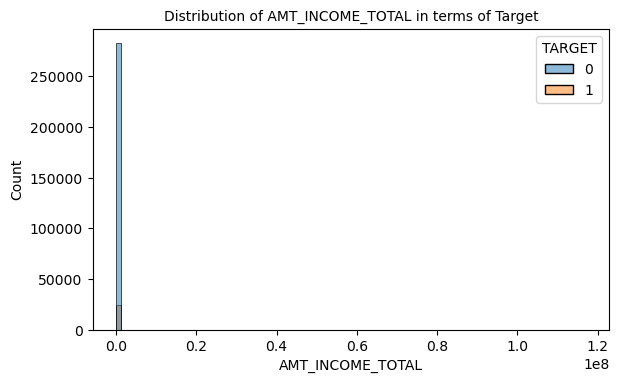

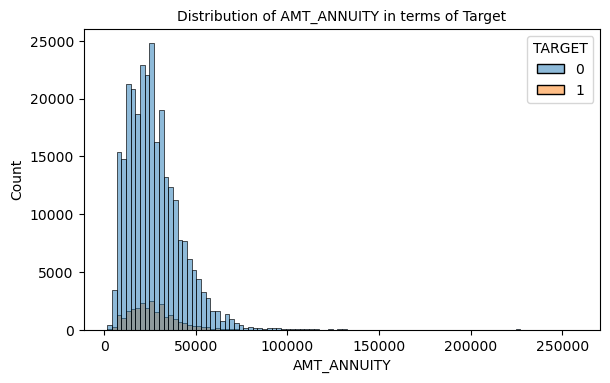

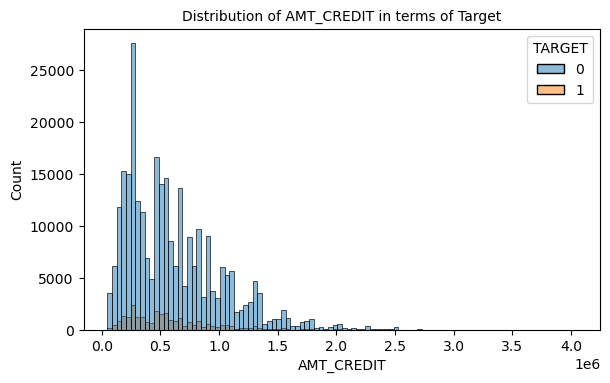

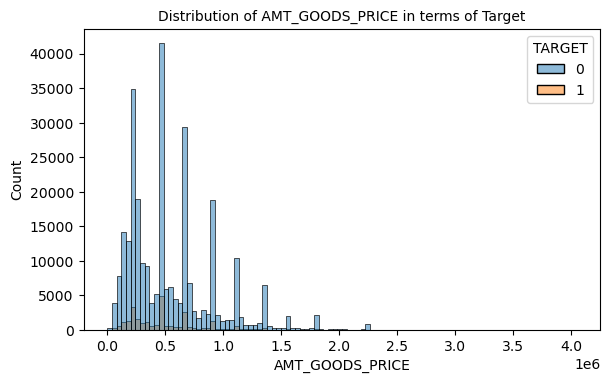

In [124]:

for i,col in enumerate(amount_columns):
    plt.figure(figsize= (20,25))
    plt.subplot(4,2,i+1)
    sns.histplot(data= app_data, x= col,hue= 'TARGET',bins= 100)
    plt.subplots_adjust(wspace= 1, hspace= 0.8)
    plt.title(f'Distribution of {col} in terms of Target', fontsize=10)
    plt.show()

# NOTES


1. Income Total- Most of the customers have income between 0 to 1 million and these customers have default ratio is very less.


2. Goods Price- Most of the loans were given for the goods price ranging between 0 to 1 Million.


3. Amount Credit- Credit amount is mostly in relation with Goods Price as clients requesting credits basis on Goods Price. Most of the credit requested is between 0 to 1 Million. Also, most of the defaulters are between this amount only.

4. Amount Annuity- Amount Annuity is depend on the Amount credit and most of the clients have annuity amount between 0 to 50K.





 



Now we will do the univarate Analysis on Category columns (Binned) W.R.T Target Variable.

In [125]:
Binned_columns= ['AGE_GROUP','EMPLOYED_TENURE','INCOME_RANGE','CREDIT_RANGE','ANNUITY_RANGE','GOODS_PRICE_RANGE']

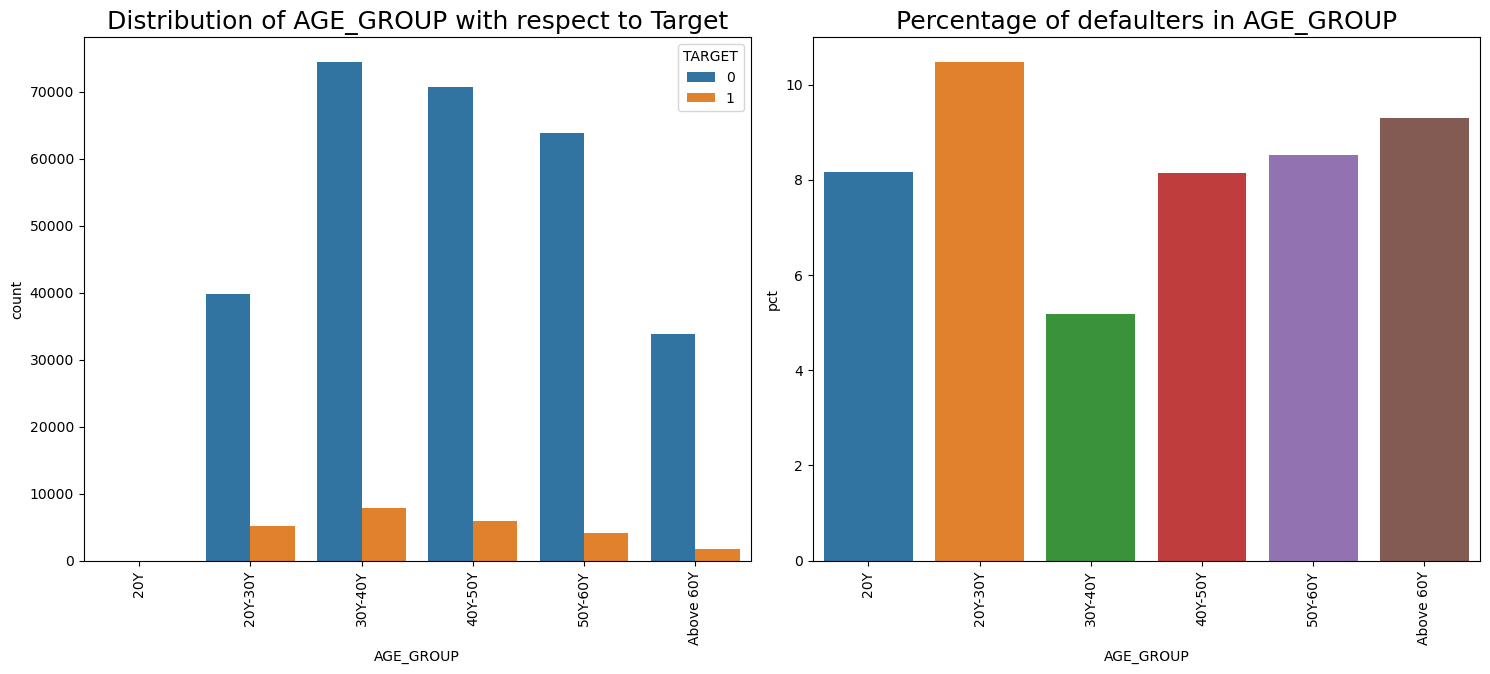

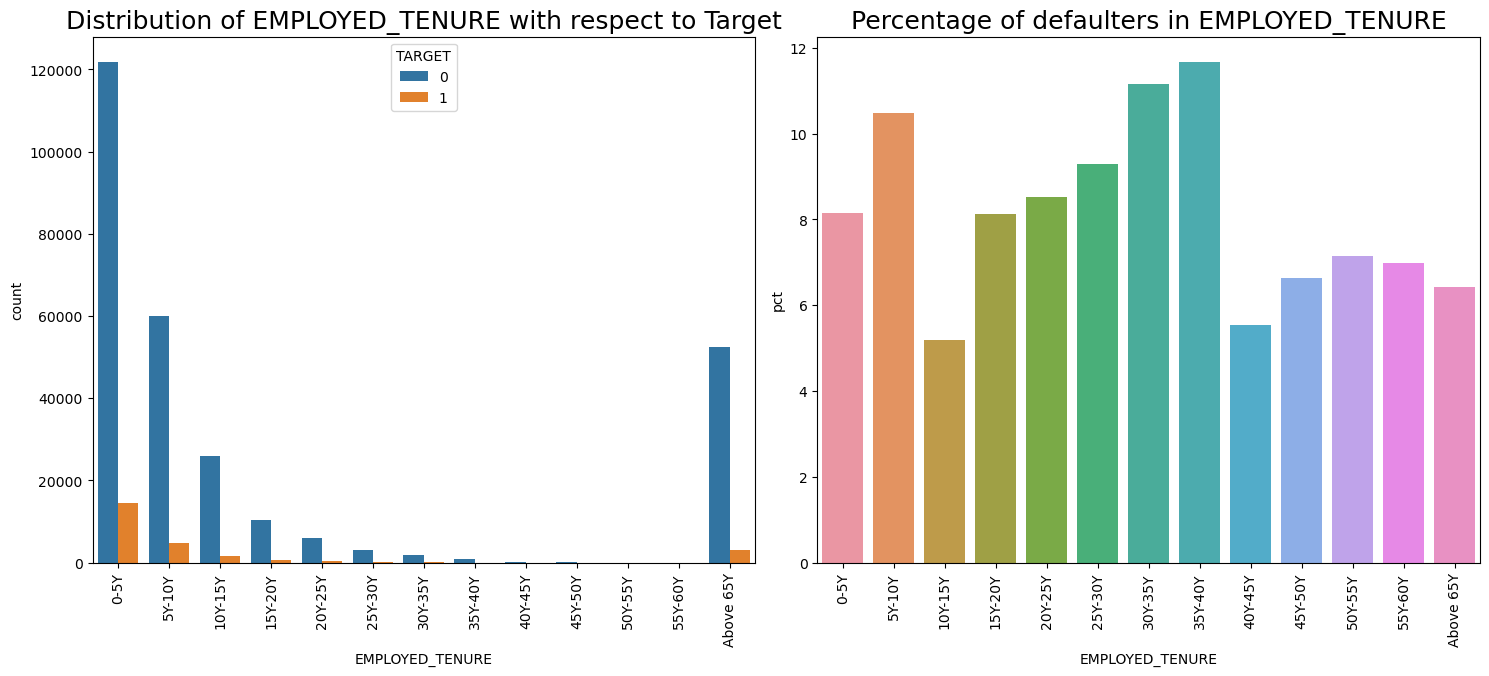

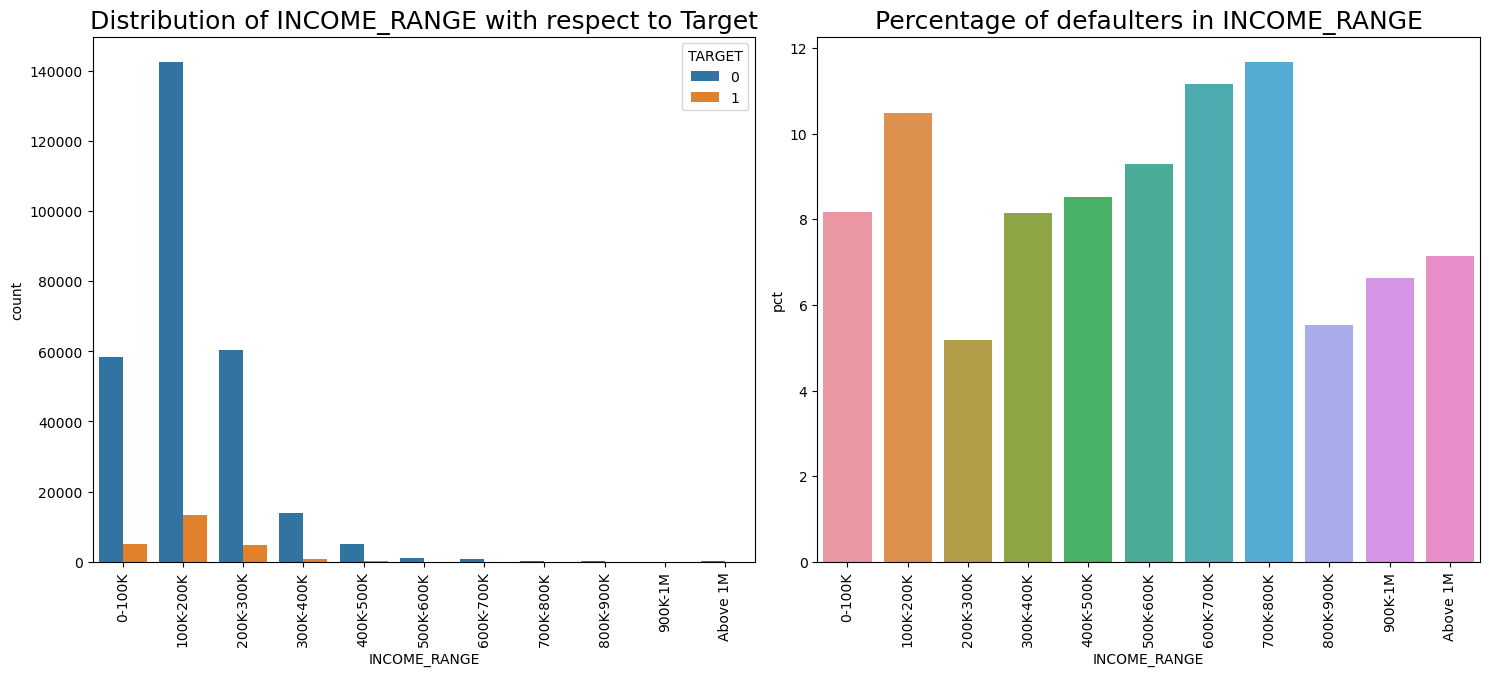

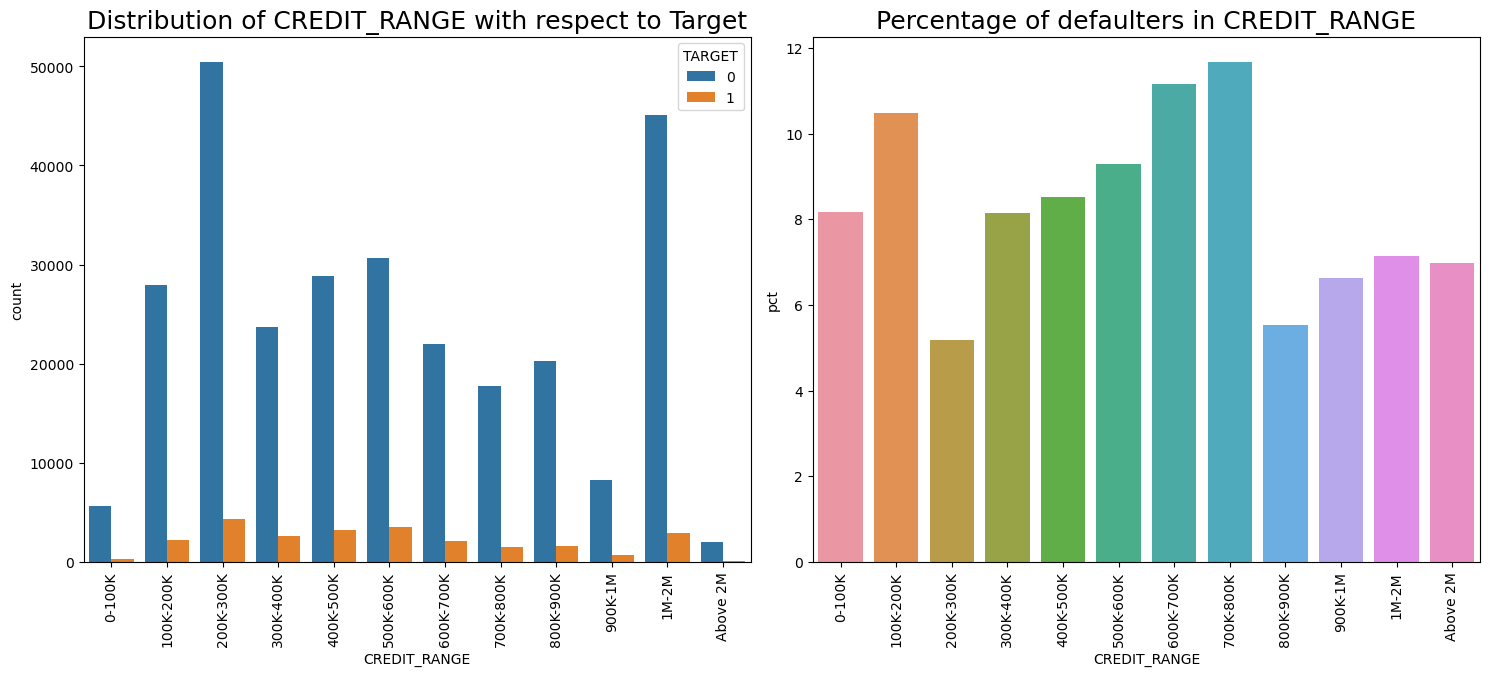

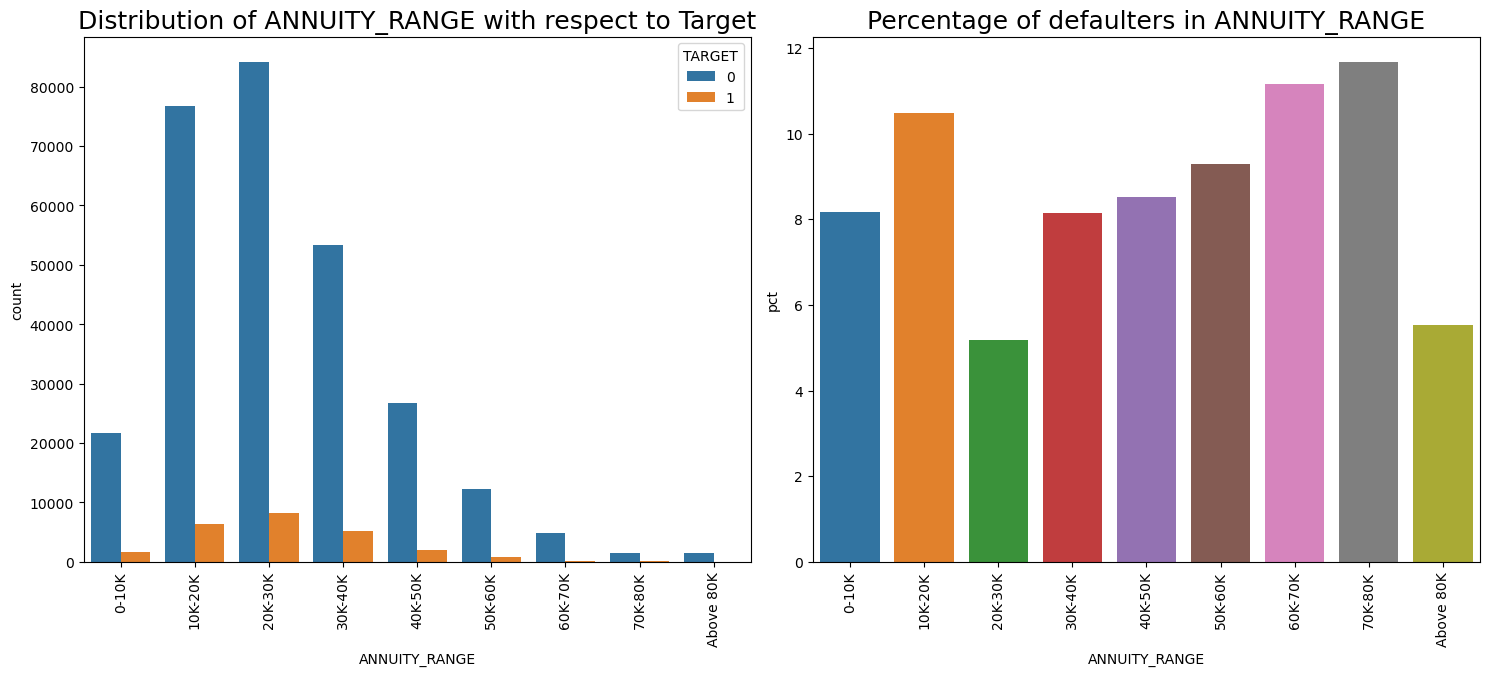

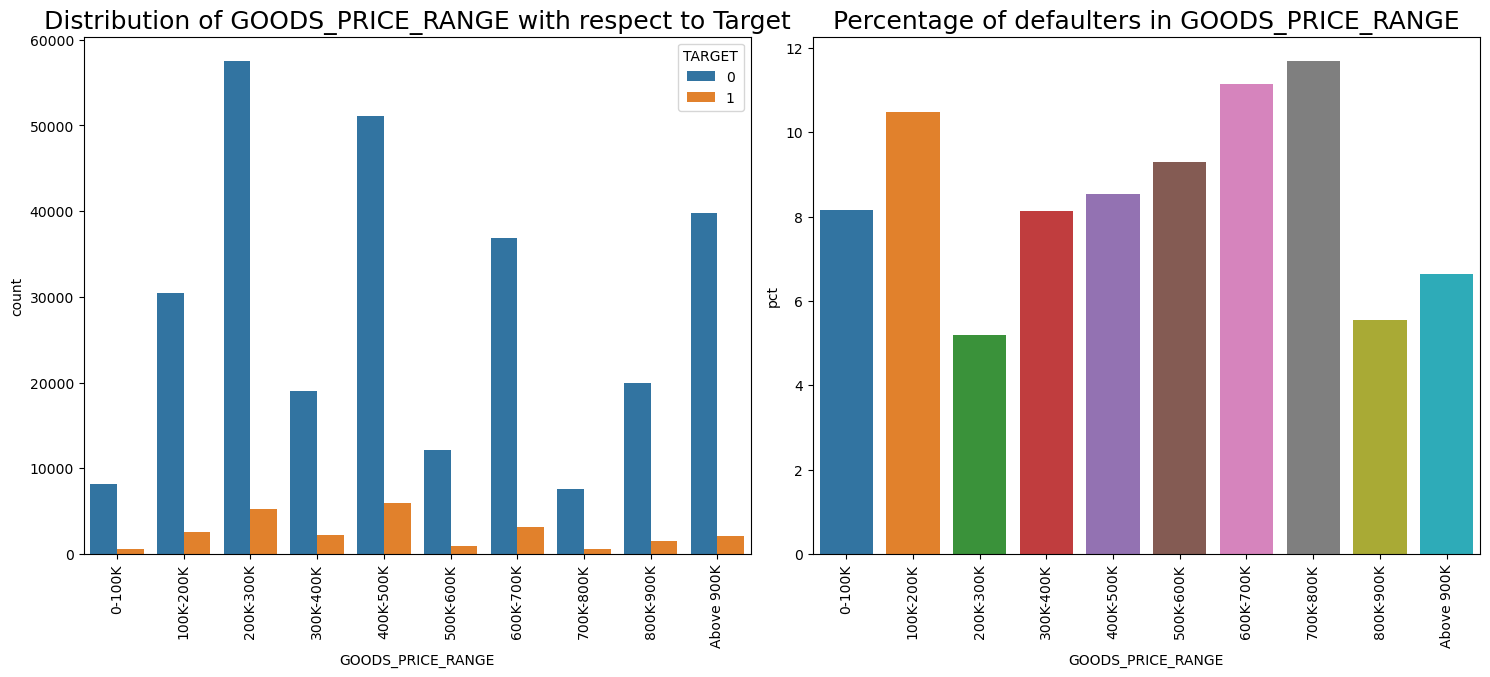

In [126]:
for i, j in enumerate(Binned_columns):
    plt.figure(figsize=(15,70))

    df1 = app_data[[j,'TARGET']].groupby([j], as_index=False).mean().sort_values(by='TARGET',ascending=False)
    df1['pct'] = df['TARGET']*100
    
    plt.style.use('default')
    plt.subplot(11,2,i+i+1)
    plt.subplots_adjust()
    sns.countplot(data=app_data,x=j,hue='TARGET')
    plt.xticks(rotation=90)
    plt.subplots_adjust(wspace= 1, hspace= 0.8)
    plt.title(f'Distribution of {j} with respect to Target', fontsize=18)
    
    plt.style.use('default')
    plt.subplot(11,2,i+i+2)
    sns.barplot(data=df1,x=j,y='pct')
    plt.xticks(rotation=90)
    plt.subplots_adjust(wspace= 1, hspace= 0.8)
    plt.title(f'Percentage of defaulters in {j}', fontsize=18)
    
    plt.tight_layout()
    plt.show()   

# Notes


1. Age Group- Most of the clients who applied for loans are between 30Y-40Y and they also have default value between approx 5%.
20Y-30Y client have the highest defaulter percentage i.e 10.3% which is very high




2. Employed Tenured- Clients employed tenureship between 0-5Y have applied most of the loans and their defauler percentage is approx 8%.
Clients tenureship between 5Y-10Y has applications half of the clients with tenureship between which has default values approx 10.2%.
Clients with employement tenureship between 10Y-15Y has the least defaulter percentage (approx 5%) but there applications are approx 25k.




3. INCOME_RANGE- Client having income between 200K-300K has the least defaulter percentage which is approx 5%.
Client income range between 100K-200K has the highest applicants i.e around 140K and there default percentage is around 10.2%.
Client with income between 700K-800K has the highest defaulter percentage.


# Bivariate Analysis with respect to Target Variable (Segmented)

# Numerical data

In [127]:
Numerical_var=['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','YEARS_BIRTH', 'YEARS_EMPLOYED', 'CNT_FAM_MEMBERS','TARGET']

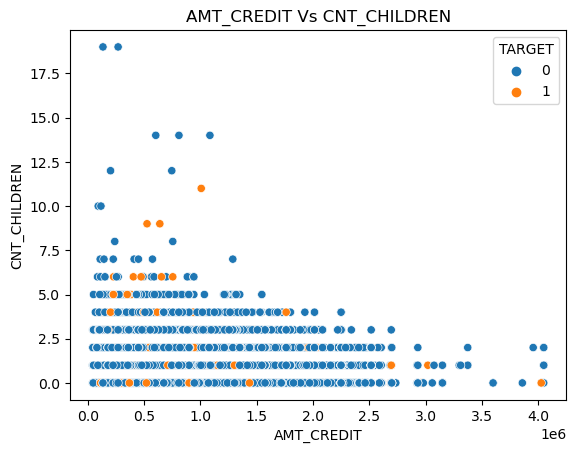

In [128]:
# AMT_CREDIT and CNT_CHILDREN

# Making the scatterplot for these two columns to understand the correlation.

sns.scatterplot(data= app_data, x='AMT_CREDIT',y='CNT_CHILDREN',hue='TARGET')
plt.title("AMT_CREDIT Vs CNT_CHILDREN")
plt.show()

1. Clients with 0 childrens and if they are taking a loan of 1.5 Million can be more defaulters.

2. Clients with childrens between 1 to 4 are likely to be less defaulter.

3. Clients with 0 childrens requesting for loan more than 1.5 Million are safe.

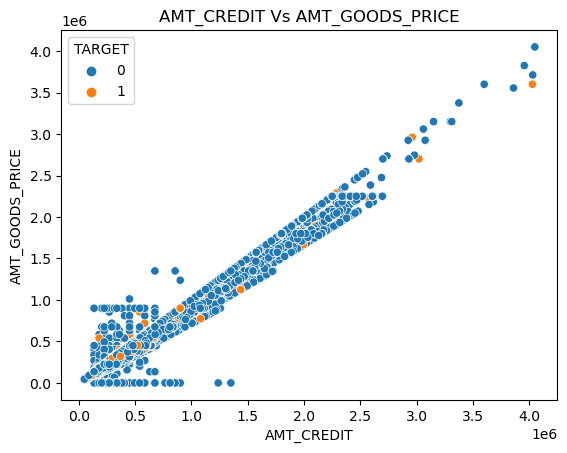

In [129]:
# AMT_CREDIT and AMT_GOODS_PRICE

# Making the scatterplot for these two columns to understand the correlation.

sns.scatterplot(data= app_data, x='AMT_CREDIT',y='AMT_GOODS_PRICE',hue='TARGET')
plt.title("AMT_CREDIT Vs AMT_GOODS_PRICE")
plt.show()

1. AMT_GOODS_PRICE and AMT_CREDIT are lineraly corelated.

2. Most of the clients who defaulted has AMT_CREDIT less than 1 Million. 

3. If the AMT_CREDIT is increasing the defaulters are decreasing.

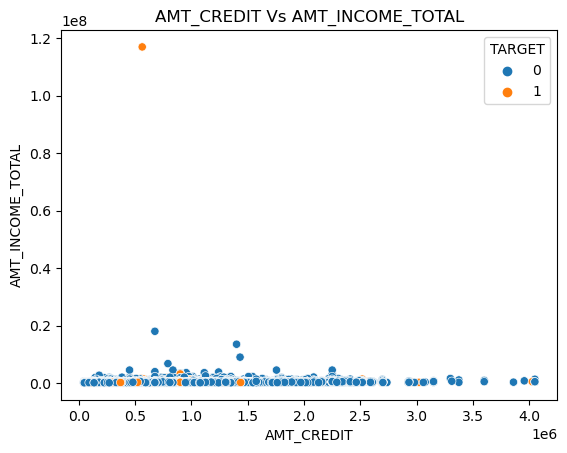

In [130]:
# AMT_CREDIT and AMT_INCOME_TOTAL

# Making the scatterplot for these two columns to understand the correlation.

sns.scatterplot(data= app_data, x='AMT_CREDIT',y='AMT_INCOME_TOTAL',hue='TARGET')
plt.title("AMT_CREDIT Vs AMT_INCOME_TOTAL")
plt.show()

Clients having income about 1 Million are mostly taking the loan.

Clients earning less than a Million and requesting for a loan less than 1.5 can be defaulters.

We can target the people having income about 1 Million and who are taking loan more than 1.5 Million.


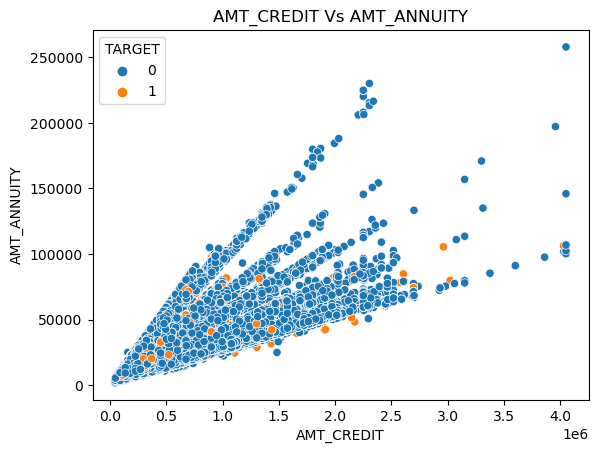

In [131]:
# AMT_CREDIT and AMT_ANNUITY

# Making the scatterplot for these two columns with respect to traget columns to understand the correlation.

sns.scatterplot(data= app_data, x='AMT_CREDIT',y='AMT_ANNUITY',hue='TARGET')
plt.title("AMT_CREDIT Vs AMT_ANNUITY")
plt.show()

1. Clients with Amount credit less than or equal to 1.5 Million and can pay annuity 100K have taken most of the loan.

2. Amount annuity is directly related to amount credit.

3. Most of the defaulter are also in the range where clients requested for loan around 1.5 Million and can pay Annuity 100K.

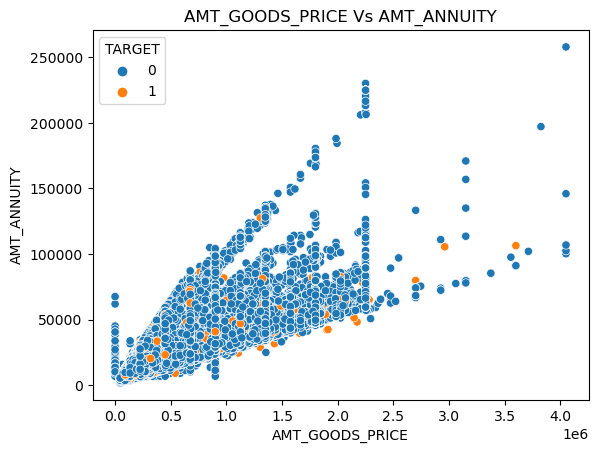

In [132]:
#AMT_GOODS_PRICE vs AMT_ANNUITY

#Making the scatterplot for these two columns with respect to Target column to understand the corelation.

sns.scatterplot(data= app_data,x= 'AMT_GOODS_PRICE',y= 'AMT_ANNUITY',hue= 'TARGET')
plt.title('AMT_GOODS_PRICE Vs AMT_ANNUITY')
plt.show()

1. Clients whose goods price is 2.2 Million and 90K Annuity has taken most of the loans.

2. Most of the defaulters are also in the range where client goods price is less than 2.2 Million and can pay 90K Annuity.

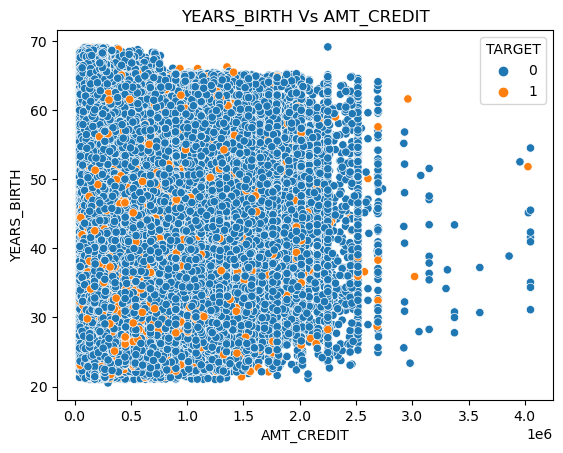

In [133]:
#YEARS_BIRTH Vs AMT_CREDIT

#Making the scatterplot for these two columns with respect to Traget.

sns.scatterplot(data= app_data,x= 'AMT_CREDIT',y='YEARS_BIRTH',hue= 'TARGET')
plt.title('YEARS_BIRTH Vs AMT_CREDIT')
plt.show()

1. Most of the clients who applied for loan has age between 20Y-66Y and requested loan amount less than 2.5 Million.

2. Clients age between 20Y-50Y with amount credit 1.5 Million has most of the defaulters.

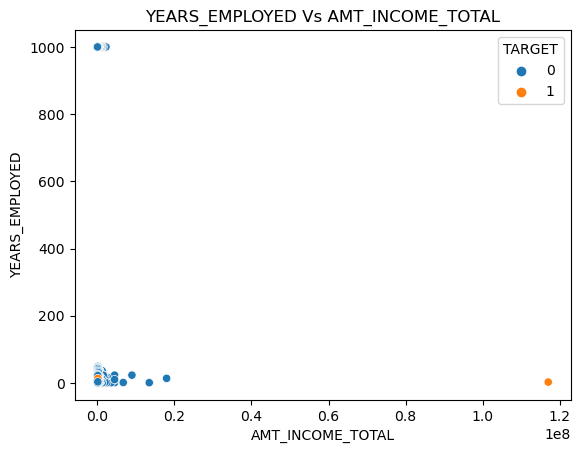

In [134]:
#YEARS_EMPLOYED VS AMT_INCOME_TOTAL

#Making the scatterplot for these two columns with respect to TARGET.

sns.scatterplot(data=app_data,x= 'AMT_INCOME_TOTAL',y= 'YEARS_EMPLOYED', hue= 'TARGET')
plt.title('YEARS_EMPLOYED Vs AMT_INCOME_TOTAL')
plt.show()


1. Most of the clients who applied for loan has working experience of 0-60Y and has a income between 0-2 Million.

# Numerical VS Categorical data

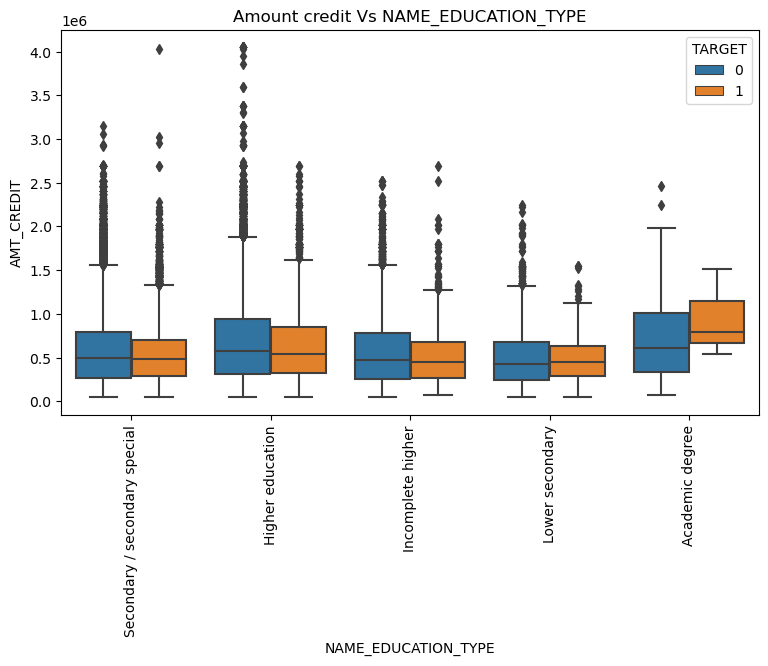

In [135]:
#AMT_CREDIT VS NAME_EDUCATION_TYPE

plt.figure(figsize= (9,5))
sns.boxplot(data= app_data,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE',hue= 'TARGET')
plt.title('Amount credit Vs NAME_EDUCATION_TYPE')
plt.xticks(rotation=90)
plt.show()

1. With the above graph we can observe that the range of clients with payment difficulties of Academic degree is higher than the customer of non payment difficulty.

2. The rest of the Education types are almost same for both the cases .

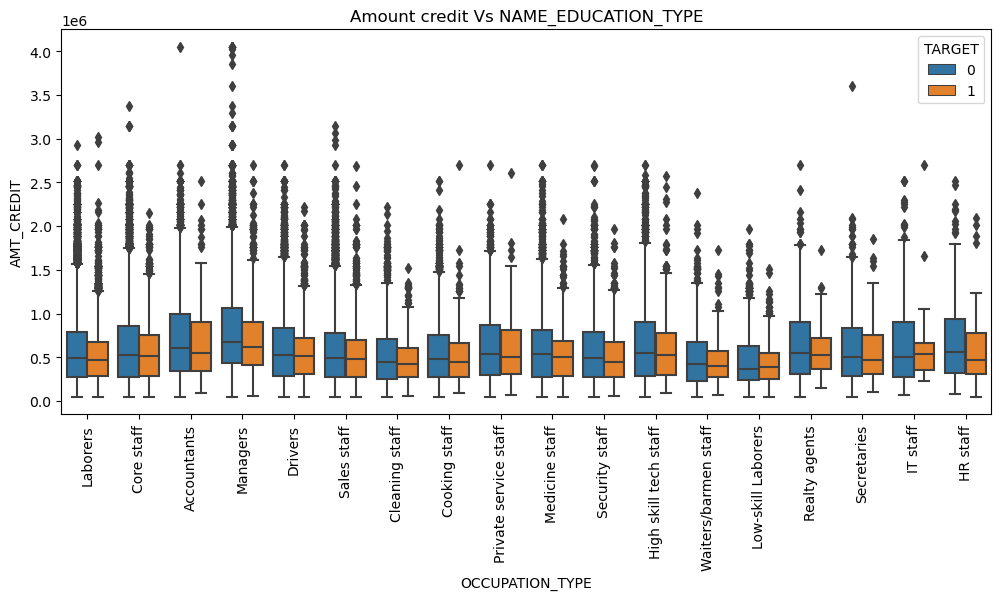

In [136]:
#Amount request for loan vs Different Education Type

plt.figure(figsize= (12,5))
sns.boxplot(data= app_data,y='AMT_CREDIT',x='OCCUPATION_TYPE',hue= 'TARGET')
plt.title('Amount credit Vs NAME_EDUCATION_TYPE')
plt.xticks(rotation=90)
plt.show()

1. Managers who did not defaulted have received the highest amount of credit.

2. The 50 percentile of the labourers who defaulted and not defaulted are same.


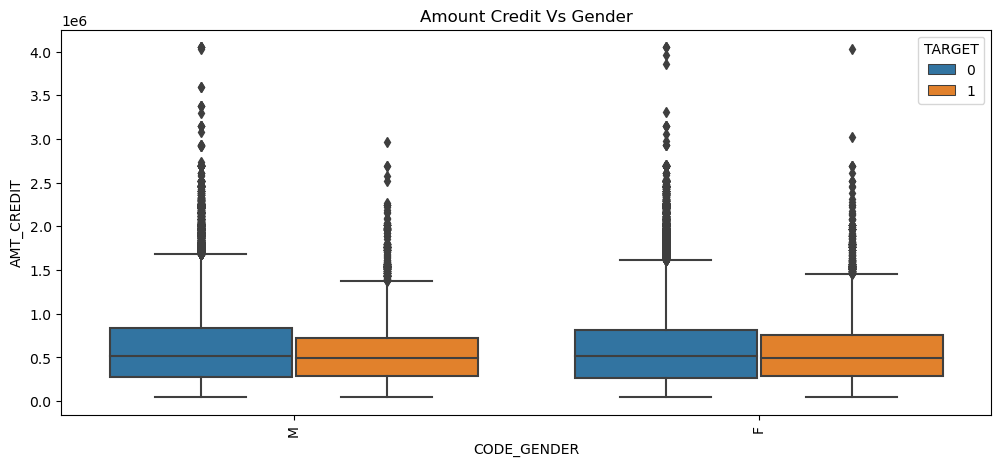

In [137]:
#Amount Requested for loan VS Gender.

plt.figure(figsize= (12,5))
sns.boxplot(data= app_data,x='CODE_GENDER',y='AMT_CREDIT',hue= 'TARGET')
plt.title('Amount Credit Vs Gender')
plt.xticks(rotation=90)
plt.show()

1. Most of the Males and Females who did not fault requested for a loan amount between approx 300K-800K.

2. Females who defaulted has more outliers.


# Finding Correlation

In [138]:
#Mkaing a list of the numberical varaiables so that we can perform Correlation.


Num_col= ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','YEARS_BIRTH', 'YEARS_EMPLOYED', 'CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON']


In [139]:
#Dividing the data set into two for Target 0 and Target 1

Target_0= app_data[app_data['TARGET']==0]   #Non-Defaulter
Target_1= app_data[app_data['TARGET']==1]   #Defaulters

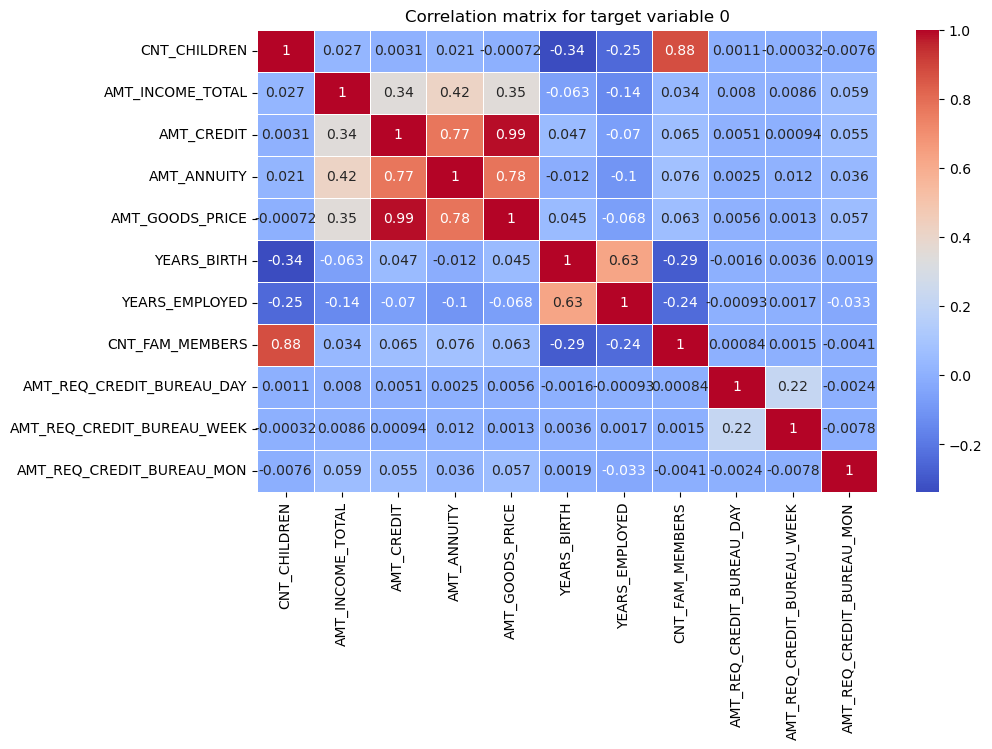

In [140]:
#Correlation matrix for target varaibale 0 

plt.figure(figsize=(10,6))
sns.heatmap(Target_0[Num_col].corr(),annot= True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation matrix for target variable 0')
plt.show()

In [141]:
#Top 10 Correlations.
Correlation_0= Target_0[Num_col].corr().abs()
corr_df0= Correlation_0.where(np.triu(np.ones(Correlation_0.shape),k=1).astype(bool)).unstack().reset_index()
corr_df0.columns=['Var1','Var2','Corr']
corr_df0.dropna(subset=['Corr'], inplace= True)
corr_df0= corr_df0.sort_values(by= ['Corr'],ascending= False)
corr_df0.head(10)



Var1              Var2      Corr
46  AMT_GOODS_PRICE        AMT_CREDIT  0.986966
77  CNT_FAM_MEMBERS      CNT_CHILDREN  0.878571
47  AMT_GOODS_PRICE       AMT_ANNUITY  0.776675
35      AMT_ANNUITY        AMT_CREDIT  0.771298
71   YEARS_EMPLOYED       YEARS_BIRTH  0.626114
34      AMT_ANNUITY  AMT_INCOME_TOTAL  0.418948
45  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  0.349472
23       AMT_CREDIT  AMT_INCOME_TOTAL  0.342799
55      YEARS_BIRTH      CNT_CHILDREN  0.336972
82  CNT_FAM_MEMBERS       YEARS_BIRTH  0.285826

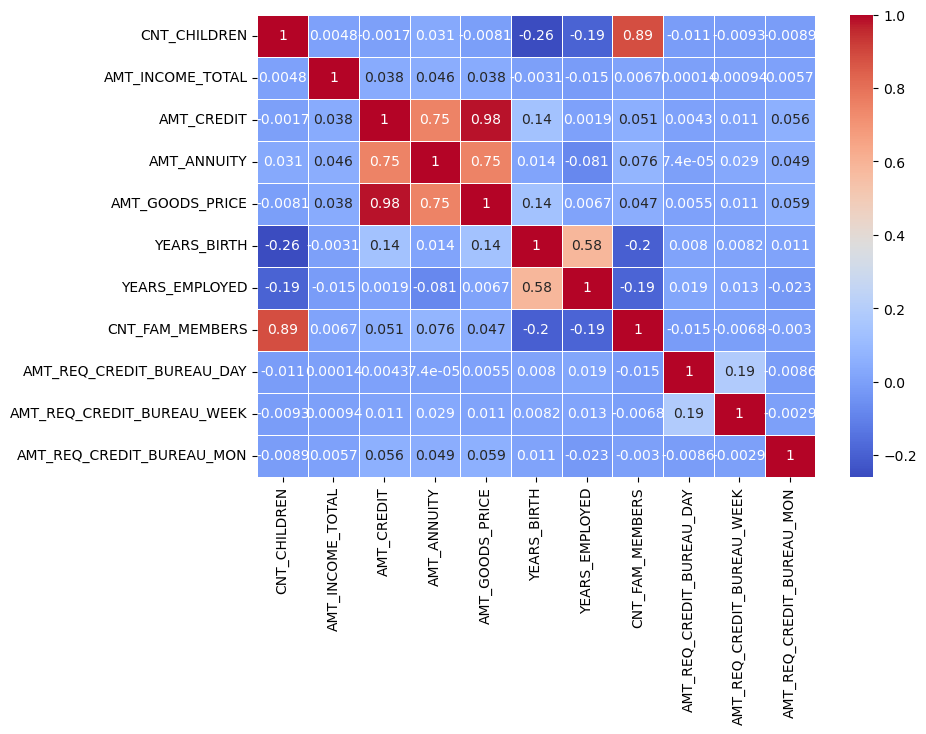

In [142]:
#Correlation matrix for target variable 1.

plt.figure(figsize=(9,6))
sns.heatmap(Target_1[Num_col].corr(),annot= True,cmap='coolwarm',linewidth=0.5)
plt.show('Correlation matrix for target variable 1')

In [143]:
#Top 10 Correlations.
Correlation_1= Target_1[Num_col].corr().abs()
corr_df1=Correlation_1.where(np.triu(np.ones(Correlation_0.shape),k=1).astype(bool)).unstack().reset_index()
corr_df1.columns=['Var1','Var2','Corr']
corr_df1.dropna(subset=['Corr'],inplace= True)
corr_df1=corr_df1.sort_values(by=['Corr'],ascending=False)
corr_df1.head(10)

Var1                       Var2      Corr
46              AMT_GOODS_PRICE                 AMT_CREDIT  0.982854
77              CNT_FAM_MEMBERS               CNT_CHILDREN  0.885484
47              AMT_GOODS_PRICE                AMT_ANNUITY  0.752891
35                  AMT_ANNUITY                 AMT_CREDIT  0.752195
71               YEARS_EMPLOYED                YEARS_BIRTH  0.582185
55                  YEARS_BIRTH               CNT_CHILDREN  0.259109
82              CNT_FAM_MEMBERS                YEARS_BIRTH  0.203267
66               YEARS_EMPLOYED               CNT_CHILDREN  0.192864
83              CNT_FAM_MEMBERS             YEARS_EMPLOYED  0.186515
107  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_DAY  0.185767

# Previous Application

In [144]:
#Loading and reading the previous data.

prev_data= pd.read_csv('previous_application.csv')

In [145]:
#Checking the head of the data.
prev_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

# Checking the structure of the data

In [146]:
#Checking the number of columns and rows of the dataframe.
prev_data.shape

(1670214, 37)

In [147]:
#Checking the stastical data like percentile, mean and std of the numerical values of the DataFrame. 

prev_data.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [148]:
#Checking the information of the dataframe to review the data type.
prev_data.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [149]:
#As we can see there are many XAP AND XNA values in many columns. Might be clients have not filled these values and the system marked these as XAP AND XNA.

prev_data.replace('XNA',np.nan,inplace= True)
prev_data.replace('XAP',np.nan,inplace= True)


In [150]:
#Checking the null values in the previous application data set.

((prev_data.isnull().sum()/len(prev_data))*100).sort_values(ascending= False)

RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE         95.830774
CODE_REJECT_REASON             81.327123
NAME_PRODUCT_TYPE              63.684414
NAME_GOODS_CATEGORY            56.927376
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_SELLER_INDUSTRY           51.234153
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
NAME_PAYMENT_TYPE              37.563091
NAME_YIELD_GROUP               30.966990
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
NAME_PORTFOLIO                 22.286366
NAME_CLIENT_TYPE                0.116213
NAME_CONTRACT_TYPE              0.020716
PRODUCT_COMBINAT

In [151]:
#Most of the columns have null values more than 30%. Therefore, filling these missing values will not be the best idea.

#We will remove these columns.

In [152]:
null_percentage = (prev_data.isnull().sum()/len(prev_data))*100

#Getting all the columns which having more than 30% null values.

drop_col= null_percentage[null_percentage>=30].index

In [153]:
#Dropping the columns.

prev_data= prev_data.drop(columns=drop_col)

In [154]:
#Checking the shape again to confirm if columns have been dropped.
prev_data.shape

(1670214, 19)

In [155]:
#Checking the percentage of null values again.
((prev_data.isnull().sum()/len(prev_data))*100).sort_values(ascending= False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
NAME_PORTFOLIO                 22.286366
NAME_CLIENT_TYPE                0.116213
PRODUCT_COMBINATION             0.020716
NAME_CONTRACT_TYPE              0.020716
AMT_CREDIT                      0.000060
DAYS_DECISION                   0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
SK_ID_PREV                      0.000000
NAME_CONTRACT_STATUS            0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
SK_ID_CURR                      0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
dtype: float64

# Treatement of Null Values.


In [156]:
#We will check each column one by one and treat them.

In [157]:
#Checking for 'AMT_GOODS_PRICE'.

#It is the price of the goods on which the client asked for the loan.

#Lets check the mean,median,max of this.

prev_data['AMT_GOODS_PRICE'].agg(func=['mean','median'])

mean      227847.279283
median    112320.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [158]:
#If we will see the 'mean' and 'median' there is a difference between them which shows that this has outliers.
#So it is always best to go with median in numerical data if it has outliers.

median= prev_data['AMT_GOODS_PRICE'].median()



#Imputing the missing values with median.

prev_data['AMT_GOODS_PRICE'].fillna(median,inplace= True)

In [159]:
#Checking the null values again to confirm.

prev_data['AMT_GOODS_PRICE'].isnull().sum()

0

In [160]:
#checking for 'AMT_ANNUITY'.

#Annuity is the amount which the client has to pay in installment to the bank for a loan.

#Checking the mean,median and max for this.

prev_data['AMT_ANNUITY'].agg(func=['mean','median','max'])

mean       15955.120659
median     11250.000000
max       418058.145000
Name: AMT_ANNUITY, dtype: float64

In [161]:
#Looking at the above we can see that this also has outliers because 50% of the clients has annuity of 11250.0 however the mean is  15955.12.
#Maximum value is also very high. So it is best to fill the null values with median.

med= prev_data['AMT_ANNUITY'].median()

#Imputing the missing values with median.

prev_data['AMT_ANNUITY'].fillna(med,inplace= True)

In [162]:
#Checking the null values again to confirm.
prev_data['AMT_ANNUITY'].isnull().sum()

0

In [163]:
#Checking for 'CNT_PAYMENT'.

#'CNT_PAYMENT' means for how many months the loan was given.

#Lets check the mean,median and maximum.

prev_data['CNT_PAYMENT'].agg(func= ['mean','median','max'])



mean      16.054082
median    12.000000
max       84.000000
Name: CNT_PAYMENT, dtype: float64

In [164]:
#We are going to fill it with median.

median0= prev_data['CNT_PAYMENT'].median()

#Filling it with median value

prev_data['CNT_PAYMENT'].fillna(median,inplace= True)


In [165]:
#Checking the null values again to confirm.

prev_data['CNT_PAYMENT'].isnull().sum()

0

In [166]:
#cHECKING FOR 'PRODUCT_COMBINATION'.

#First checking the values in this column.
prev_data['PRODUCT_COMBINATION'].value_counts()


PRODUCT_COMBINATION
Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: count, dtype: int64

In [167]:
#This is the categorical column so we cannot fill it with median. mean etc. Therefore, we will fill it with mode.


#Finding the mode.

mode= prev_data['PRODUCT_COMBINATION'].mode()[0]
mode

'Cash'

In [168]:
#filling the NaN values with mode.

prev_data['PRODUCT_COMBINATION'].fillna(mode,inplace= True)

In [169]:
#Checking the null values gain to confirm.
prev_data['PRODUCT_COMBINATION'].isnull().sum()

0

In [170]:
#Checking 'AMT_CREDIT'.

prev_data['AMT_CREDIT'].isnull().sum()

1

In [171]:
#As it has only one missing value so we are not going to treat it. We will leave it as it is.

In [172]:
#Checking for 'NAME_PORTFOLIO'.

#We can see that there are 372230 values which are very high. Therefore, if we fill these missing values with mode then the result may be biased.

#We will leave them as it is.

prev_data['NAME_PORTFOLIO'].value_counts(dropna= False)

NAME_PORTFOLIO
POS      691011
Cash     461563
NaN      372230
Cards    144985
Cars        425
Name: count, dtype: int64

In [173]:
#Checking for 'NAME_CONTRACT_TYPE'

prev_data['NAME_CONTRACT_TYPE'].value_counts(dropna= False)



NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
NaN                   346
Name: count, dtype: int64

In [174]:
#As these values are very less we can remove it.

prev_data= prev_data[prev_data['NAME_CONTRACT_TYPE'].notna()]



In [175]:
#Checking 'NAME_CLIENT_TYPE'

prev_data['NAME_CLIENT_TYPE'].value_counts(dropna= False)

NAME_CLIENT_TYPE
Repeater     1230960
New           301342
Refreshed     135625
NaN             1941
Name: count, dtype: int64

In [176]:
#There are only 1941 missing values in this so we are going to delete it as imputing the values with mode can make it biased.
prev_data= prev_data[prev_data['NAME_CLIENT_TYPE'].notna()]

In [177]:
(prev_data.isnull().sum()/len(prev_data))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_CLIENT_TYPE                0.000000
NAME_PORTFOLIO                 22.233827
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
CNT_PAYMENT                     0.000000
PRODUCT_COMBINATION             0.000000
dtype: float64

# Removing few more columns which are of no use in the Analysis

In [178]:
#Columns

#WEEKDAY_APPR_PROCESS_START 
#HOUR_APPR_PROCESS_START      
#FLAG_LAST_APPL_PER_CONTRACT   
#NFLAG_LAST_APPL_IN_DAY

Remove_col= ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
   
prev_data.drop(Remove_col,inplace= True,axis=1)

In [179]:
prev_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_CLIENT_TYPE',
       'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [180]:
prev_data.shape

(1667927, 15)

In [181]:
prev_data.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans    11250.000              0.0   
7     1656711      296299         Cash loans    11250.000              0.0   
8     2367563      342292         Cash loans    11250.000              0.0   
9     2579447      334349         Cash loans    11250.000              0.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CONTRACT_STATUS  DAYS_DECISION  \
0     17145.0          17145.0             Approved            -73   
1    679671.0         607500.0             Approved           -164   
2    136444.5         112500.0             Approved           -301   
3    470790.0         450000.0             Approved           -512   
4    404055.0         337500.0              Refused           -781   
5    340573.5         315000.0             Approved           -684   
6         0.0         112320.0             Canceled            -14   
7         0.0         112320.0             Canceled            -21   
8         0.0         112320.0             Canceled           -386   
9         0.0         112320.0             Canceled            -57   

  NAME_CLIENT_TYPE NAME_PORTFOLIO             CHANNEL_TYPE  SELLERPLACE_AREA  \
0         Repeater            POS             Country-wide                35   
1         Repeater           Cash           Contact center                -1   
2         Repeater           Cash  Credit and cash offices                -1   
3         Repeater           Cash  Credit and cash offices                -1   
4         Repeater           Cash  Credit and cash offices                -1   
5         Repeater           Cash  Credit and cash offices                -1   
6         Repeater            NaN  Credit and cash offices                -1   
7         Repeater            NaN  Credit and cash offices                -1   
8         Repeater            NaN  Credit and cash offices                -1   
9         Repeater            NaN  Credit and cash offices                -1   

   CNT_PAYMENT       PRODUCT_COMBINATION  
0         12.0  POS mobile with interest  
1         36.0          Cash X-Sell: low  
2         12.0         Cash X-Sell: high  
3         12.0       Cash X-Sell: middle  
4         24.0         Cash Street: high  
5         18.0          Cash X-Sell: low  
6     112320.0                      Cash  
7     112320.0                      Cash  
8     112320.0                      Cash  
9     112320.0                      Cash

# Standardizing Values in the dataframe

In [182]:
#In few colums there are negative values. Looking at the values it seems like it wrong so, we will change it to positive values.

#Colums in which we are changing.

#DAYS_DECISION
#SELLERPLACE_AREA

prev_data['DAYS_DECISION']= prev_data['DAYS_DECISION'].abs()
prev_data['SELLERPLACE_AREA']= prev_data['SELLERPLACE_AREA'].abs()


In [183]:
#We will also change column name 'DAYS_DECISION' to MONTH_DECISION for good readability.


prev_data['MONTH_DECISION']= prev_data['DAYS_DECISION']//30

In [184]:
#Now we will remove the column 'DAYS_DECISION' as we have already changed it to 'MONTH_DECISION'

In [185]:
prev_data=prev_data.drop('DAYS_DECISION',axis=1)

In [186]:
prev_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CONTRACT_STATUS NAME_CLIENT_TYPE  \
0     17145.0          17145.0             Approved         Repeater   
1    679671.0         607500.0             Approved         Repeater   
2    136444.5         112500.0             Approved         Repeater   
3    470790.0         450000.0             Approved         Repeater   
4    404055.0         337500.0              Refused         Repeater   

  NAME_PORTFOLIO             CHANNEL_TYPE  SELLERPLACE_AREA  CNT_PAYMENT  \
0            POS             Country-wide                35         12.0   
1           Cash           Contact center                 1         36.0   
2           Cash  Credit and cash offices                 1         12.0   
3           Cash  Credit and cash offices                 1         12.0   
4           Cash  Credit and cash offices                 1         24.0   

        PRODUCT_COMBINATION  MONTH_DECISION  
0  POS mobile with interest               2  
1          Cash X-Sell: low               5  
2         Cash X-Sell: high              10  
3       Cash X-Sell: middle              17  
4         Cash Street: high              26

# Checking Outliers and treatment

In [187]:
#We will check the outliers in the columns.
Numerical_cols= ['AMT_ANNUITY', 'AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT','MONTH_DECISION','SELLERPLACE_AREA']


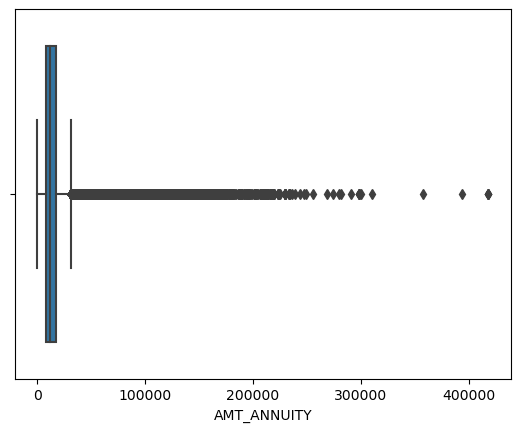

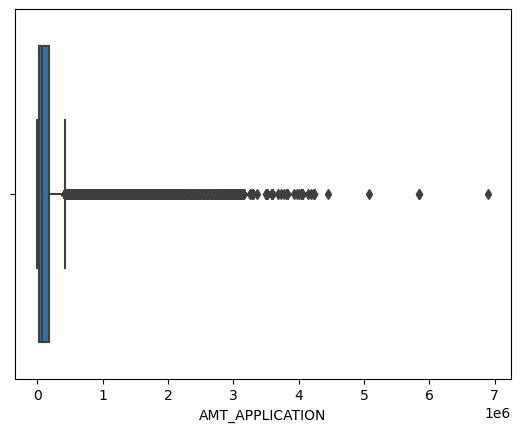

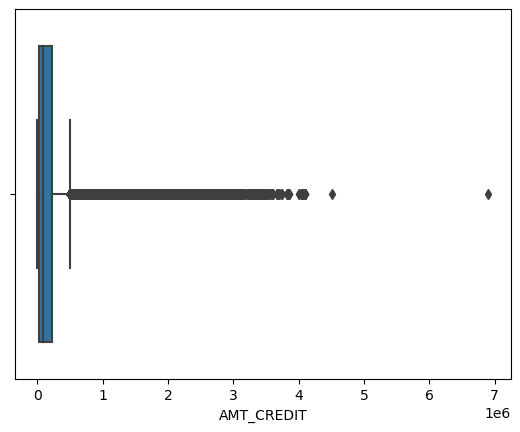

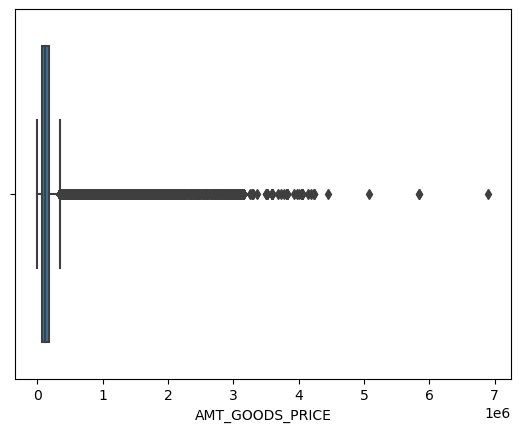

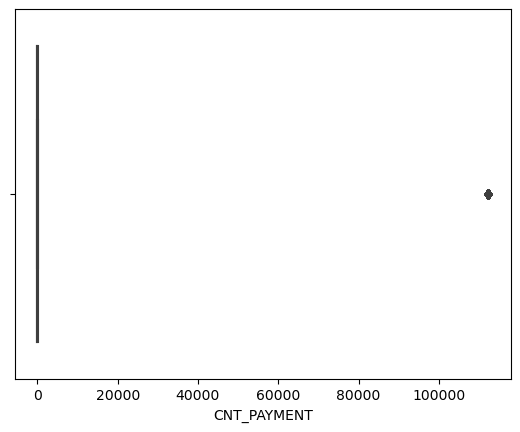

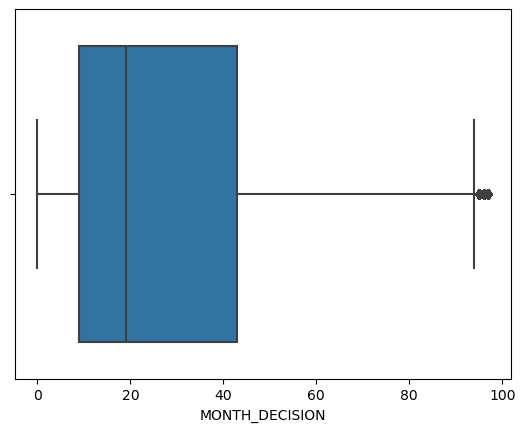

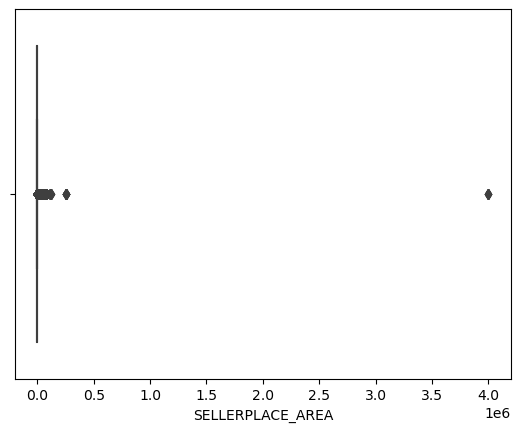

In [188]:
for i in Numerical_cols:
    sns.boxplot(x=prev_data[i])
    plt.show()

In [189]:
#As per the above box plot there are outliers in it. They may be possible values however, these are still outliers.

#We can treat them with method 'florring and capping' but not doing it as it is not required.

In [190]:
#Checking distribution of values in Categorical Nominal Columns.

#We will check it using countplot.

Category_columns= ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']



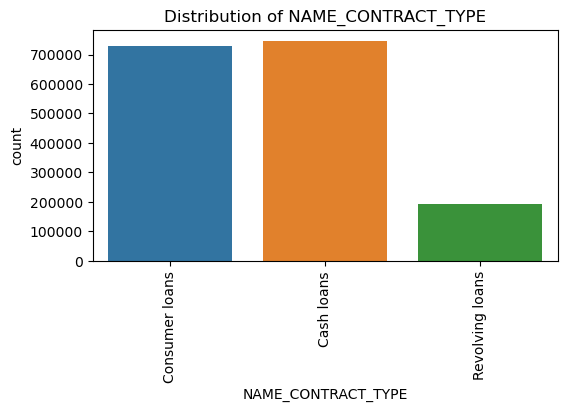

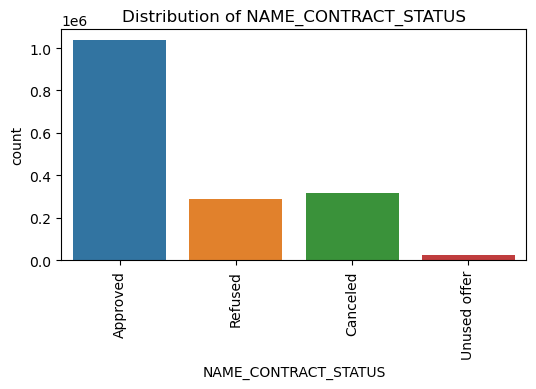

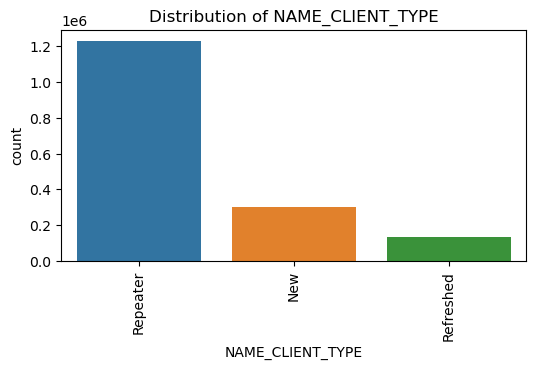

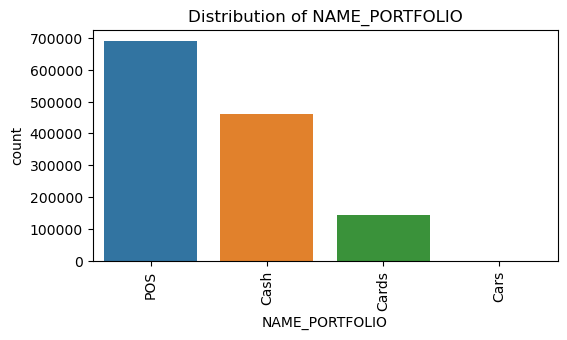

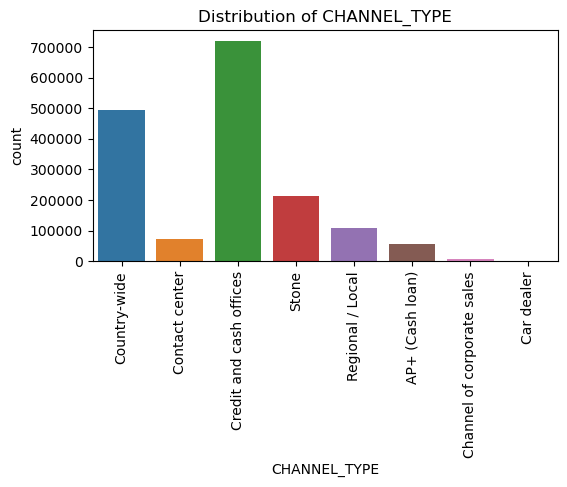

In [191]:
#Using for loop to check the distribution.


for j in Category_columns:
    plt.figure(figsize=(6,3))
    ax= sns.countplot(x= j, data= prev_data)
    plt.title(f'Distribution of {j}')
    plt.xticks(rotation=90)
    
    

# Notes


1. NAME_CONTRACT_TYPE - Consumer and cash loans are quite similar however, there are only few Revolving loans.

2. NAME_CONTRACT_STATUS - Refused and canceled loans are almost similar but unused offer are very less in numbers.

3. NAME_CLIENT_TYPE- There are few new clients who are applying loans and most of them are repeaters.

4. NAME_PORTFOLIO - There are very less applications for cards and negligible for cars.

5. CHANNEL_TYPE - Credit and cash offices is the channel which has most application, followed by Country wide and Stone.

# Merging the Dataset

In [192]:
#Merging the applicationn dataset and previous dataset with left Join. The reason for doing it because if we do it with inner join then we can miss out of the data of new applicatnts.

Merged_data = pd.merge(app_data,prev_data, on='SK_ID_CURR', how='left',suffixes=('_CURR','_PREV'))

In [193]:
Merged_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_CURR CODE_GENDER FLAG_OWN_CAR  \
0     100002       1              Cash loans           M            N   
1     100003       0              Cash loans           F            N   
2     100003       0              Cash loans           F            N   
3     100003       0              Cash loans           F            N   
4     100004       0         Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_CURR  \
0               Y             0          202500.0         406597.5   
1               N             0          270000.0        1293502.5   
2               N             0          270000.0        1293502.5   
3               N             0          270000.0        1293502.5   
4               Y             0           67500.0         135000.0   

   AMT_ANNUITY_CURR  AMT_GOODS_PRICE_CURR NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0           24700.5              351000.0   Unaccompanied          Working   
1           35698.5             1129500.0          Family    State servant   
2           35698.5             1129500.0          Family    State servant   
3           35698.5             1129500.0          Family    State servant   
4            6750.0              135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  YEARS_BIRTH  YEARS_EMPLOYED  \
0                    0.018801    25.920548        1.745205   
1                    0.003541    45.931507        3.254795   
2                    0.003541    45.931507        3.254795   
3                    0.003541    45.931507        3.254795   
4                    0.010032    52.180822        0.616438   

   YEARS_REGISTRATION  YEARS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            9.994521          5.808219        Laborers              1.0   
1            3.249315          0.797260      Core staff              2.0   
2            3.249315          0.797260      Core staff              2.0   
3            3.249315          0.797260      Core staff              2.0   
4           11.671233          6.934247        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                       11   
3                     MONDAY                       11   
4                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0             

In [194]:
#Checking columns and rows for the merged data.

Merged_data.shape

(1428322, 65)

In [195]:
#Checking the stastical values in the merged data set.

Merged_data.describe()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_CURR  \
count  1.428322e+06  1.428322e+06      1.428322e+06     1.428322e+06   
mean   8.620255e-02  4.038508e-01      1.736001e+05     5.893916e+05   
std    2.806630e-01  7.164843e-01      1.984244e+05     3.874543e+05   
min    0.000000e+00  0.000000e+00      2.565000e+04     4.500000e+04   
25%    0.000000e+00  0.000000e+00      1.125000e+05     2.700000e+05   
50%    0.000000e+00  0.000000e+00      1.575000e+05     5.084955e+05   
75%    0.000000e+00  1.000000e+00      2.115000e+05     8.086500e+05   
max    1.000000e+00  1.900000e+01      1.170000e+08     4.050000e+06   

       AMT_ANNUITY_CURR  AMT_GOODS_PRICE_CURR  REGION_POPULATION_RELATIVE  \
count      1.428322e+06          1.428322e+06                1.428322e+06   
mean       2.704336e+04          5.290392e+05                2.079053e-02   
std        1.404121e+04          3.560028e+05                1.339735e-02   
min        1.615500e+03          0.000000e+00                2.900000e-04   
25%        1.679850e+04          2.385000e+05                1.003200e-02   
50%        2.491650e+04          4.500000e+05                1.885000e-02   
75%        3.457350e+04          6.795000e+05                2.866300e-02   
max        2.580255e+05          4.050000e+06                7.250800e-02   

        YEARS_BIRTH  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
count  1.428322e+06    1.428322e+06        1.428322e+06      1.428322e+06   
mean   4.470021e+01    1.988003e+02        1.370288e+01      8.313972e+00   
std    1.190867e+01    3.924980e+02        9.730902e+00      4.129158e+00   
min    2.051781e+01    0.000000e+00        0.000000e+00      0.000000e+00   
25%    3.487945e+01    2.841096e+00        5.471233e+00      4.884932e+00   
50%    4.393973e+01    6.561644e+00        1.234521e+01      9.123288e+00   
75%    5.472877e+01    1.726575e+01        2.057260e+01      1.183288e+01   
max    6.912055e+01    1.000666e+03        6.759452e+01      1.971781e+01   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count     1.428322e+06          1.428322e+06                 1.428322e+06   
mean      2.149006e+00          2.058172e+00                 2.036170e+00   
std       9.001051e-01          4.963251e-01                 4.891402e-01   
min       1.000000e+00          1.000000e+00                 1.000000e+00   
25%       2.000000e+00          2.000000e+00                 2.000000e+00   
50%       2.000000e+00          2.000000e+00                 2.000000e+00   
75%       3.000000e+00          2.000000e+00                 2.000000e+00   
max       2.000000e+01          3.000000e+00                 3.000000e+00   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count             1.428322e+06                1.428322e+06   
mean              1.199386e+01                1.228434e-02   
std               3.233192e+00                1.101519e-01   
min               0.000000e+00                0.000000e+00   
25%               1.000000e+01                0.000000e+00   
50%               1.200000e+01                0.000000e+00   
75%               1.400000e+01                0.000000e+00   
max               2.300000e+01                1.000000e+00   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count                1.428322e+06                 1.428322e+06   
mean                 4.435484e-02                 3.626843e-02   
std                  2.058823e-01                 1.869574e-01   
min                  0.000000e+00                 0.000000e+00   
25%                  0.000000e+00                 0.000000e+00   
50%                  0.000000e+00                 0.000000e+00   
75%                  0.000000e+00                 0.000000e+00   
max                  1.000000e+00                 1.000000e+00   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
count            1.428322e+06            1.428322e+06   
mean          

# Univariate Analysis on Numerical continious variable

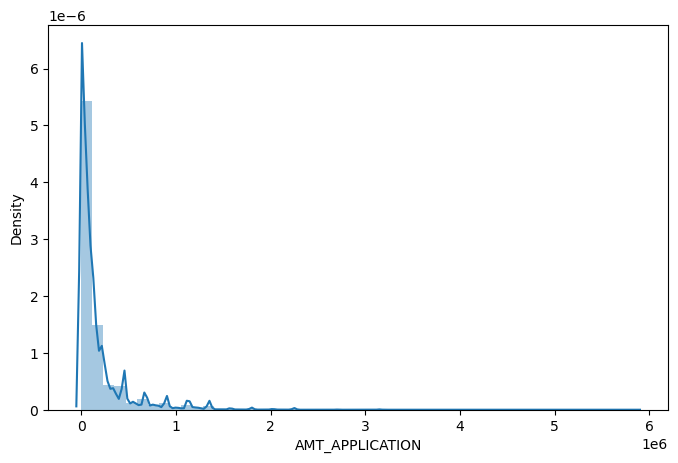

In [196]:
#Checking for 'AMT_APPLICATION'.

#It refers to the loan amount client requested for the previous application.

plt.figure(figsize=(8,5))
sns.distplot(Merged_data['AMT_APPLICATION'])
plt.show()

As we can see in the above data most of the clients request for loan less than approx 200K.

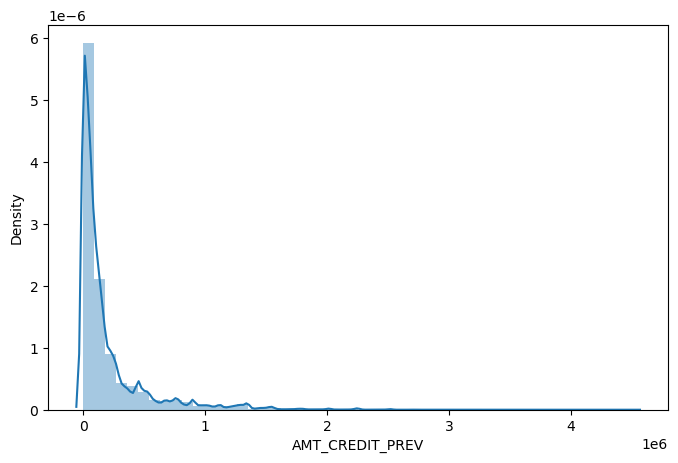

In [197]:
#Checking for 'AMT_CREDIT_PREV'.

#It referes to loan amount which was credited.

plt.figure(figsize=(8,5))
sns.distplot(Merged_data['AMT_CREDIT_PREV'])
plt.show()

Most of the loan Amount given to the clients was mostly in range 200K.

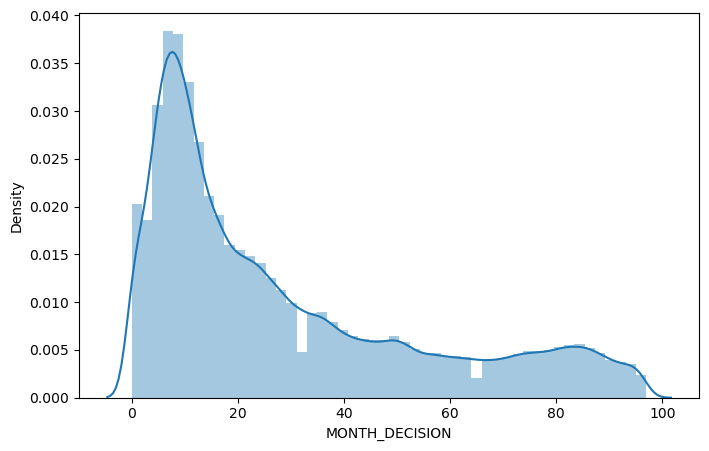

In [198]:
#Checking 'Month_Decision'.

#It referes to months took to make a decision on the previous application related to the current application.

plt.figure(figsize= (8,5))
sns.distplot(Merged_data['MONTH_DECISION'])
plt.show()

We can say that most of the applications decision took approx 25 months.

# Bivariate Analysis on Continious Variable W.R.T  to 'Name Contract Status'

Amount Requested and Amount credited

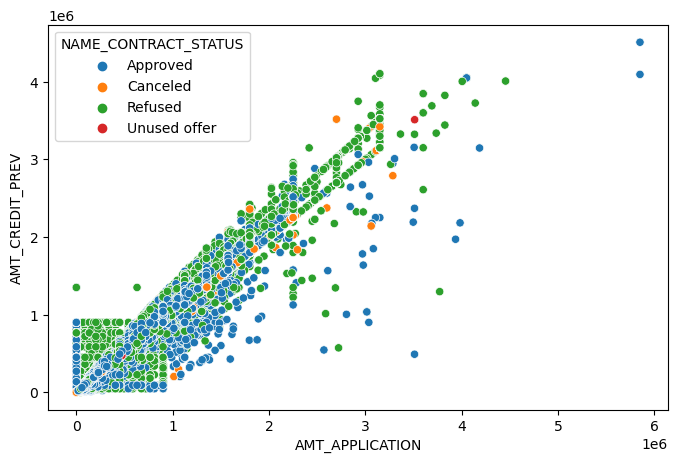

In [199]:
#'AMT_APPLICATION' vs 'AMT_CREDIT_PREV'

plt.figure(figsize=(8,5))
sns.scatterplot(x='AMT_APPLICATION',y='AMT_CREDIT_PREV',hue='NAME_CONTRACT_STATUS',data= Merged_data)
plt.show()

Looking at this graph we can say that most of the applicants lies between 0 to 1 Million for both amount requested and amount credited. As the application amount is increasing, credit amount is also increasing.

In [200]:
#AMT_APPLICATION Vs MONTH_DECISION.

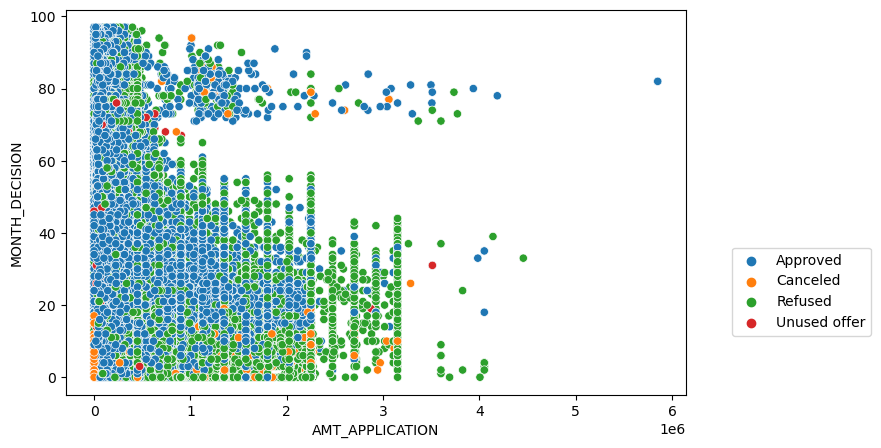

In [201]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'AMT_APPLICATION',y= 'MONTH_DECISION',data= Merged_data,hue= 'NAME_CONTRACT_STATUS')
plt.legend(bbox_to_anchor=(1.31,0.4))
plt.show()

As we can see that more the requested loan amount, lesser the months were taken before the current applications. The bank made quick decision for the higher requested amount. 

# Bivariate Analysis on Categorical Nominal Variable

We will check the amount credited on different categories

In [202]:
#Making a list of the columns on which we would like to do analysis.

Category_Nom= ['NAME_CONTRACT_TYPE_PREV','NAME_CLIENT_TYPE','CHANNEL_TYPE','NAME_PORTFOLIO']

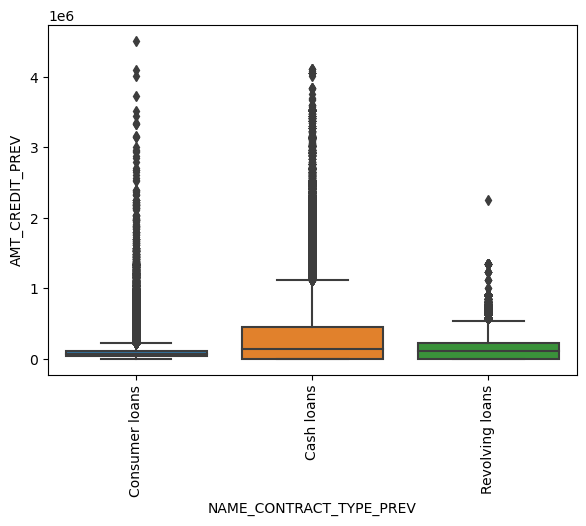

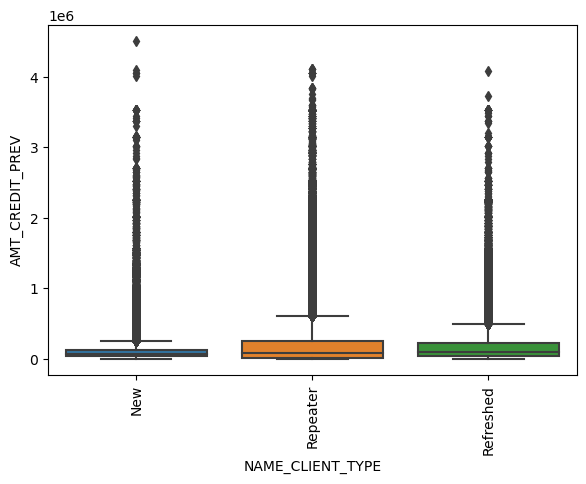

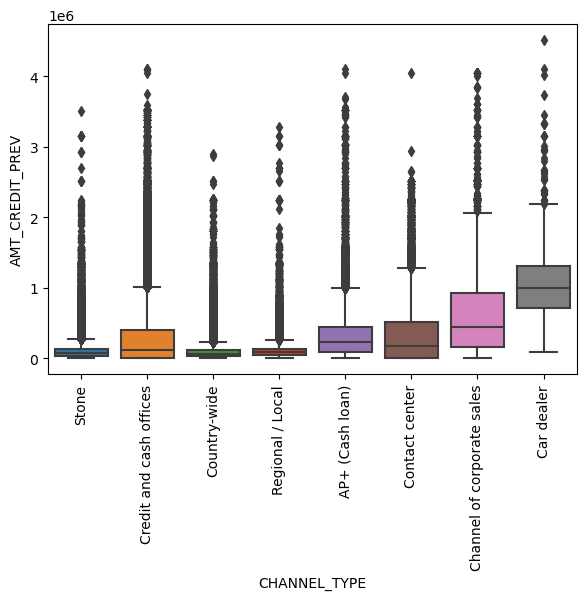

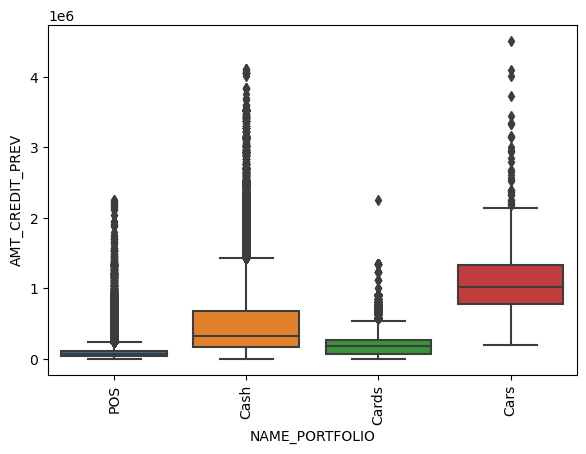

In [203]:

n= 0
for cat in Category_Nom:
    plt.figure(figsize=(15,10))
    n= n+1
    plt.subplot(2,2,n)
    sns.boxplot(x= cat,y= 'AMT_CREDIT_PREV',data= Merged_data)
    plt.xticks(rotation= 90)
    plt.show()

# NOTES

NAME_CONTRACT_TYPE_PREV - Csh loans are more credited in terms of amount in comparision to Consumer loan and revolving loan

NAME_CLIENT_TYPE - Repeated clients got more credit amount, followed by Refreshed.

CHANNEL_TYPE - Loan amount credited is more to the channel type car dealer, then channel of corporate sales.
For the Stone, Country-wide and Regional/local the amount is very less.

NAME_PORTFOLIO - Most of the loan amount was credited to portfolio Cars, followed by Cash.



# Understanding the Relationship between Current Loan Defaulter Status, Previous Loan Application Status, and Income Group.

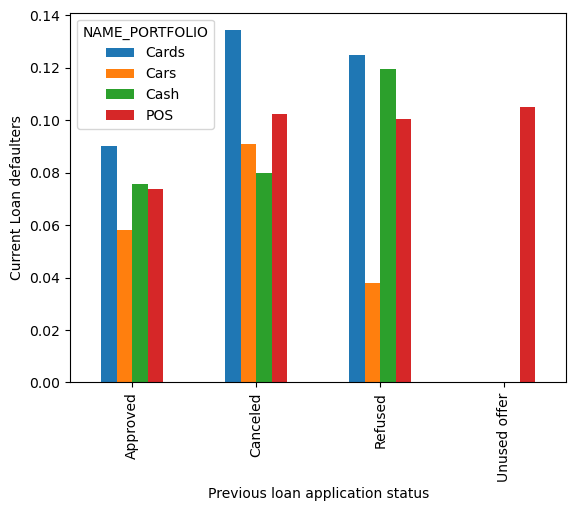

In [204]:
Merged_data.pivot_table(values= 'TARGET', index= 'NAME_CONTRACT_STATUS',columns='NAME_PORTFOLIO',aggfunc='mean').plot.bar()
plt.xlabel('Previous loan application status')
plt.ylabel('Current Loan defaulters')
plt.show()

Most of the clients were defaulted who previously applied loan for cards.

For Refused loans the clients applied for CARS are less defaulted.

For approved loans the client who applied for CARDS are most defaulted and who applied for CARS are less defaulted.

# checking connection between current loan defaulters and their previous loan application status

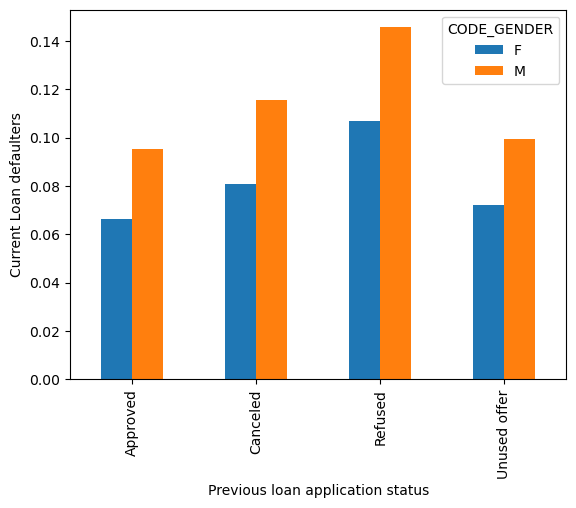

In [205]:
Merged_data.pivot_table(values= 'TARGET',index= 'NAME_CONTRACT_STATUS',columns= 'CODE_GENDER',aggfunc='mean').plot.bar()
plt.xlabel('Previous loan application status')
plt.ylabel('Current Loan defaulters')
plt.show()

As we can see that previously Refused client has done more default, followed by canceled status.

It also visisble that Males are likely to be more defaulter.

Clients for which Loan approved previously has less default rate.

# Checking how current loan defaulters relate to their previous loan application status and  income range.

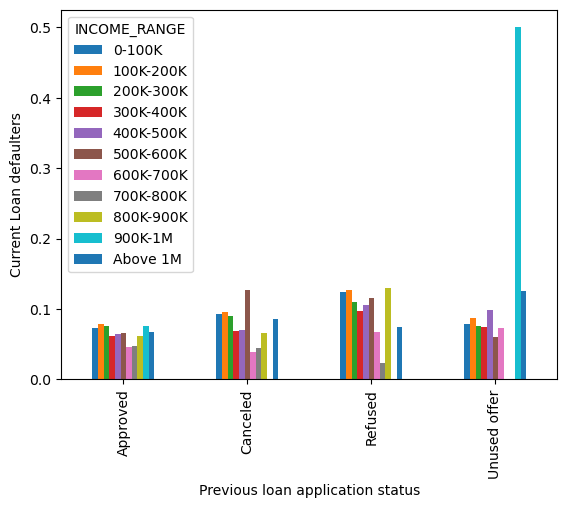

In [206]:
Merged_data.pivot_table(values='TARGET', index= 'NAME_CONTRACT_STATUS', columns= 'INCOME_RANGE',aggfunc='mean').plot.bar()
plt.xlabel('Previous loan application status')
plt.ylabel('Current Loan defaulters')
plt.show()

For the previous approved loans 600K-700K income people has less defaulted.

For unused offer above 1 Million income group has most defaulters.

For previous canceled loans 500K-600K income group has most of the defaulters.